In [1]:
#Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_curve, auc, r2_score, mean_squared_error

## 1. Training Features

In [2]:
#importing and parsing the training_set_features  dataset
training_features = pd.read_csv('training_set_features.csv')
training_features.head(3)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  

[3 rows x 36 columns]

In [3]:
#looking at the shape
training_features.shape

(26707, 36)

In [4]:
#describing the dataset
training_features.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  ...  health_worker  health_insurance  \
count           26579.000000  ...   25903.000000       14433.00000   
mean                0.677264  ...       0.111918           0.87972   
std                 0.467531  ...       0.315271           0.32530   
min                 0.000000  ...       0.000000           0.00000   
25%                 0.000000  ...       0.000000           1.00000   
50%                 1.000000  ...       0.000000           1.00000   
75%                 1.000000  ...       0.000000           1.00000   
max                 1.000000  ...       1.000000           1.00000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332

In [5]:
#looking at the missing values
training_features.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [6]:
#checking for duplicated values
training_features.duplicated().sum()

0

### Dealing with the missing values

In [7]:
# Dealing with the binary columns
binary_1 = ['h1n1_concern',
            'h1n1_knowledge',
            'behavioral_antiviral_meds',
            'behavioral_avoidance',
            'behavioral_face_mask',
            'behavioral_wash_hands',
            'behavioral_large_gatherings',
            'behavioral_outside_home',
            'behavioral_touch_face',
            'doctor_recc_h1n1',
            'doctor_recc_seasonal',
            'chronic_med_condition',
            'child_under_6_months',
            'health_worker',
            'health_insurance',
            'household_adults',
            'household_children',]#filling with 0

binary_2 = ['opinion_h1n1_vacc_effective',
          'opinion_h1n1_risk',
          'opinion_h1n1_sick_from_vacc',
          'opinion_seas_vacc_effective',
          'opinion_seas_risk', 'opinion_seas_sick_from_vacc'] #filling with 1

training_features[binary_1] = training_features[binary_1].fillna(0)

training_features[binary_2] = training_features[binary_2].fillna(1)

In [8]:
#dealing with missing strings
household = [
    'income_poverty',
    'marital_status',                
    'rent_or_own',                
    'employment_status',            
    'hhs_geo_region',
    'education'
]
employment = [
    'employment_industry',
    'employment_occupation',
    'income_poverty'
]

training_features[household] = training_features[household].fillna('N/A')
training_features[employment] = training_features[employment].fillna('N/A')

In [9]:
#checking for missing values
training_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

## 2. training labels

In [10]:
#importing and parsing the training_set_labels  dataset
training_labels = pd.read_csv('training_set_labels.csv')
training_labels

respondent_id  h1n1_vaccine  seasonal_vaccine
0                  0             0                 0
1                  1             0                 1
2                  2             0                 0
3                  3             0                 1
4                  4             0                 0
...              ...           ...               ...
26702          26702             0                 0
26703          26703             0                 0
26704          26704             0                 1
26705          26705             0                 0
26706          26706             0                 0

[26707 rows x 3 columns]

In [11]:
#looking at the shape
training_labels.shape

(26707, 3)

In [12]:
#describing the dataset
training_labels.describe()

respondent_id  h1n1_vaccine  seasonal_vaccine
count   26707.000000  26707.000000      26707.000000
mean    13353.000000      0.212454          0.465608
std      7709.791156      0.409052          0.498825
min         0.000000      0.000000          0.000000
25%      6676.500000      0.000000          0.000000
50%     13353.000000      0.000000          0.000000
75%     20029.500000      0.000000          1.000000
max     26706.000000      1.000000          1.000000

In [13]:
#checking for duplicated values
training_labels.duplicated().sum()

0

In [14]:
#checking for missing values
training_labels.isna().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

## 3. Test features

In [15]:
#importing and parsing the test_set_features  dataset
test_features = pd.read_csv('test_set_features.csv')
test_features

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              26707           2.0             2.0                        0.0   
1              26708           1.0             1.0                        0.0   
2              26709           2.0             2.0                        0.0   
3              26710           1.0             1.0                        0.0   
4              26711           3.0             1.0                        1.0   
...              ...           ...             ...                        ...   
26703          53410           1.0             1.0                        0.0   
26704          53411           3.0             1.0                        0.0   
26705          53412           0.0             1.0                        0.0   
26706          53413           3.0             1.0                        0.0   
26707          53414           2.0             1.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       1.0                   0.0                    1.0   
1                       0.0                   0.0                    0.0   
2                       0.0                   1.0                    1.0   
3                       0.0                   0.0                    0.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   0.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    1.0   
26707                   0.0                   0.0                    1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              1.0                      0.0   
1                              0.0                      0.0   
2                              1.0                      1.0   
3                              0.0                      0.0   
4                              1.0                      1.0   
...                            ...                      ...   
26703                          0.0                      0.0   
26704                          1.0                      1.0   
26705                          0.0                      0.0   
26706                          0.0                      1.0   
26707                          0.0                      0.0   

       behavioral_touch_face  ...             income_poverty  marital_status  \
0                        1.0  ...                  > $75,000     Not Married   
1                        0.0  ...              Below Poverty     Not Married   
2                        1.0  ...                  > $75,000         Married   
3                        0.0  ...  <= $75,000, Above Poverty         Married   
4                        1.0  ...  <= $75,000, Above Poverty     Not Married   
...                      ...  ...                        ...             ...   
26703                    1.0  ...                        NaN             NaN   
26704                    1.0  ...              Below Poverty         Married   
26705                    0.0  ...              Below Poverty     Not Married   
26706                    0.0  ...  <= $75,000, Above Poverty         Married   
26707                    1.0  ...                        NaN     Not Married   

       rent_or_own   employment_status  hhs_geo_region  \
0             Rent            Employed        mlyzmhmf   
1             Rent            Employed        bhuqouqj   
2              Own            Employed        lrircsnp   
3              Own  Not in Labor Force        lrircsnp   
4              Own            Employed        lzgpxyit   
...            ...                 ...             ... 

In [16]:
#looking at the shape
test_features.shape

(26708, 36)

In [17]:
#describing the dataset
test_features.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26708.000000  26623.000000    26586.000000               26629.000000   
mean    40060.500000      1.623145        1.266042                   0.049645   
std      7710.079831      0.902755        0.615617                   0.217215   
min     26707.000000      0.000000        0.000000                   0.000000   
25%     33383.750000      1.000000        1.000000                   0.000000   
50%     40060.500000      2.000000        1.000000                   0.000000   
75%     46737.250000      2.000000        2.000000                   0.000000   
max     53414.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26495.000000          26689.000000           26668.000000   
mean               0.729798              0.069279               0.826084   
std                0.444072              0.253934               0.379045   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                 26636.000000             26626.000000   
mean                      0.351517                 0.337227   
std                       0.477453                 0.472772   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 0.000000   
75%                       1.000000                 1.000000   
max                       1.000000                 1.000000   

       behavioral_touch_face  ...  health_worker  health_insurance  \
count           26580.000000  ...   25919.000000      14480.000000   
mean                0.683747  ...       0.111501          0.887914   
std                 0.465022  ...       0.314758          0.315483   
min                 0.000000  ...       0.000000          0.000000   
25%                 0.000000  ...       0.000000          1.000000   
50%                 1.000000  ...       0.000000          1.000000   
75%                 1.000000  ...       0.000000          1.000000   
max                 1.000000  ...       1.000000          1.000000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26310.000000       26328.000000   
mean                      3.844622           2.326838   
std                       1.007570           1.275636   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26333.000000                 26256.000000   
mean                      2.360612                     4.024832   
std                       1.359413                     1.083204   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26209.000000                 26187.000000      26483.000000   
mean            2.708688                     2.143392          0.894310   
std             1.376045                     1.339

In [18]:
#checking for duplicated values
test_features.duplicated().sum()

0

In [19]:
#checking for missing values
test_features.isna().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

### Dealing with the missing values

In [20]:
#Dealing with the binary columns
test_features[binary_1] = test_features[binary_1].fillna(0)
test_features[binary_2] = test_features[binary_2].fillna(1)

In [21]:
#dealing with missing strings
test_features[household] = test_features[household].fillna('N/A')
test_features[employment] = test_features[employment].fillna('N/A')

In [22]:
#checking missing values
test_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

# Explanatory Data Analysis, EDA

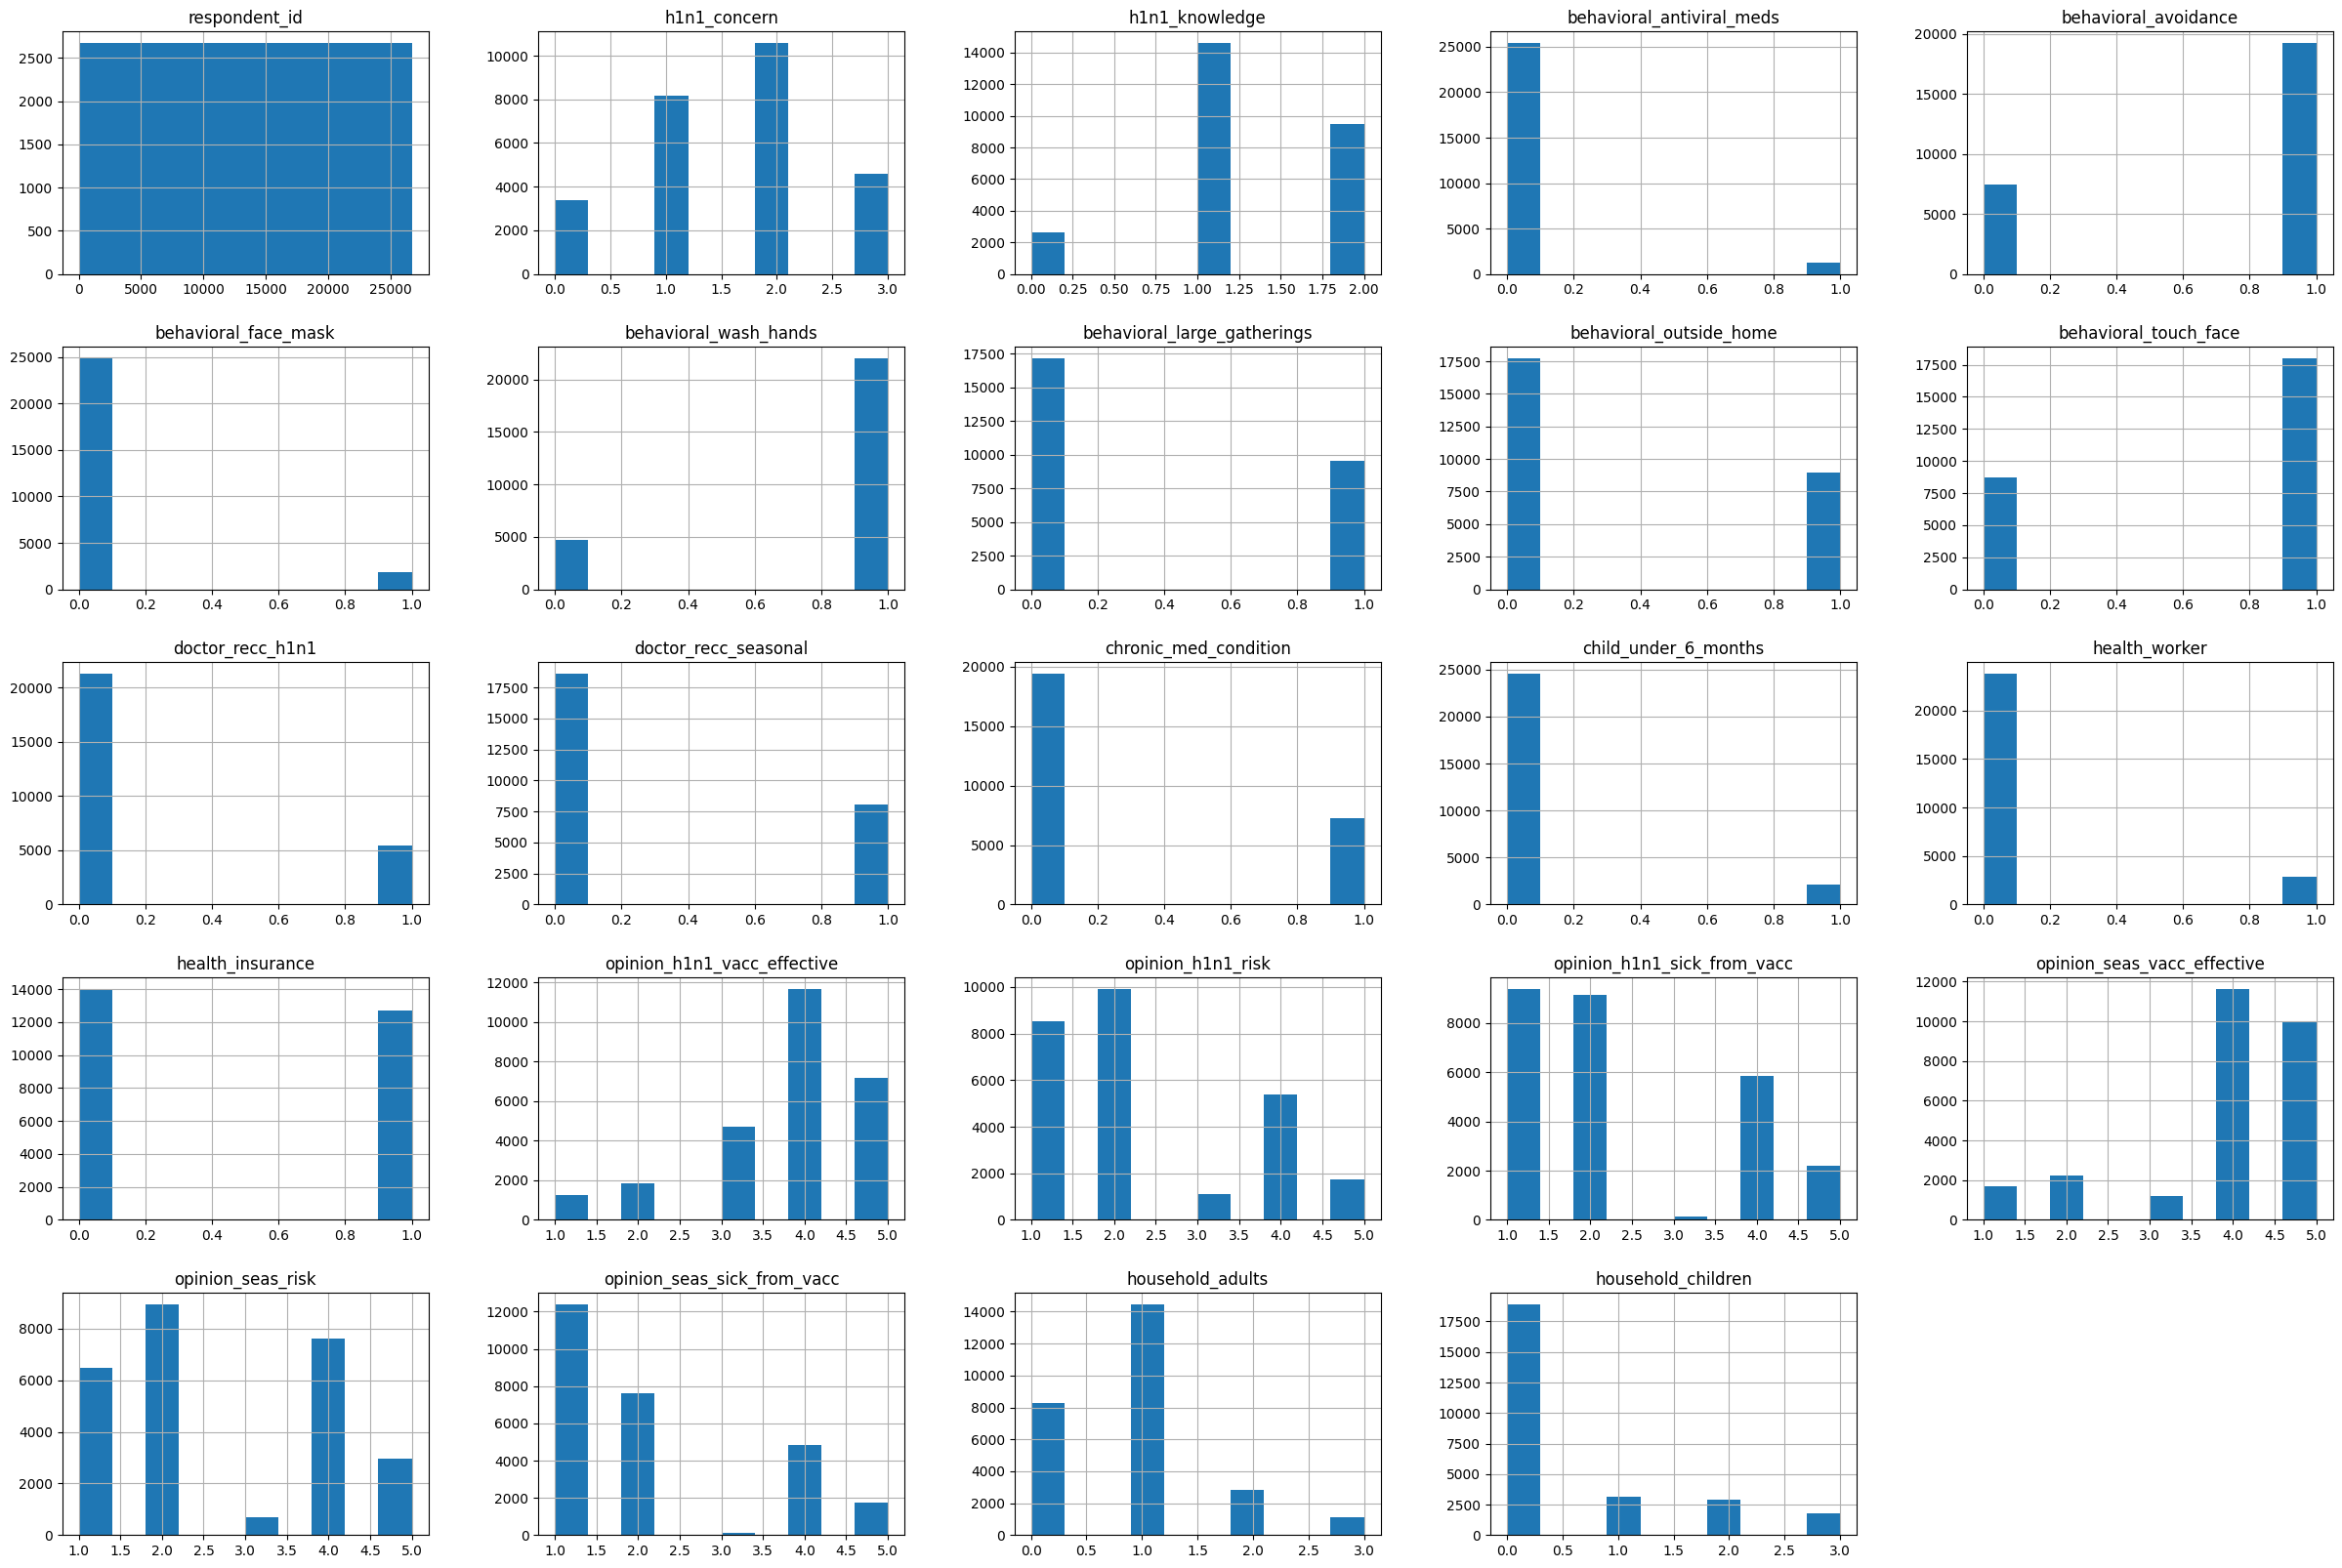

In [23]:
#Checking for Distribution of Data in the training features dataset
training_features.hist(figsize=(30,20))
plt.show();

In [24]:
#Distribution_of data in the test features dataset
#Checking for Distribution of Data
training_labels.hist(figsize=(30,20))
plt.show();

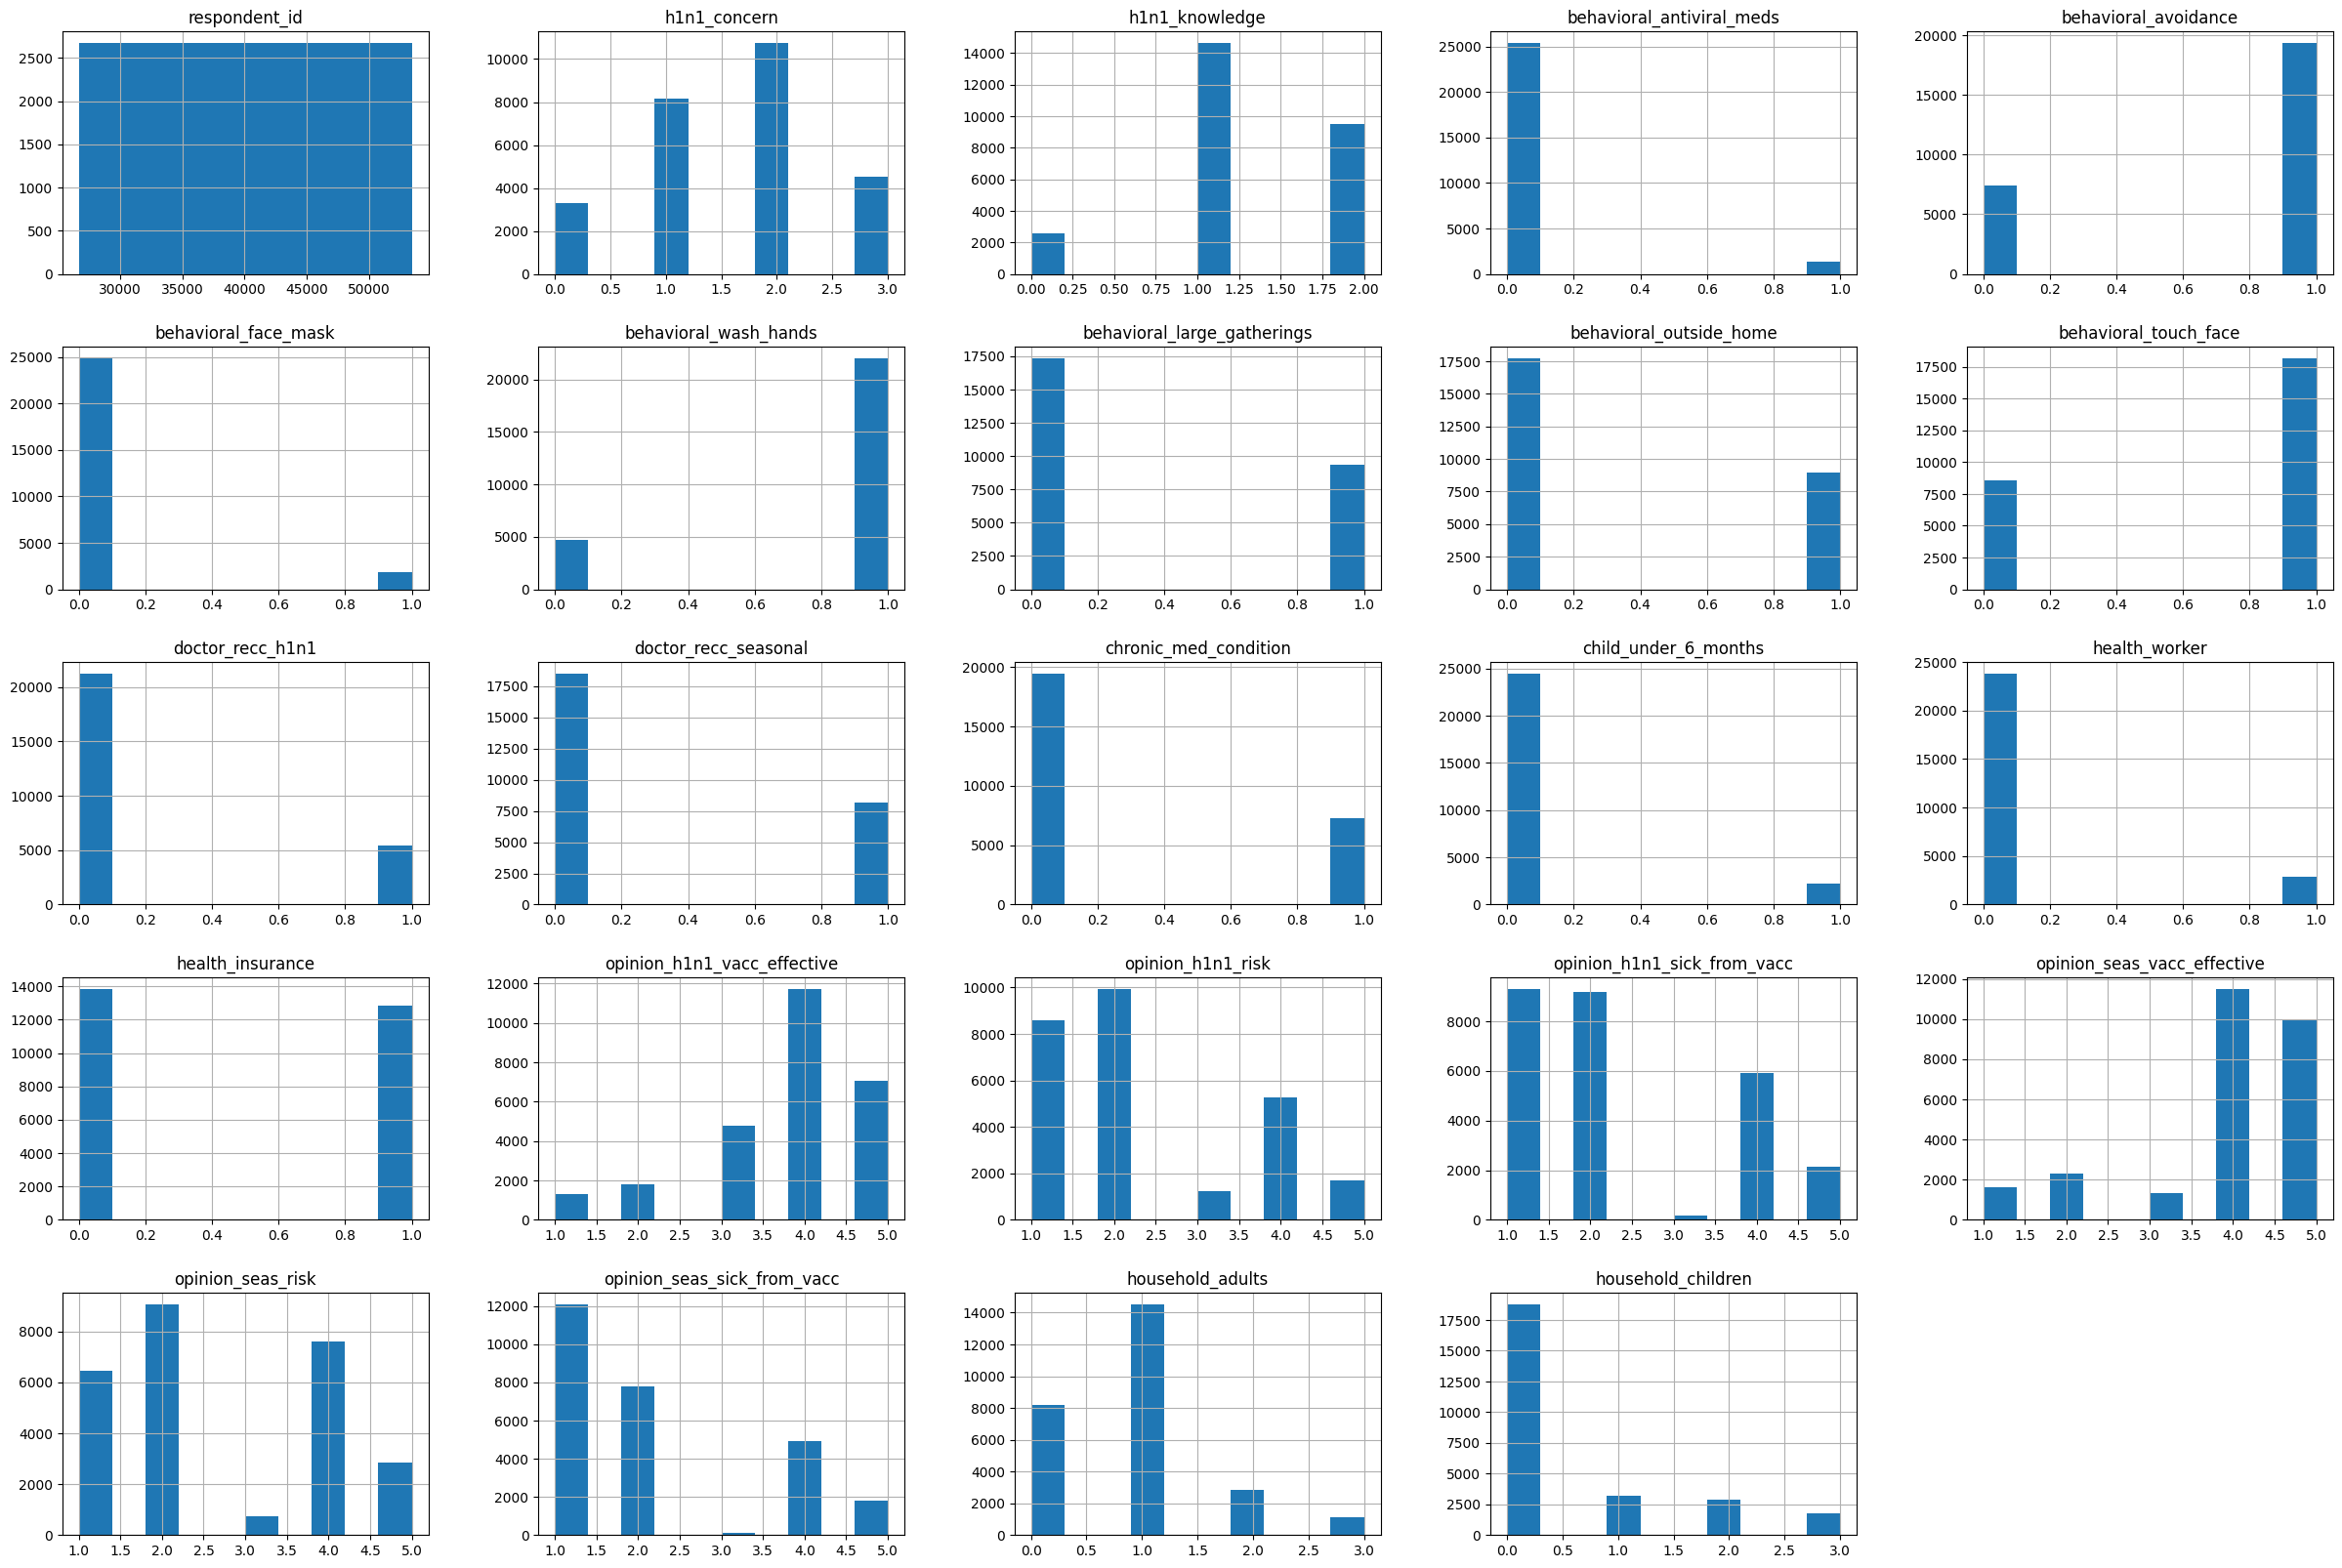

In [25]:
#Distribution_of data in the test fea
#Checking for Distribution of Data
test_features.hist(figsize=(30,20))
plt.show();

In [26]:
#Merging the training labes dataset and the training features dataset

#setting new index
training_labels.set_index('respondent_id', inplace=True, drop=False)
training_features.set_index('respondent_id', inplace=True, drop=False)

df = pd.merge(training_labels, training_features, left_index=True, right_index=True)
df.head(3)

respondent_id_x  h1n1_vaccine  seasonal_vaccine  \
respondent_id                                                    
0                            0             0                 0   
1                            1             0                 1   
2                            2             0                 0   

               respondent_id_y  h1n1_concern  h1n1_knowledge  \
respondent_id                                                  
0                            0           1.0             0.0   
1                            1           3.0             2.0   
2                            2           1.0             1.0   

               behavioral_antiviral_meds  behavioral_avoidance  \
respondent_id                                                    
0                                    0.0                   0.0   
1                                    0.0                   1.0   
2                                    0.0                   1.0   

               behavioral_face_mask  behavioral_wash_hands  ...  \
respondent_id                                               ...   
0                               0.0                    0.0  ...   
1                               0.0                    1.0  ...   
2                               0.0                    0.0  ...   

                          income_poverty  marital_status  rent_or_own  \
respondent_id                                                           
0                          Below Poverty     Not Married          Own   
1                          Below Poverty     Not Married         Rent   
2              <= $75,000, Above Poverty     Not Married          Own   

                employment_status  hhs_geo_region                census_msa  \
respondent_id                                                                 
0              Not in Labor Force        oxchjgsf                   Non-MSA   
1                        Employed        bhuqouqj  MSA, Not Principle  City   
2                        Employed        qufhixun  MSA, Not Principle  City   

               household_adults  household_children  employment_industry  \
respondent_id                                                              
0                           0.0                 0.0                  N/A   
1                           0.0                 0.0             pxcmvdjn   
2                           2.0                 0.0             rucpziij   

               employment_occupation  
respondent_id                         
0                                N/A  
1                           xgwztkwe  
2                           xtkaffoo  

[3 rows x 39 columns]

In [27]:
df.isna().sum()

respondent_id_x                0
h1n1_vaccine                   0
seasonal_vaccine               0
respondent_id_y                0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_st

In [28]:
#grouping into different tables

# grouping by sex
sex = df.groupby('sex')

#grouping by race
race = df.groupby('race')

#grouping by education
educ = df.groupby('education')

#grouping by geo location
loc_ = df.groupby('hhs_geo_region')

#grouping by home ownership
home = df.groupby('rent_or_own')

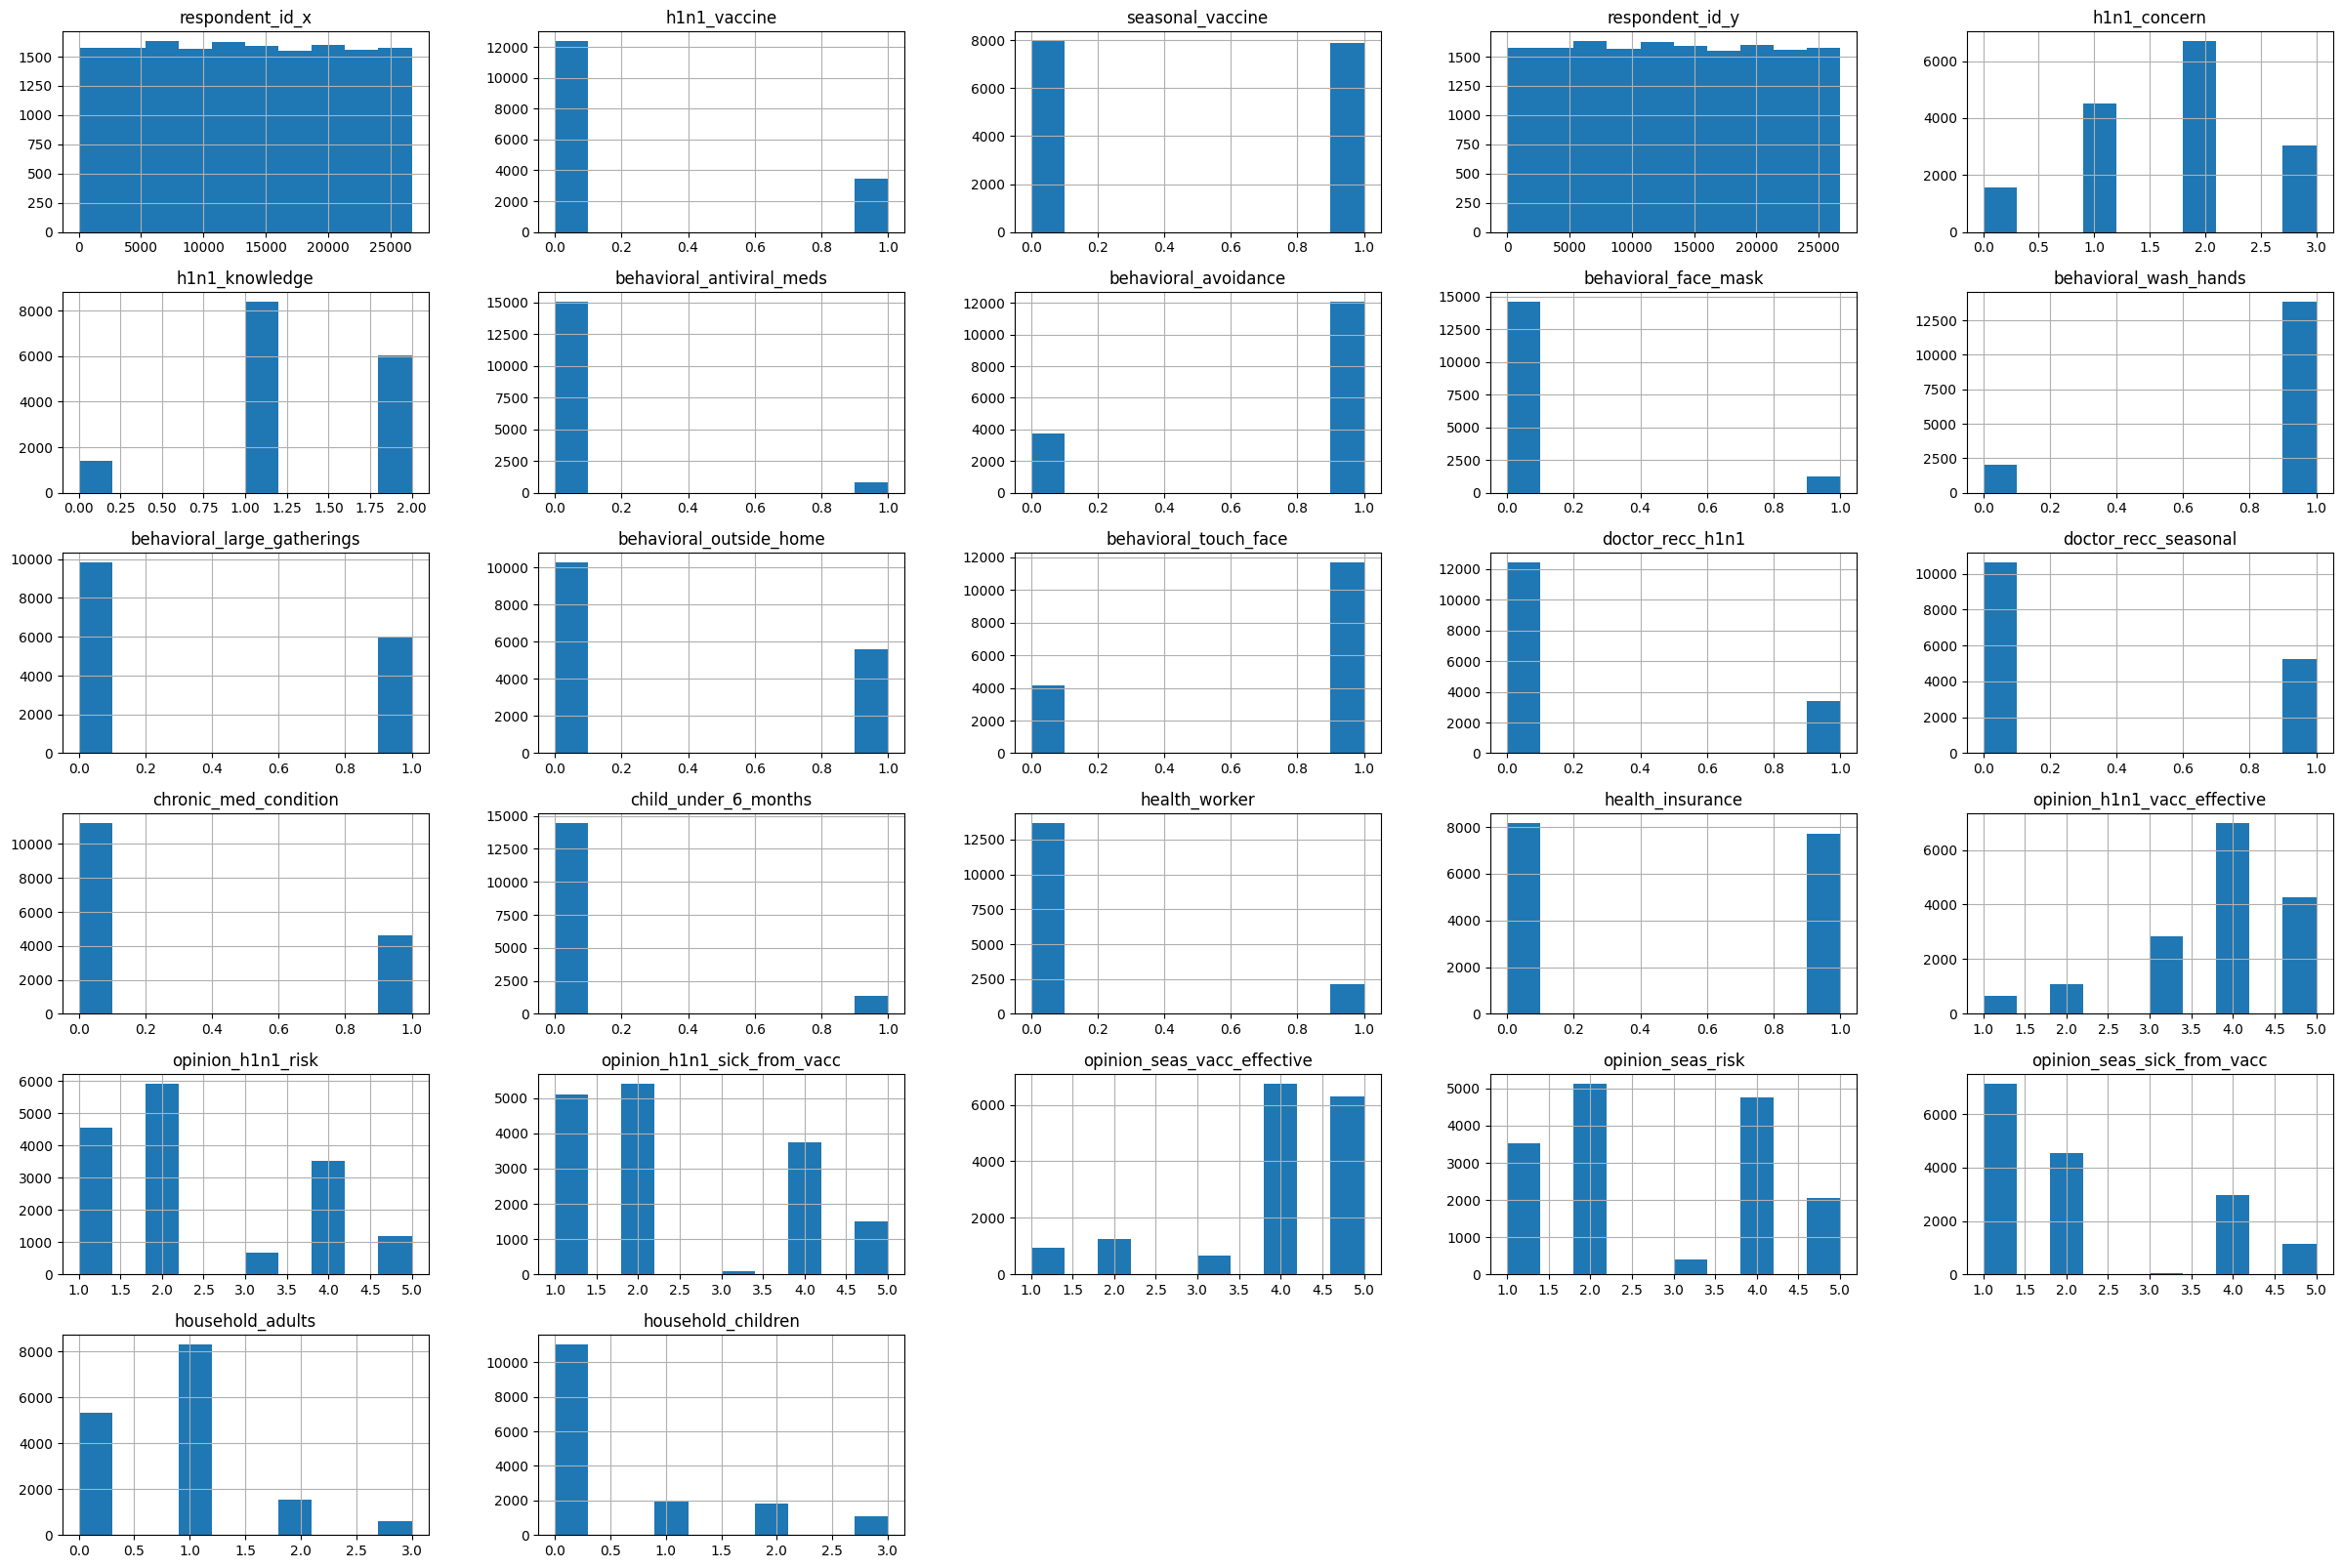

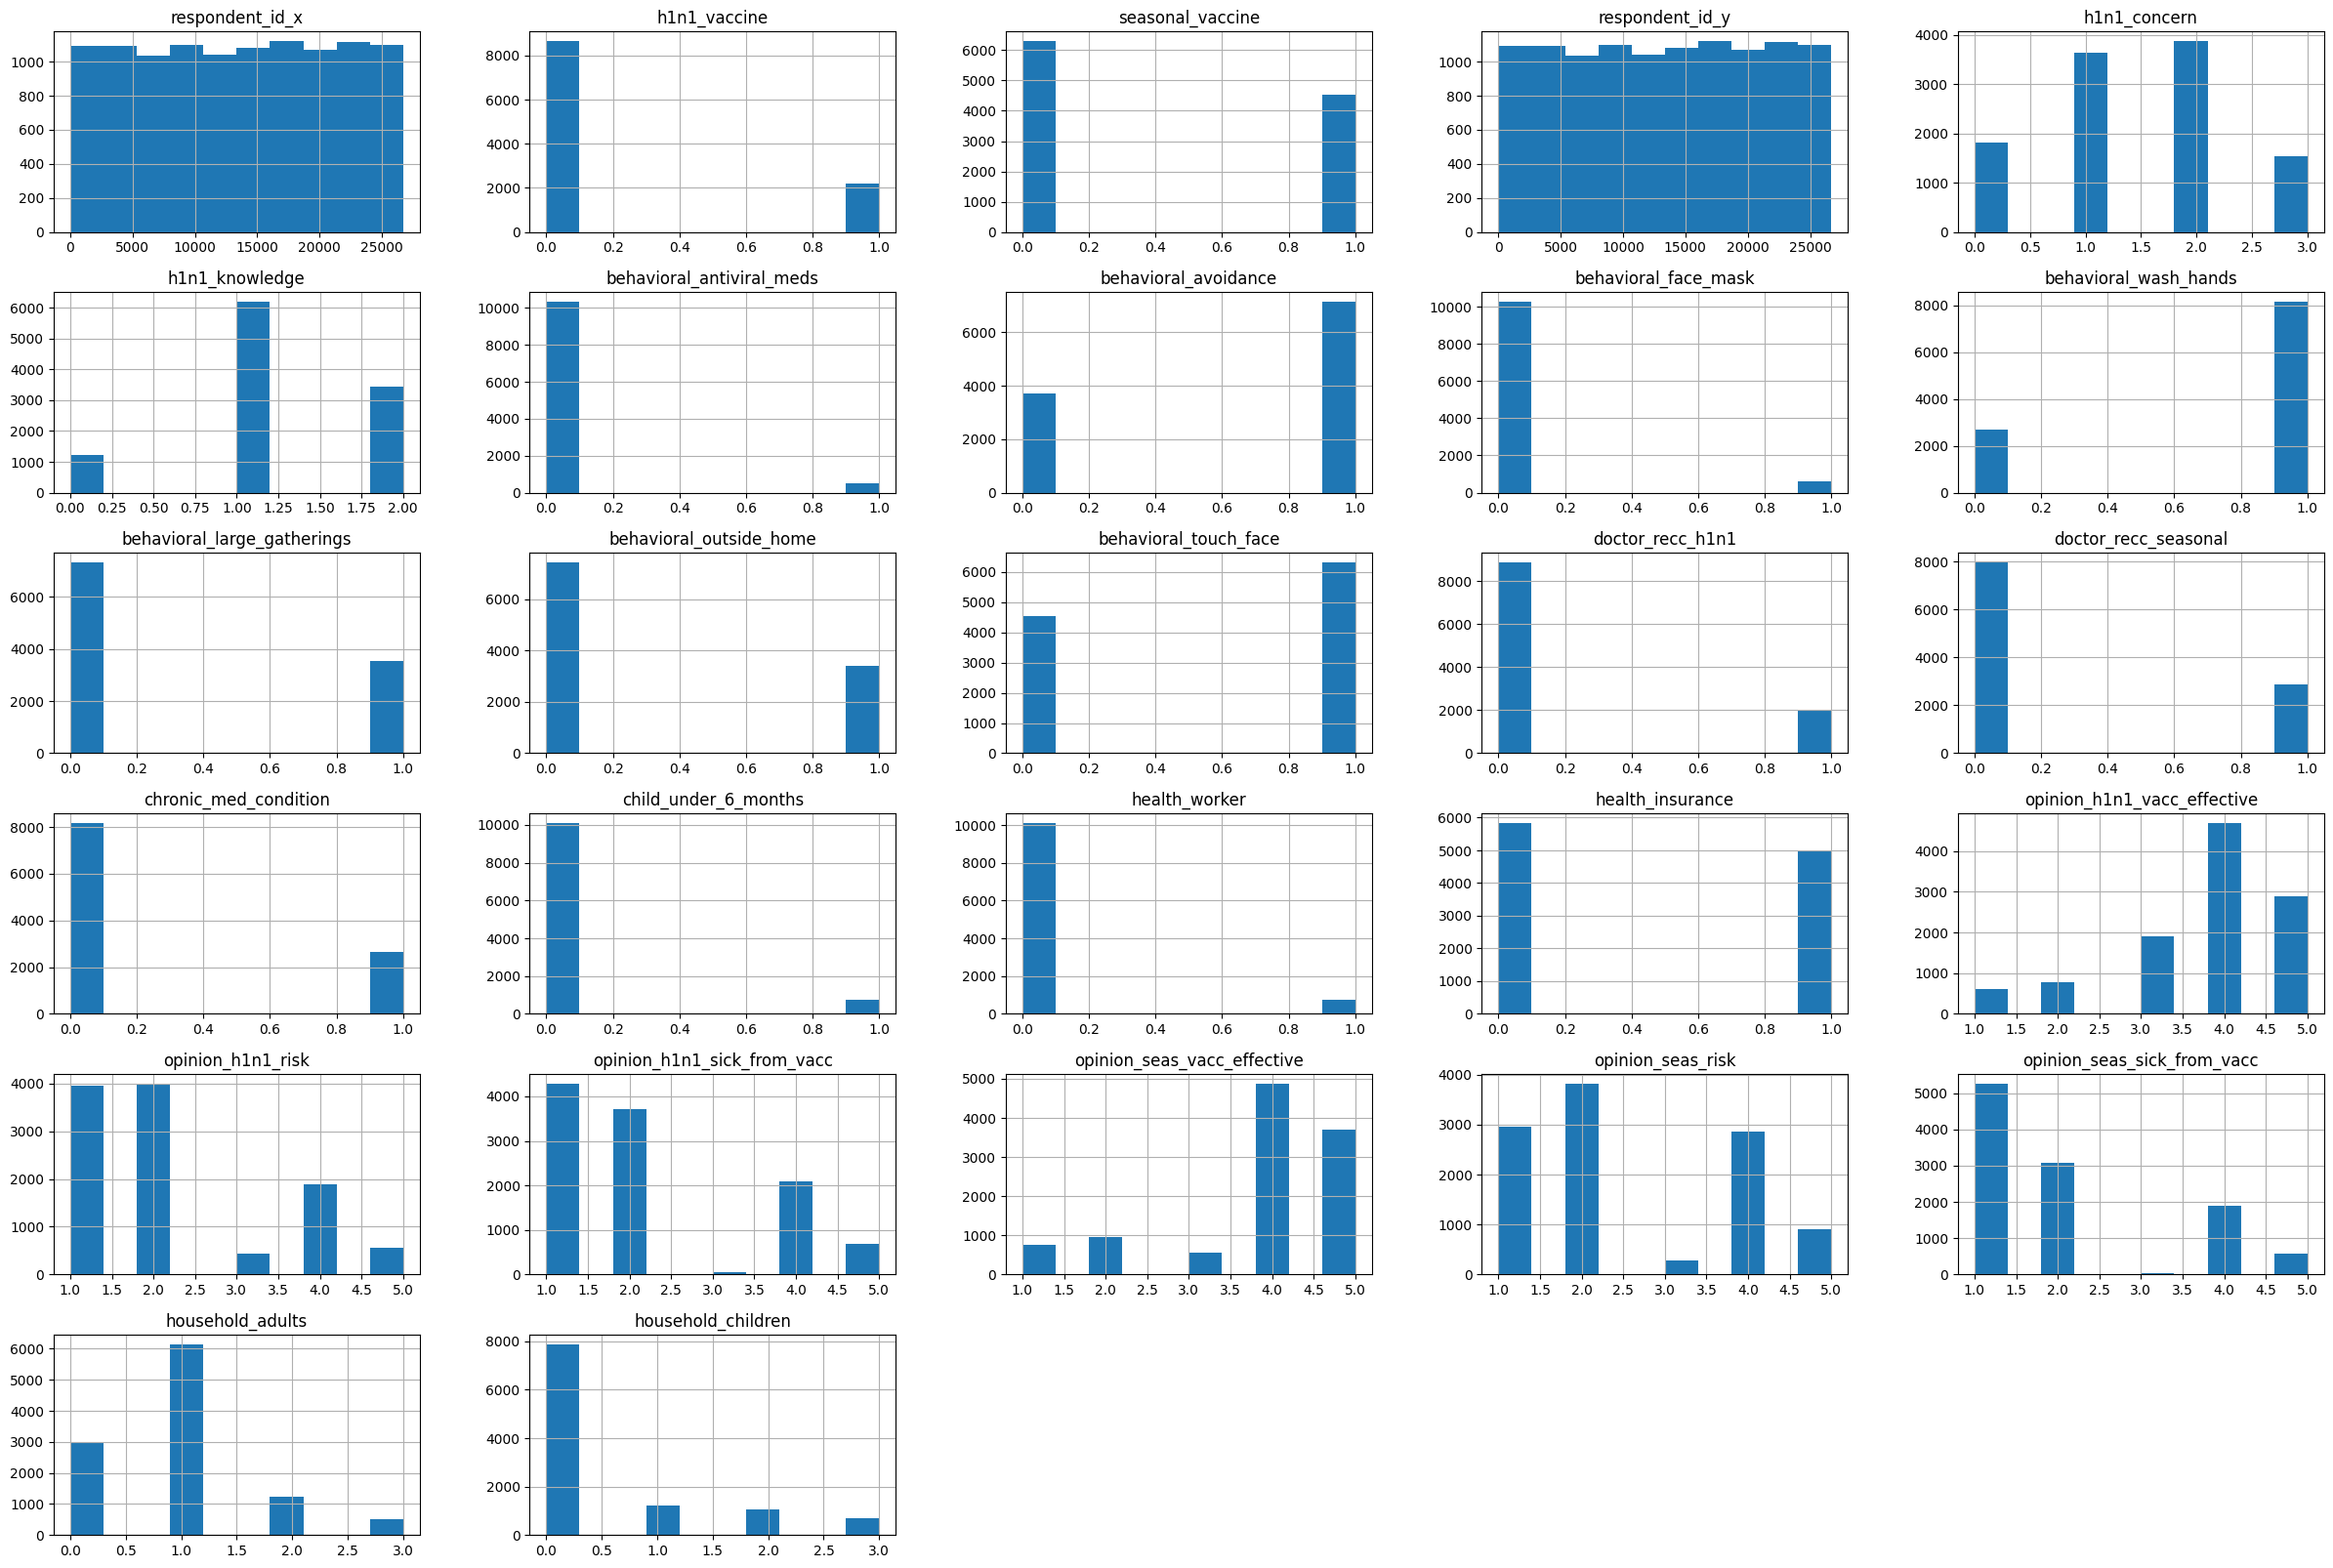

In [29]:
sex.hist(figsize=(30,20))
plt.show();

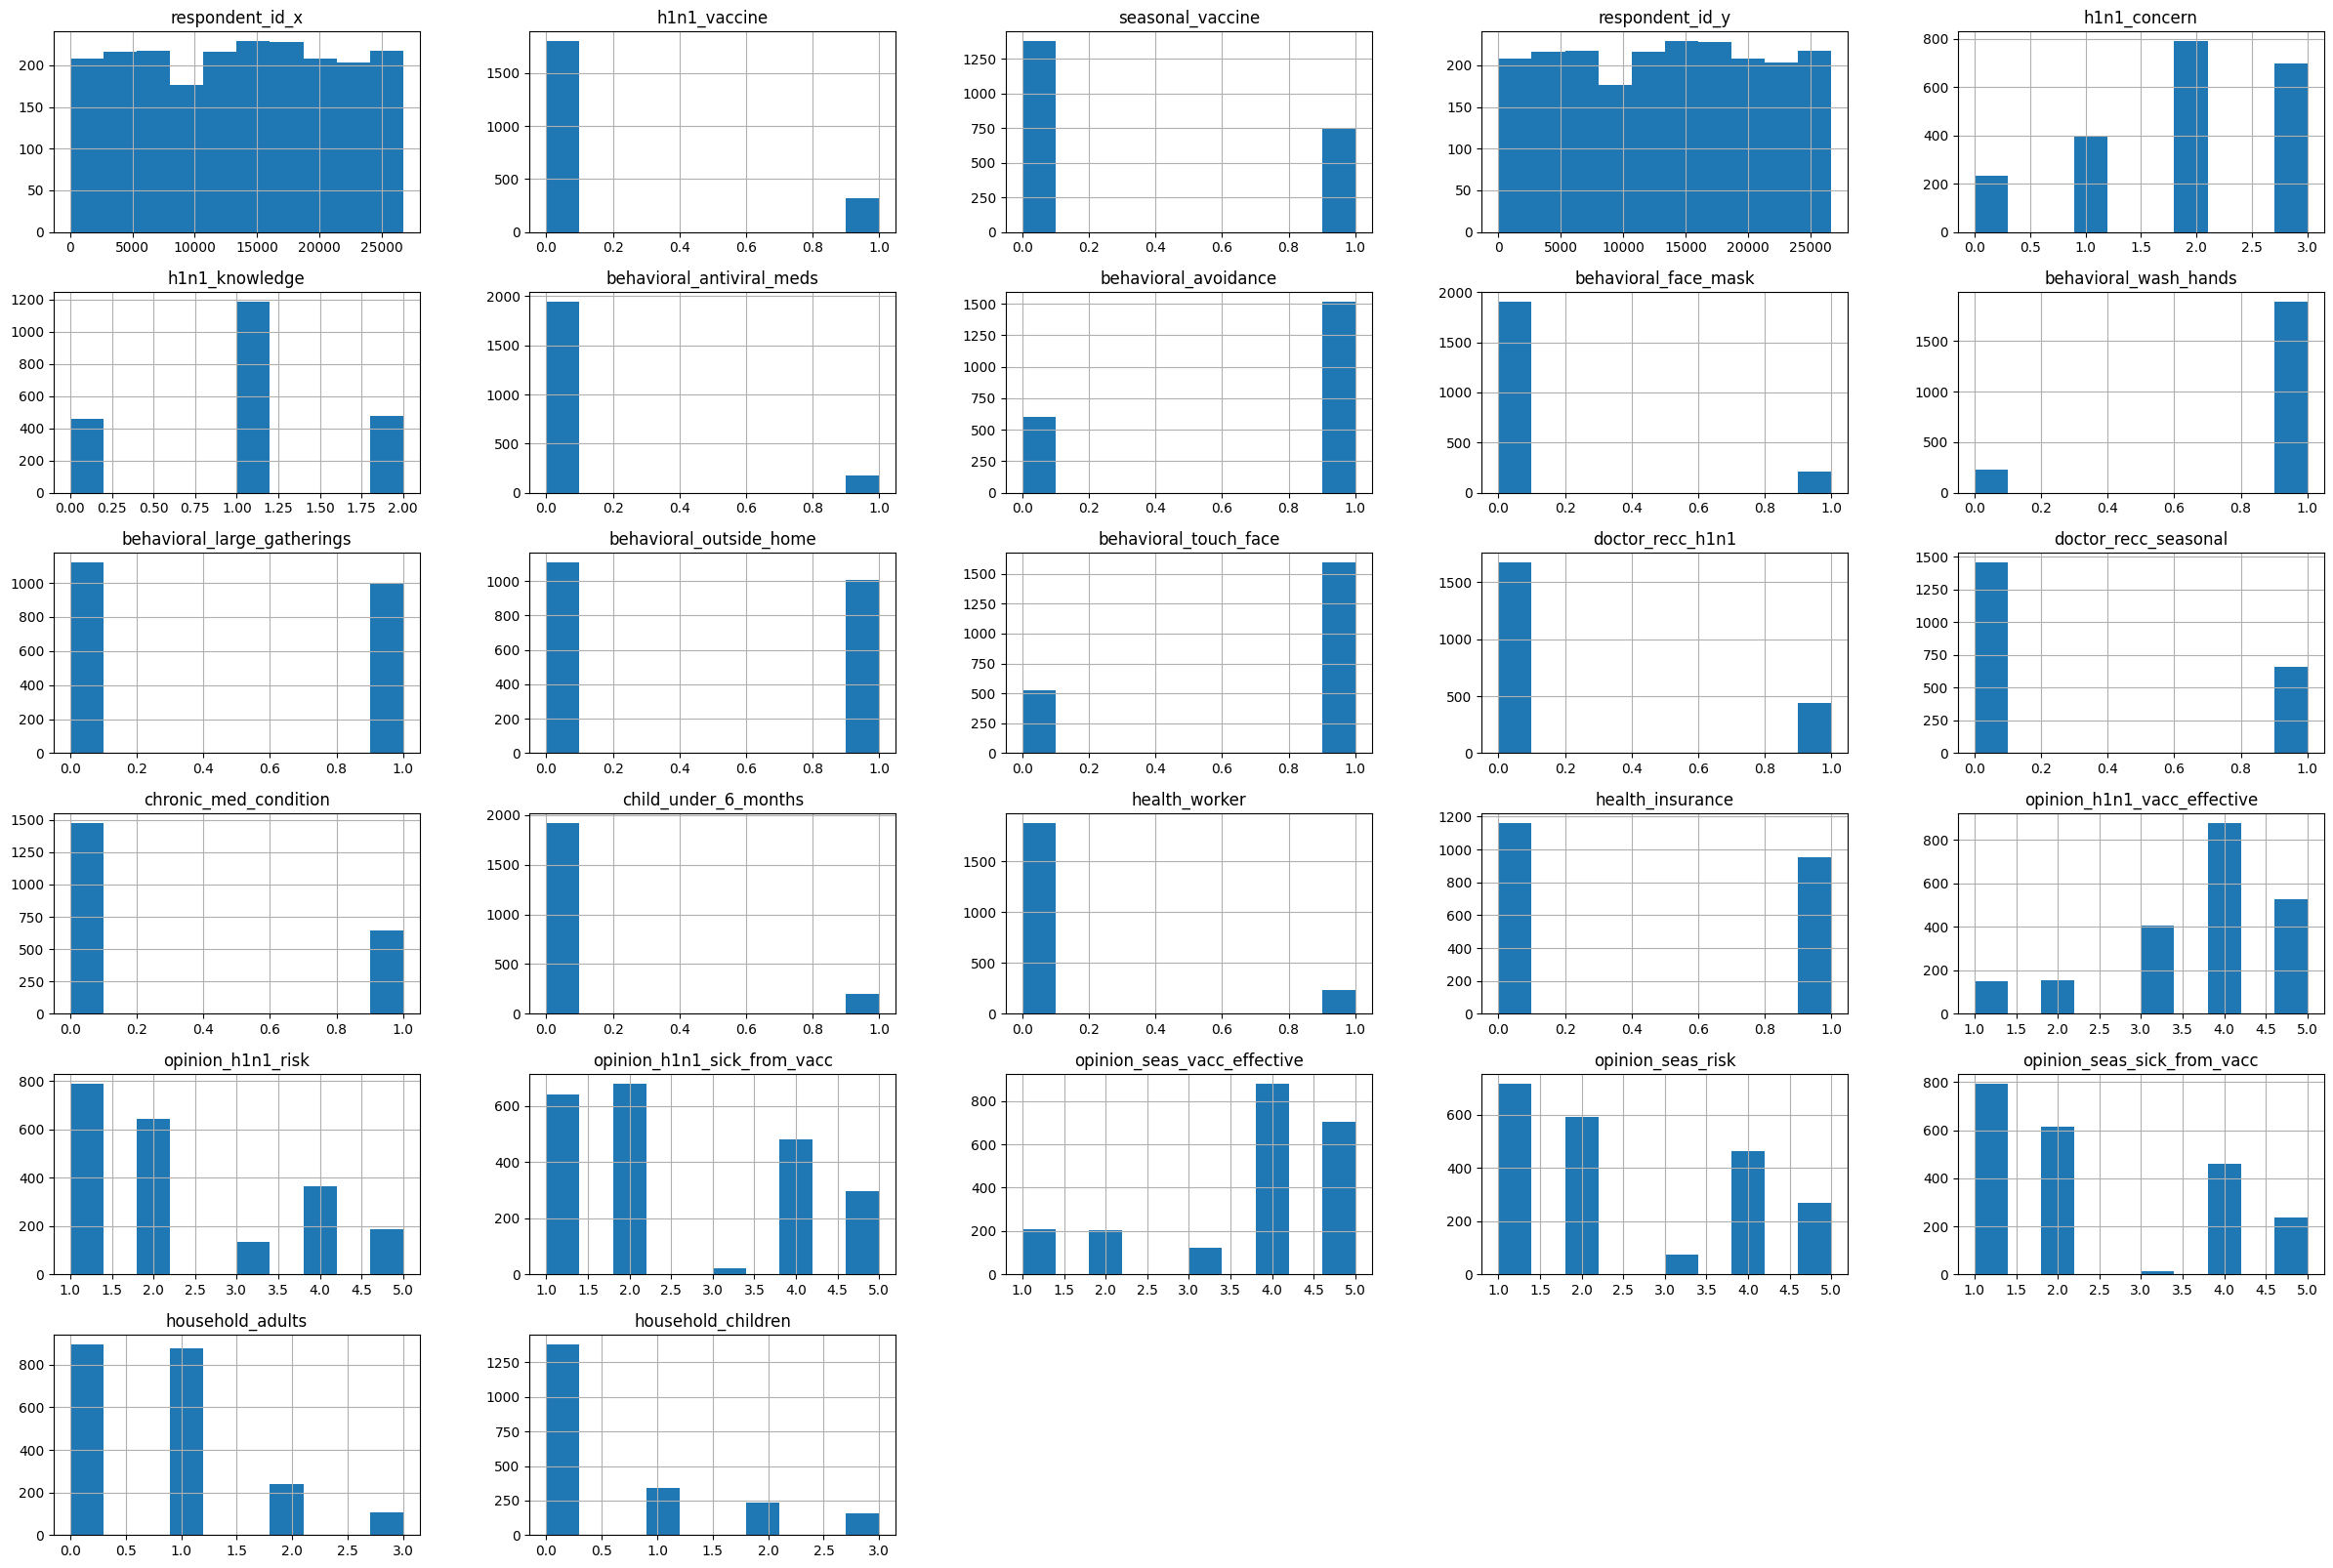

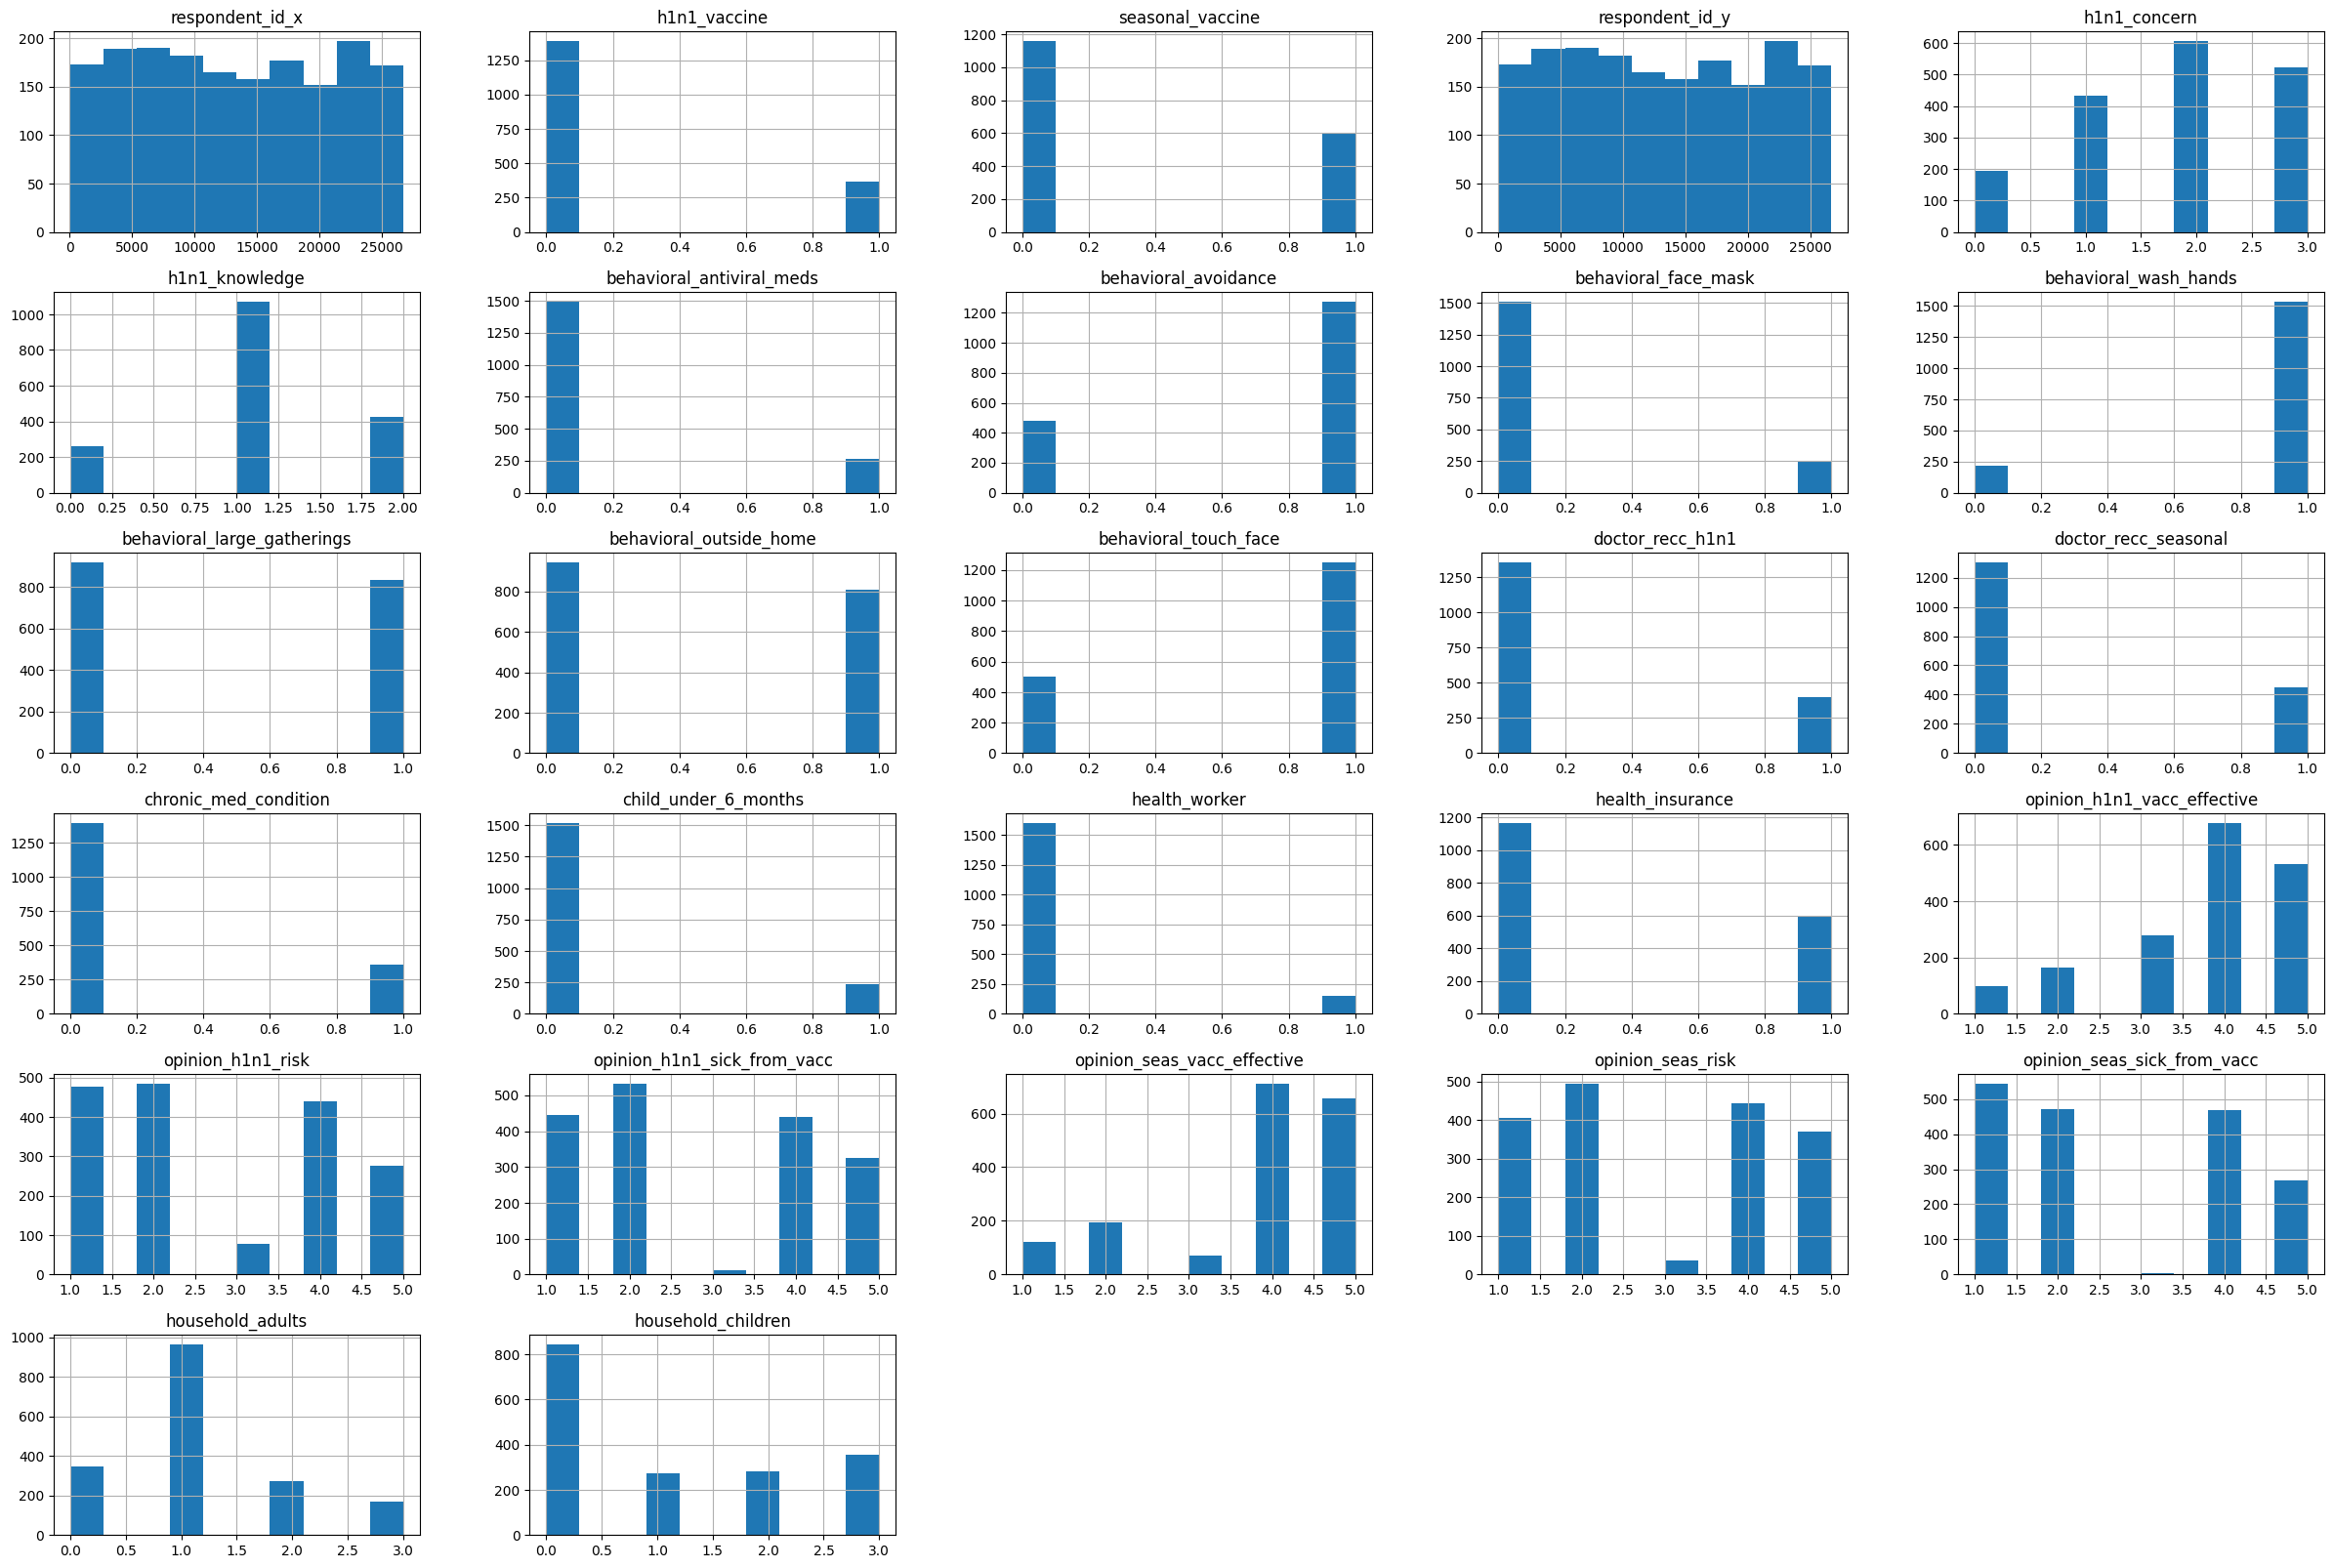

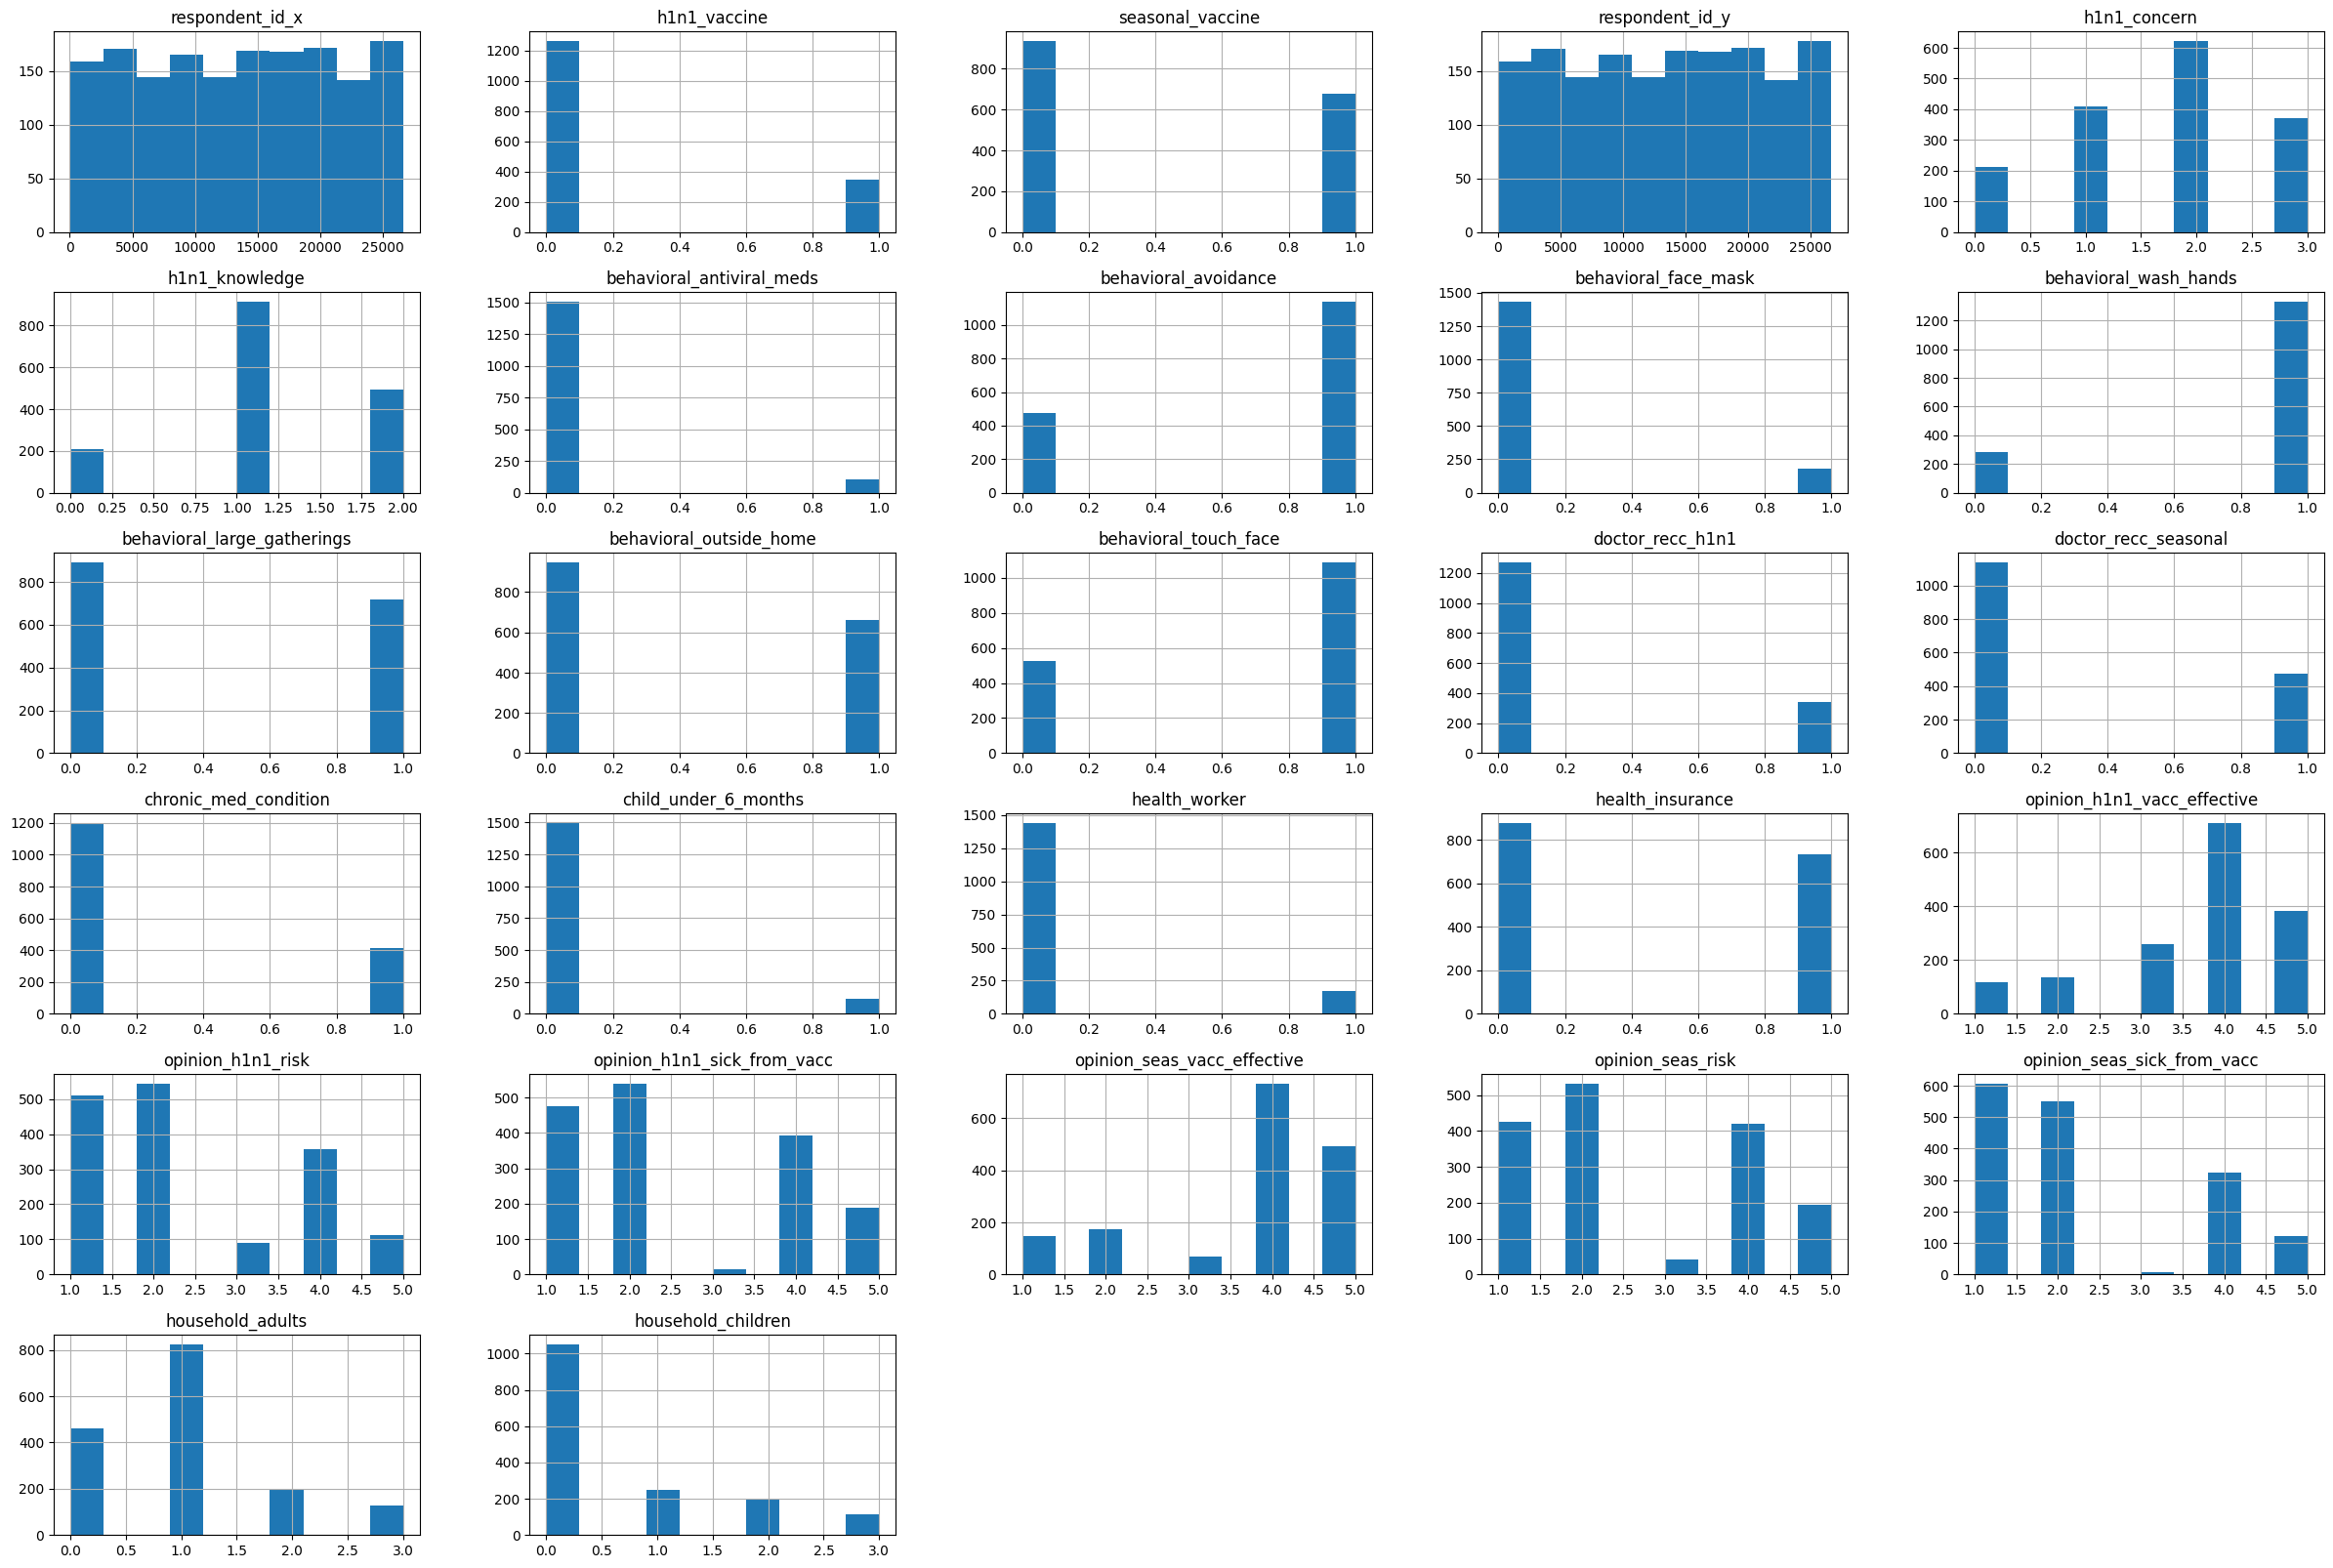

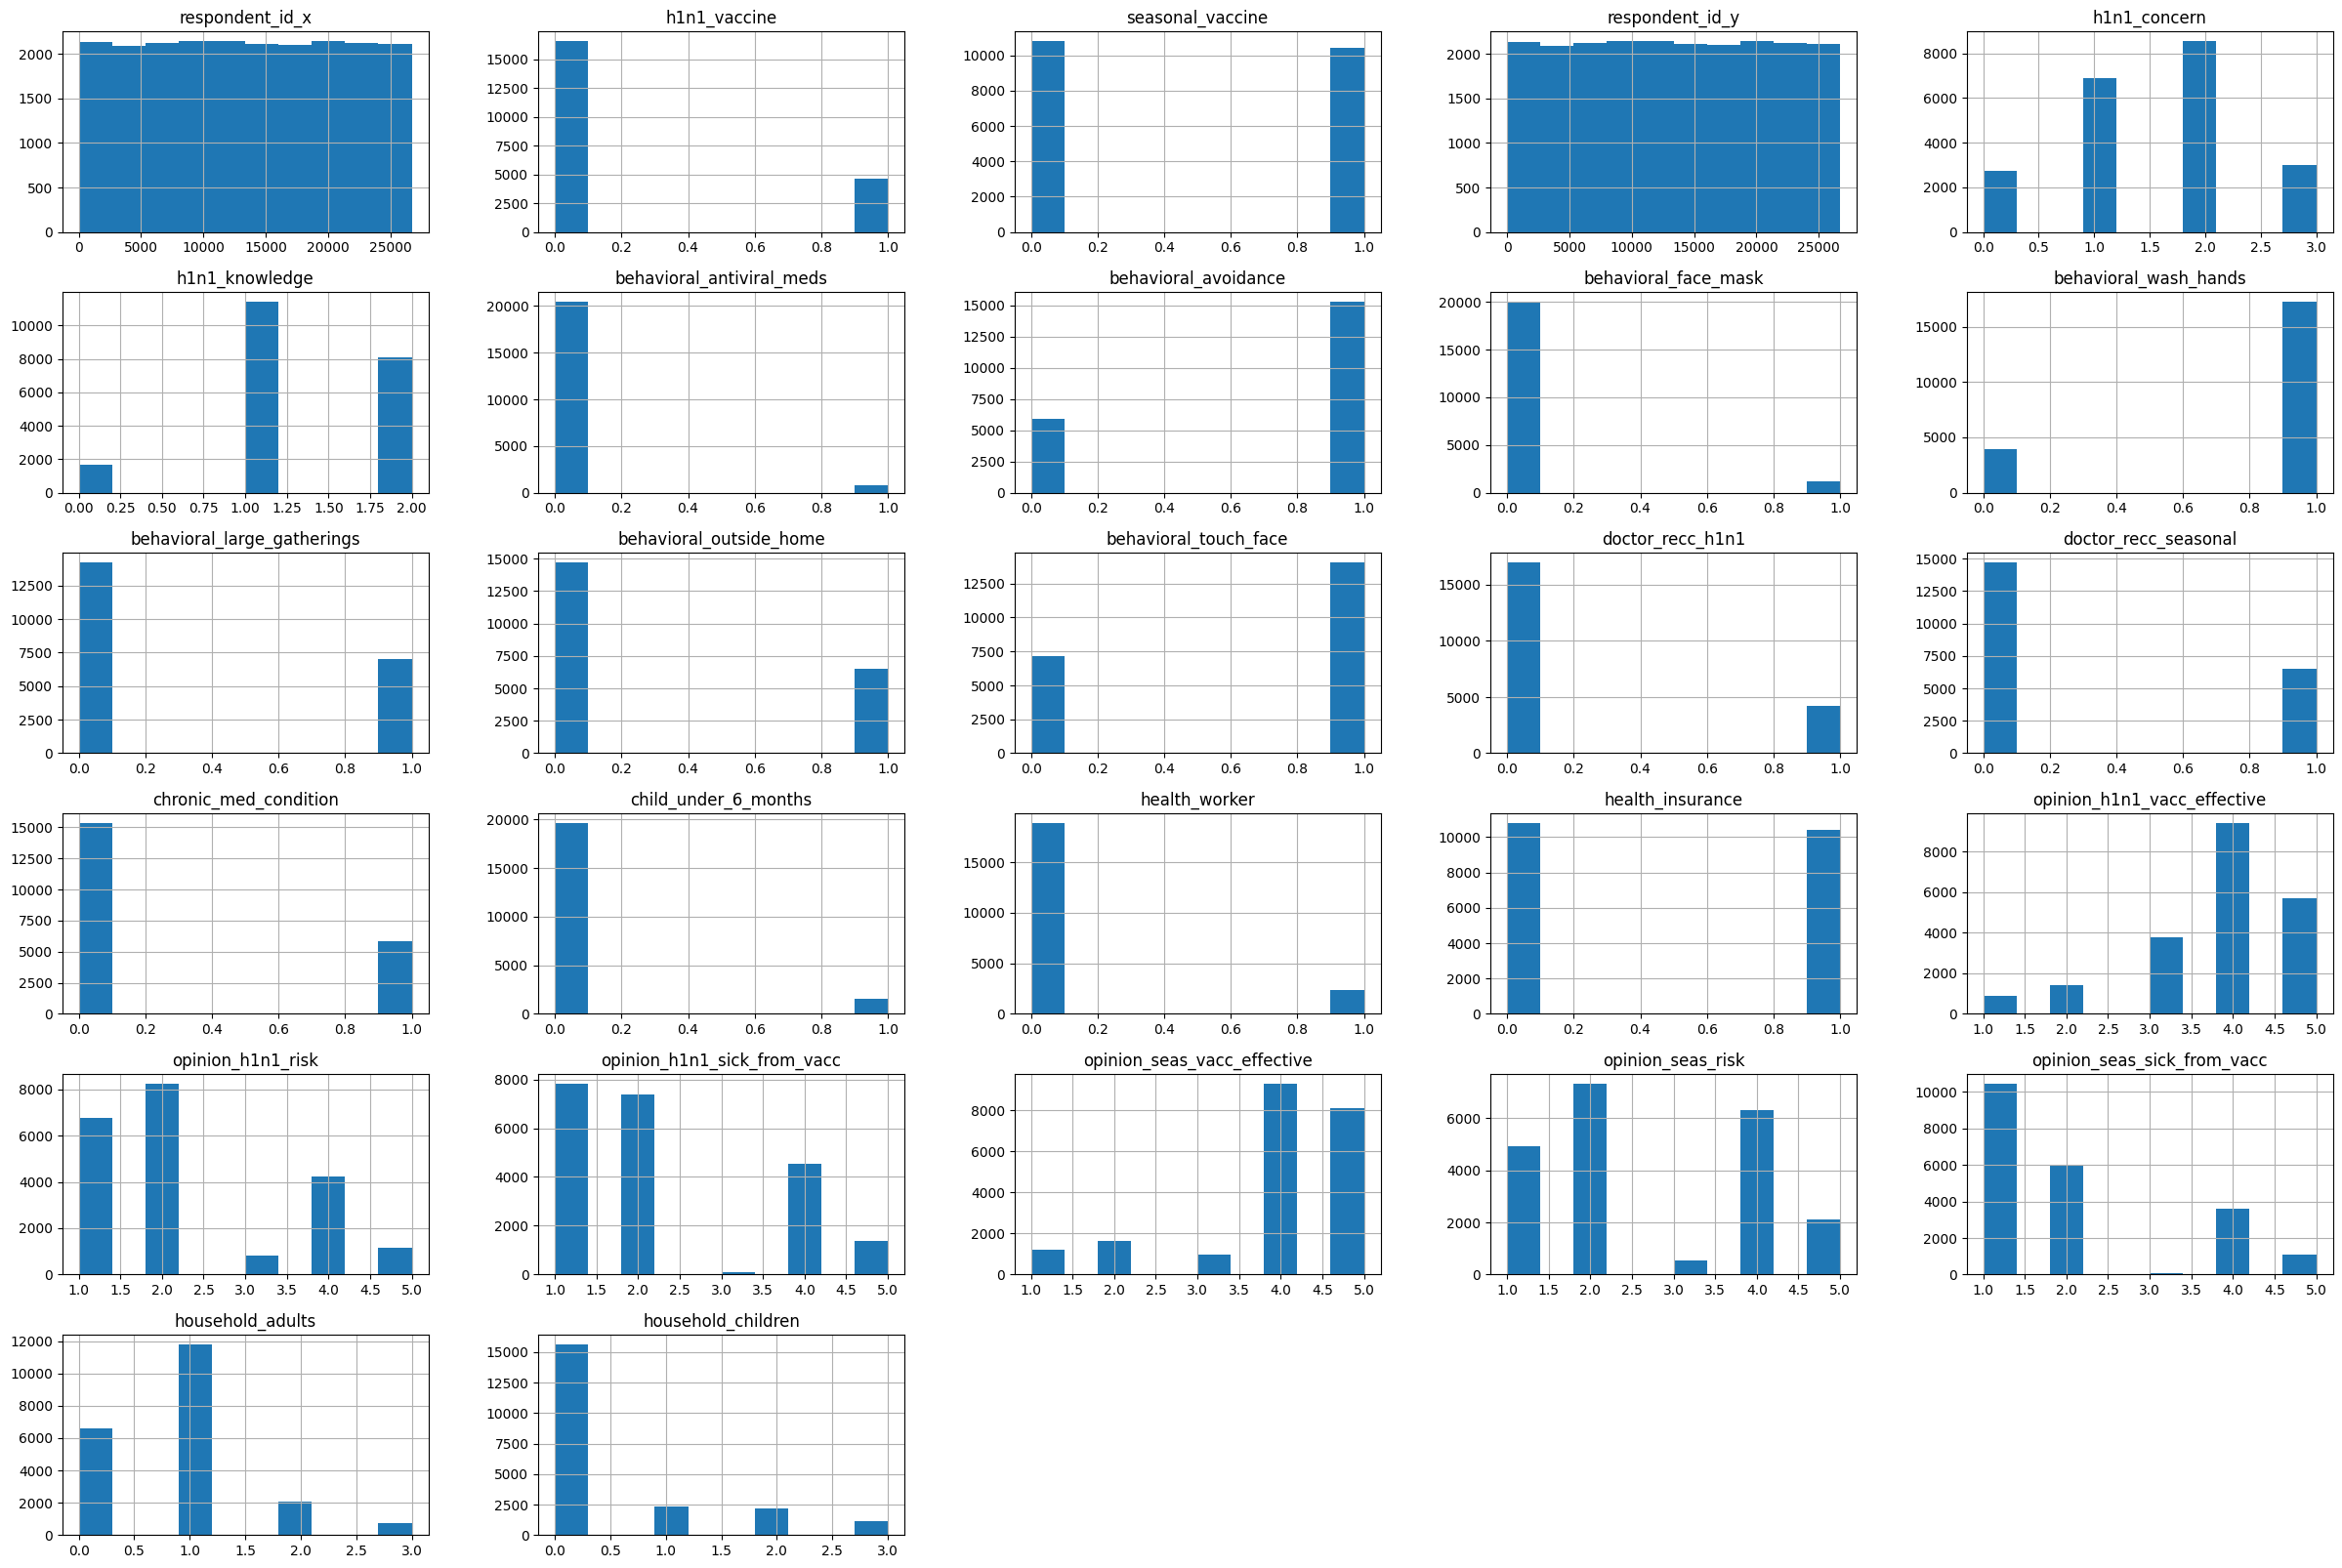

In [30]:
race.hist(figsize=(30,20))
plt.show();

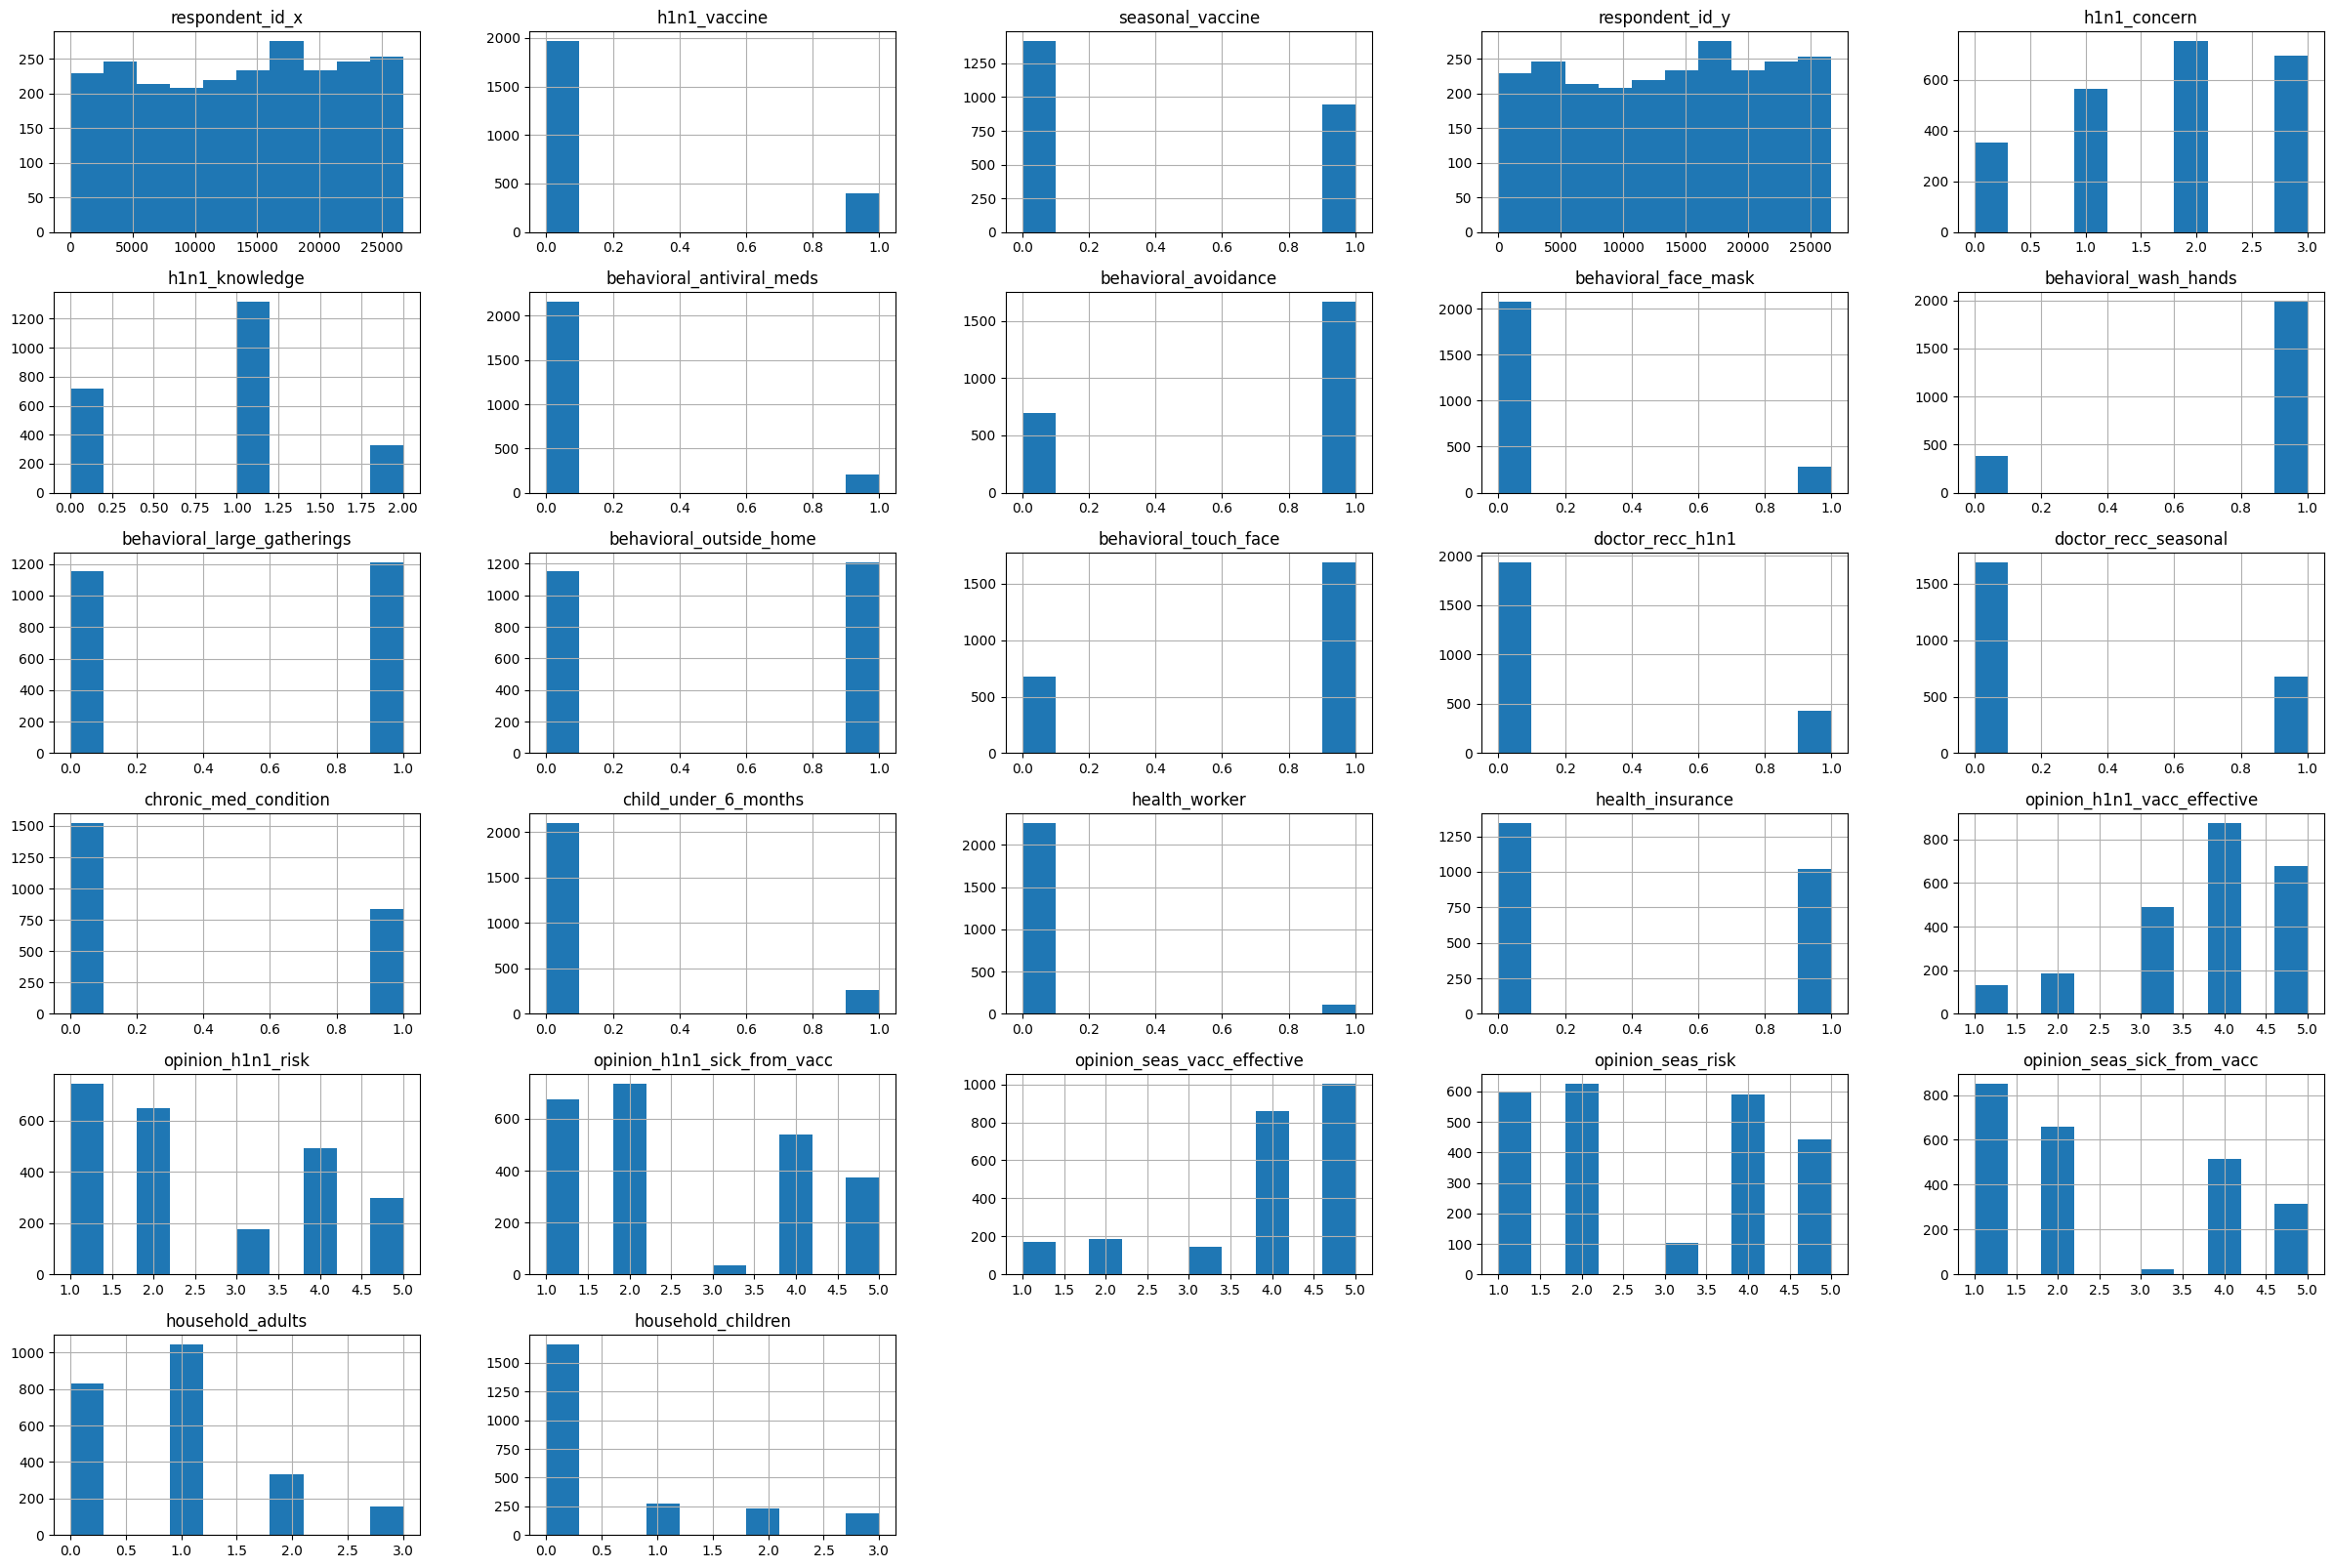

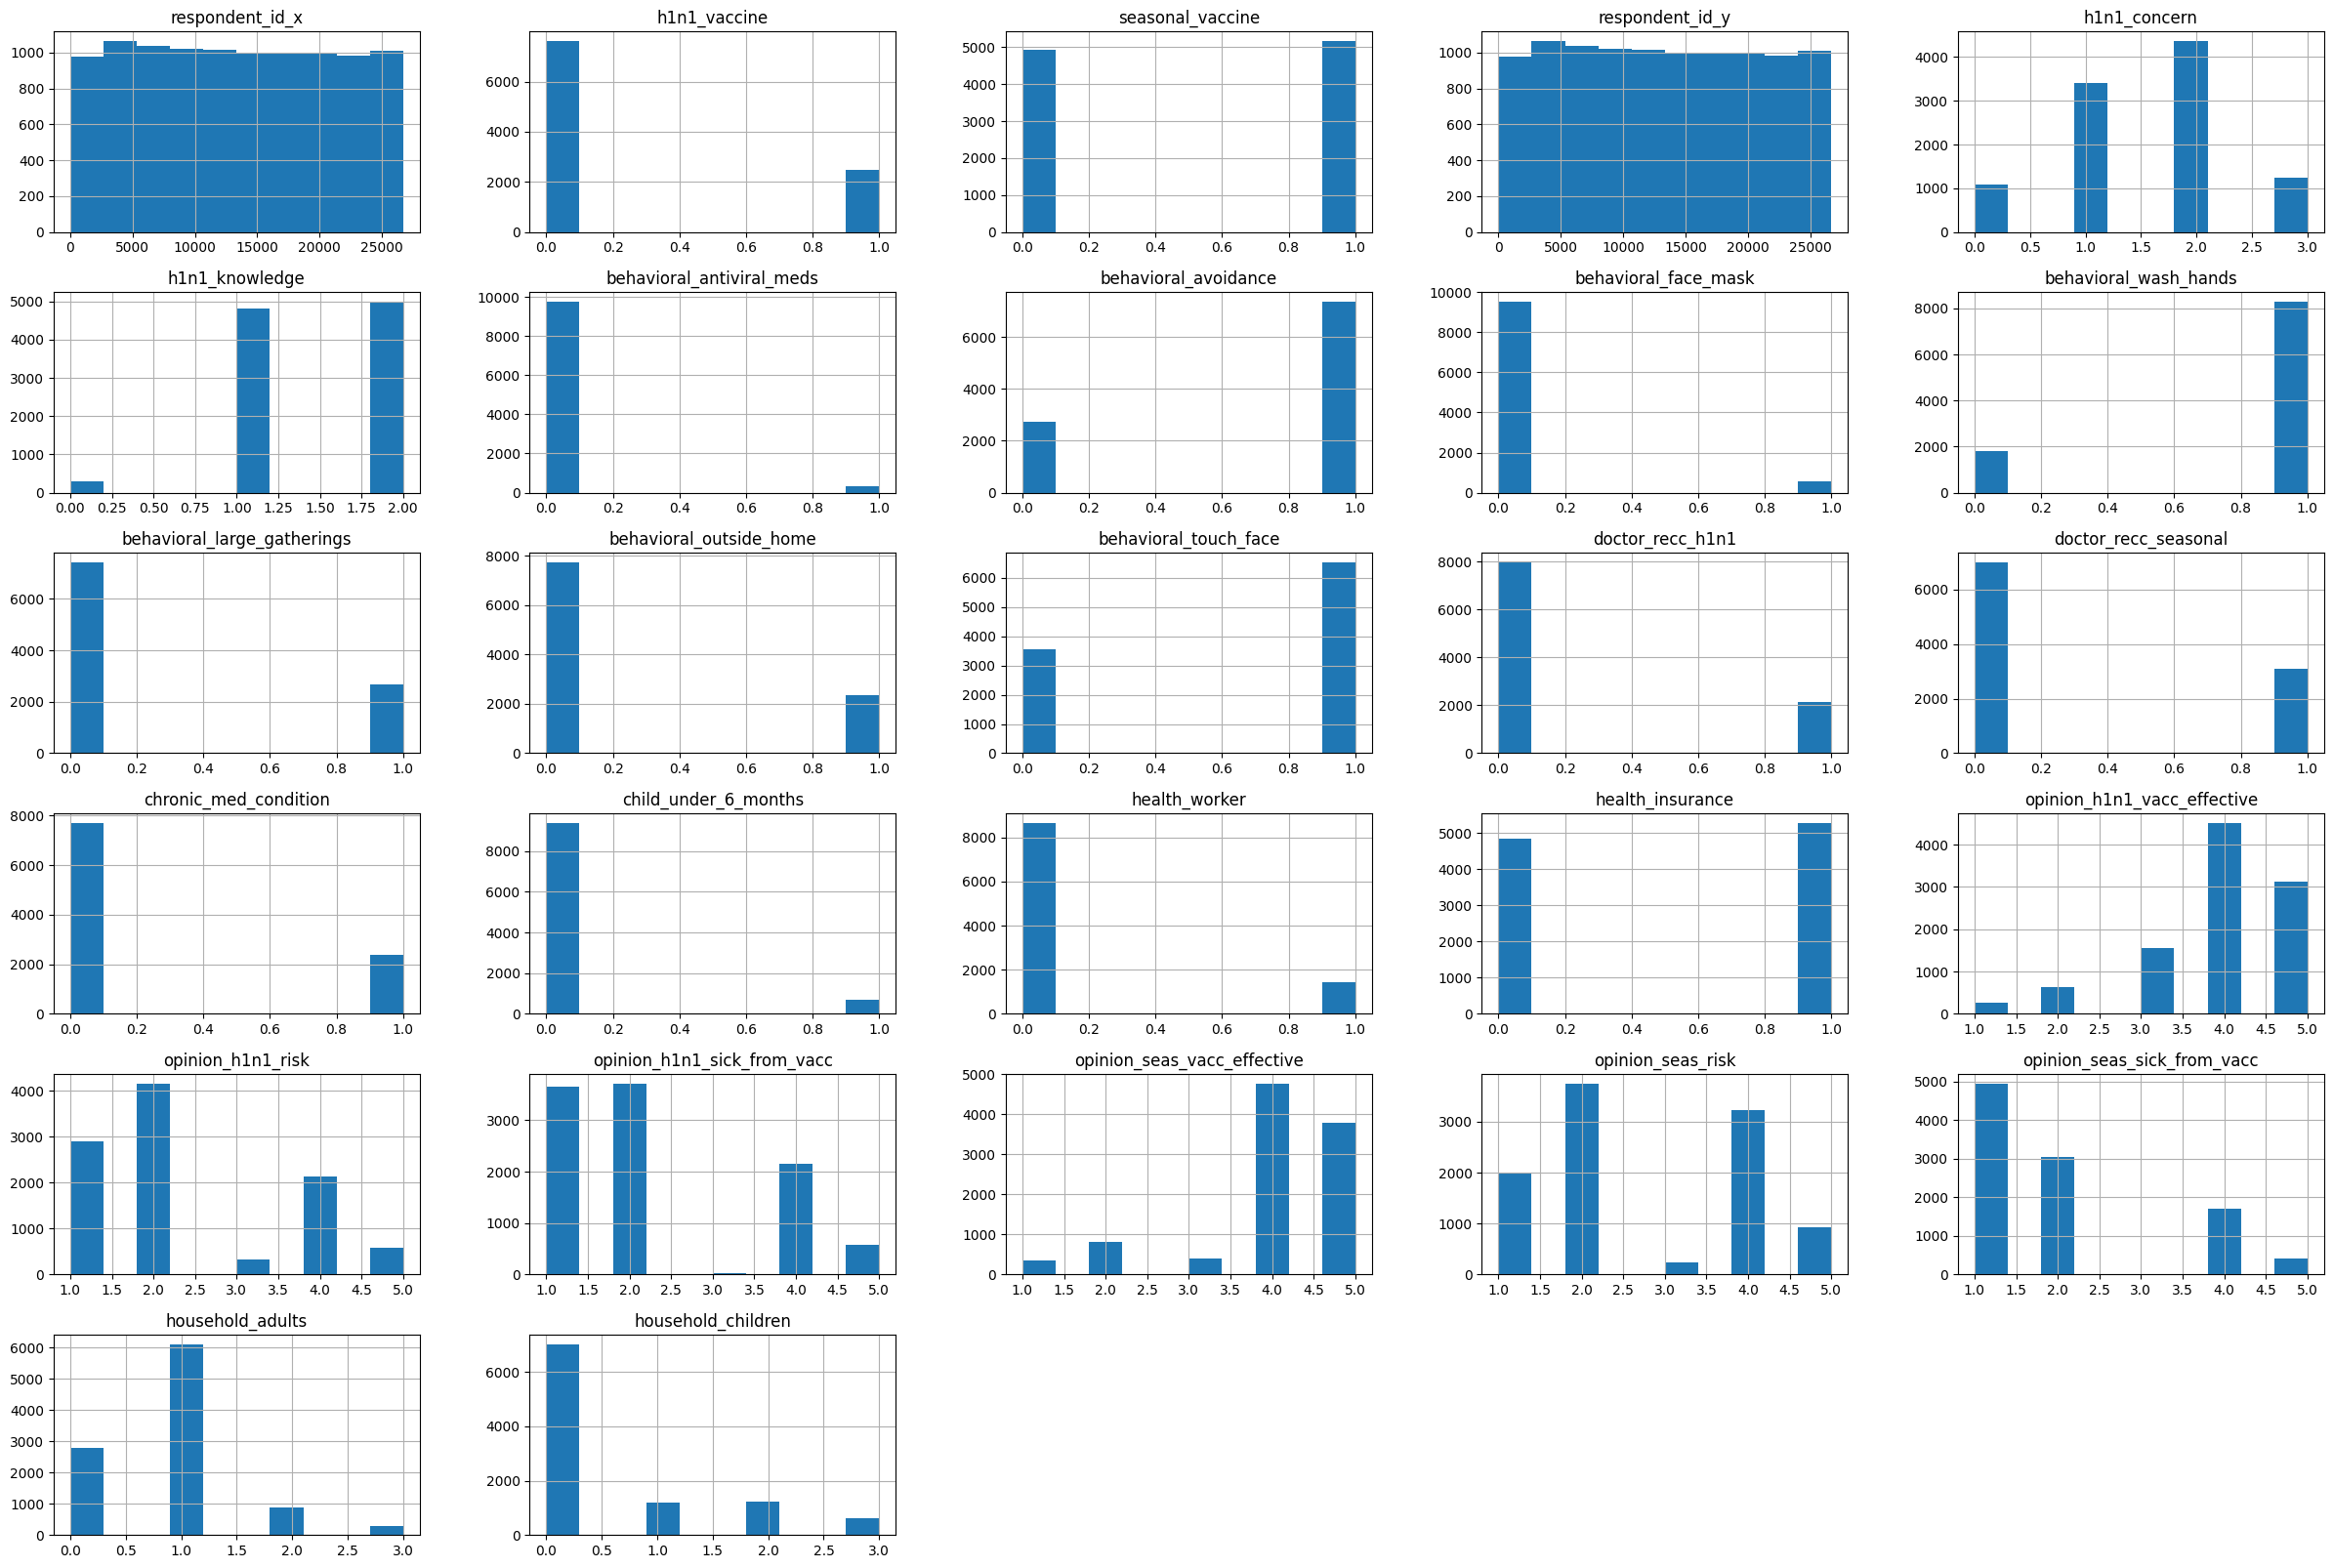

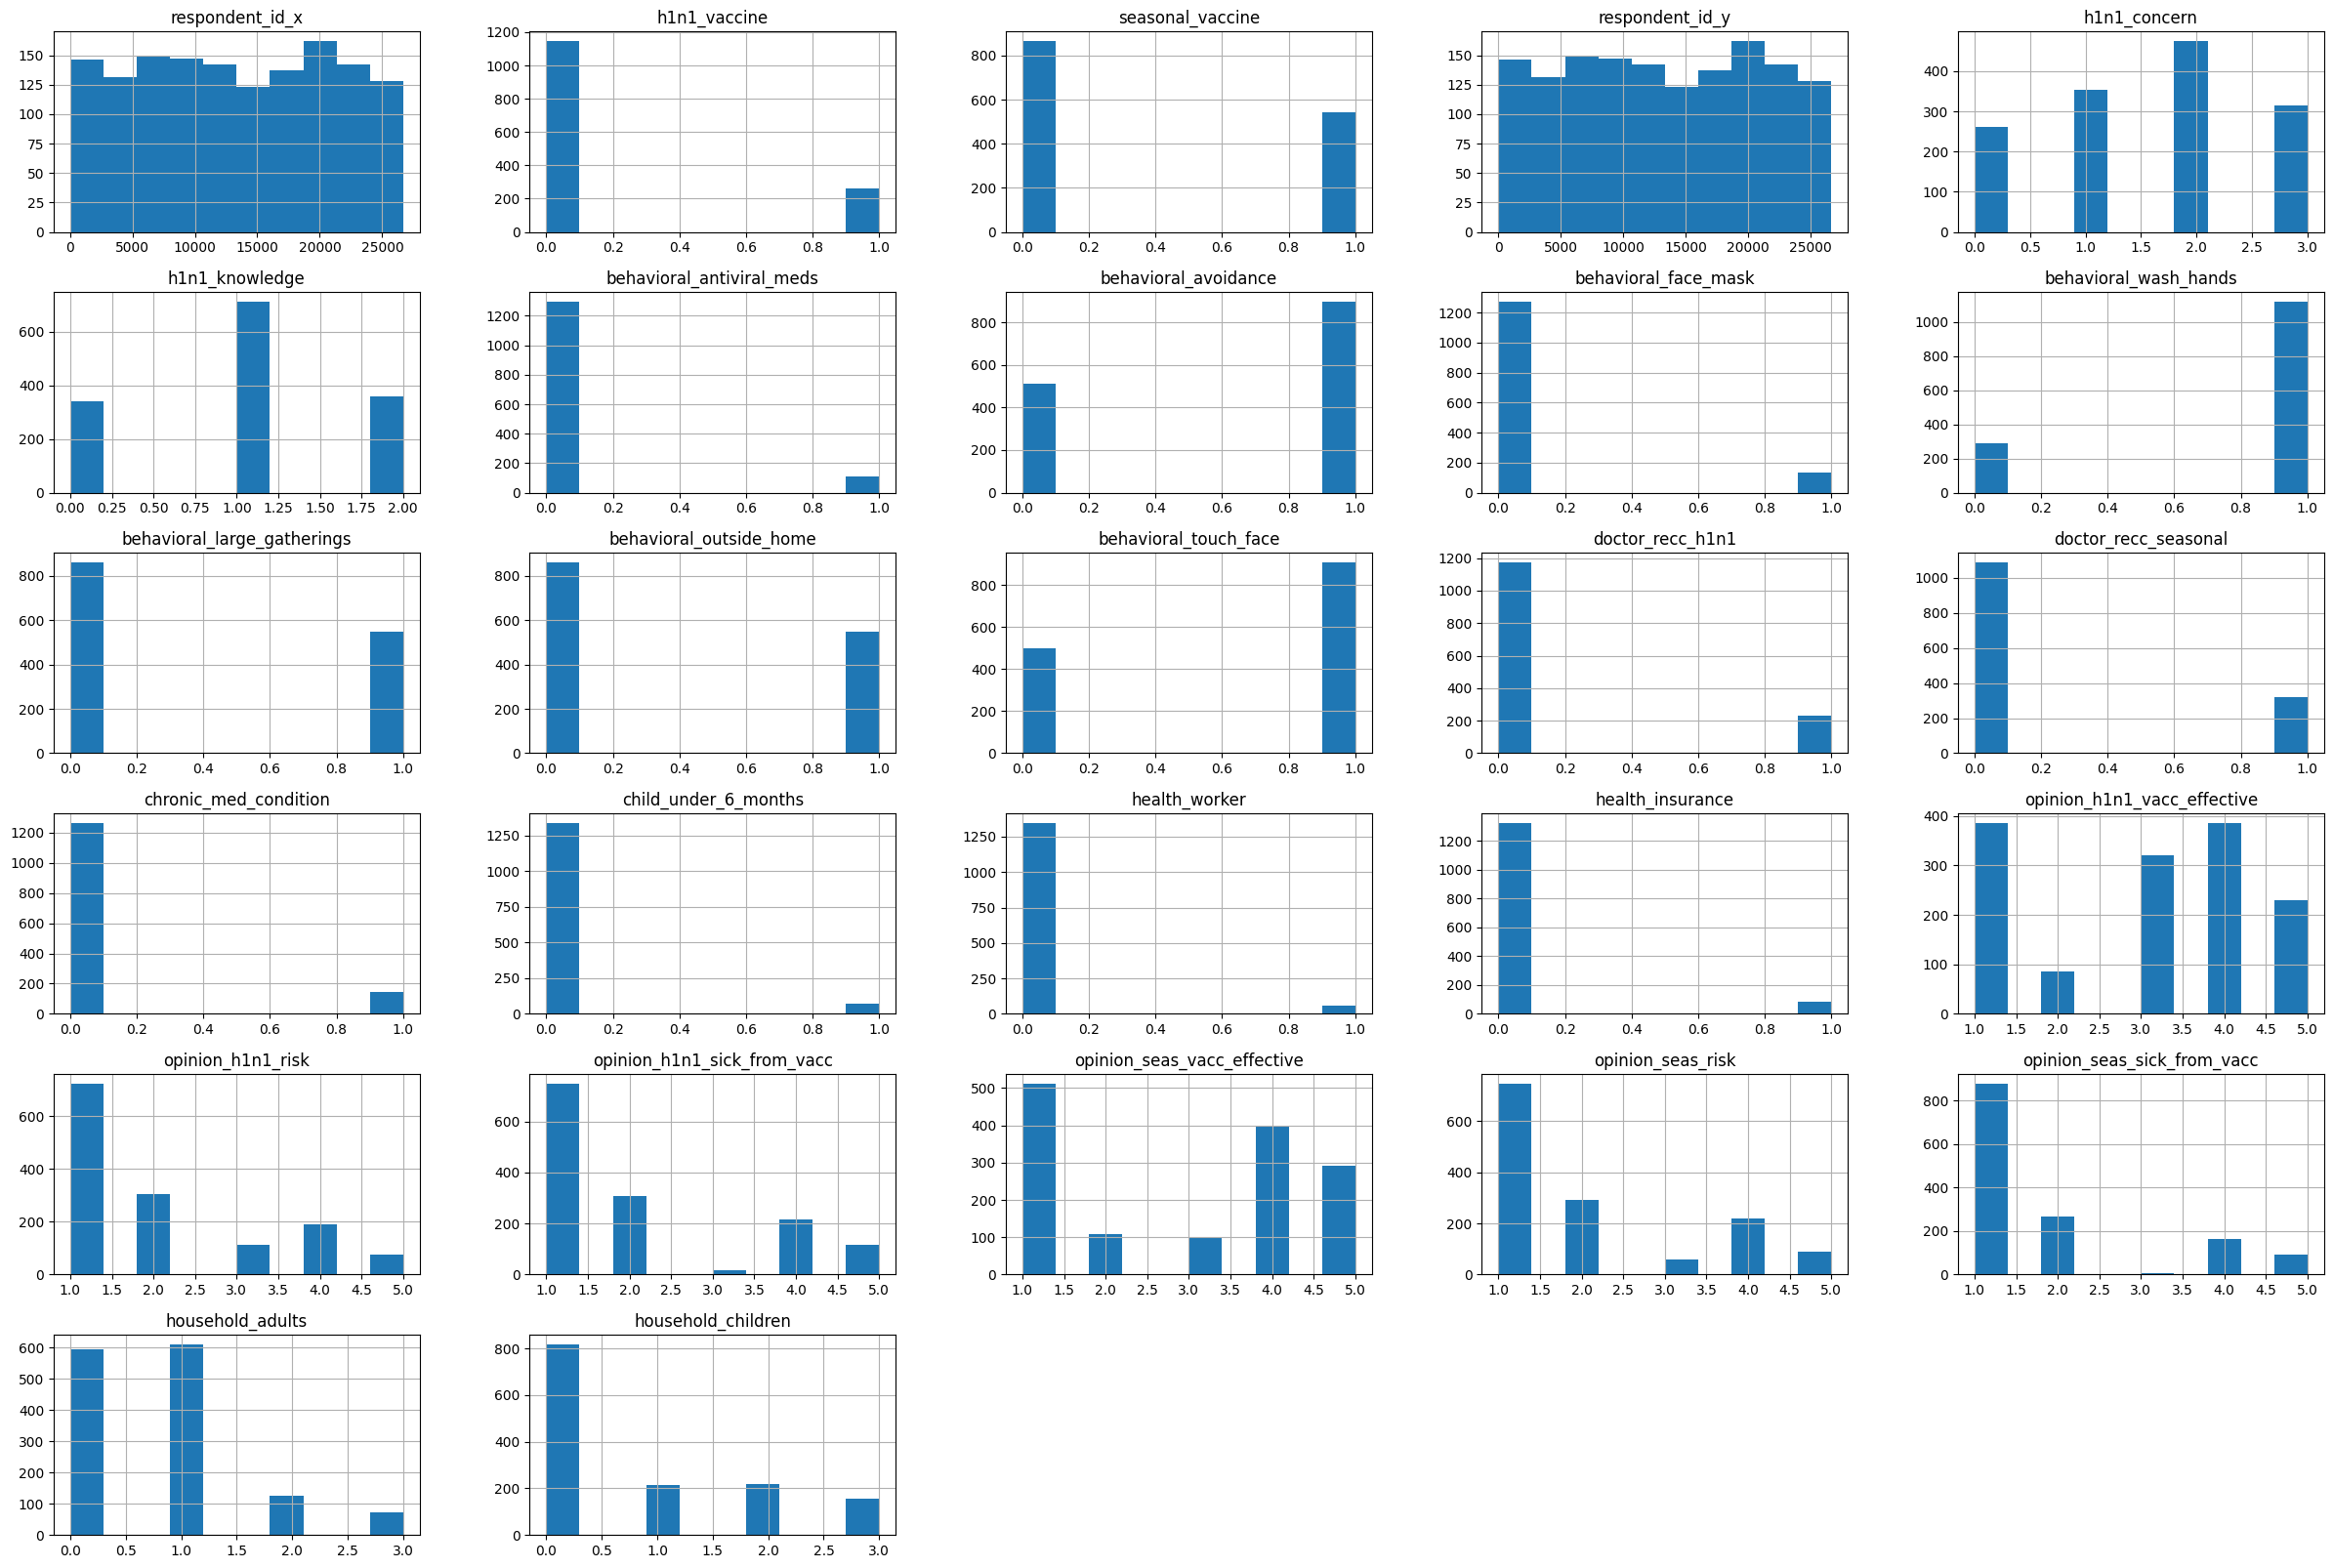

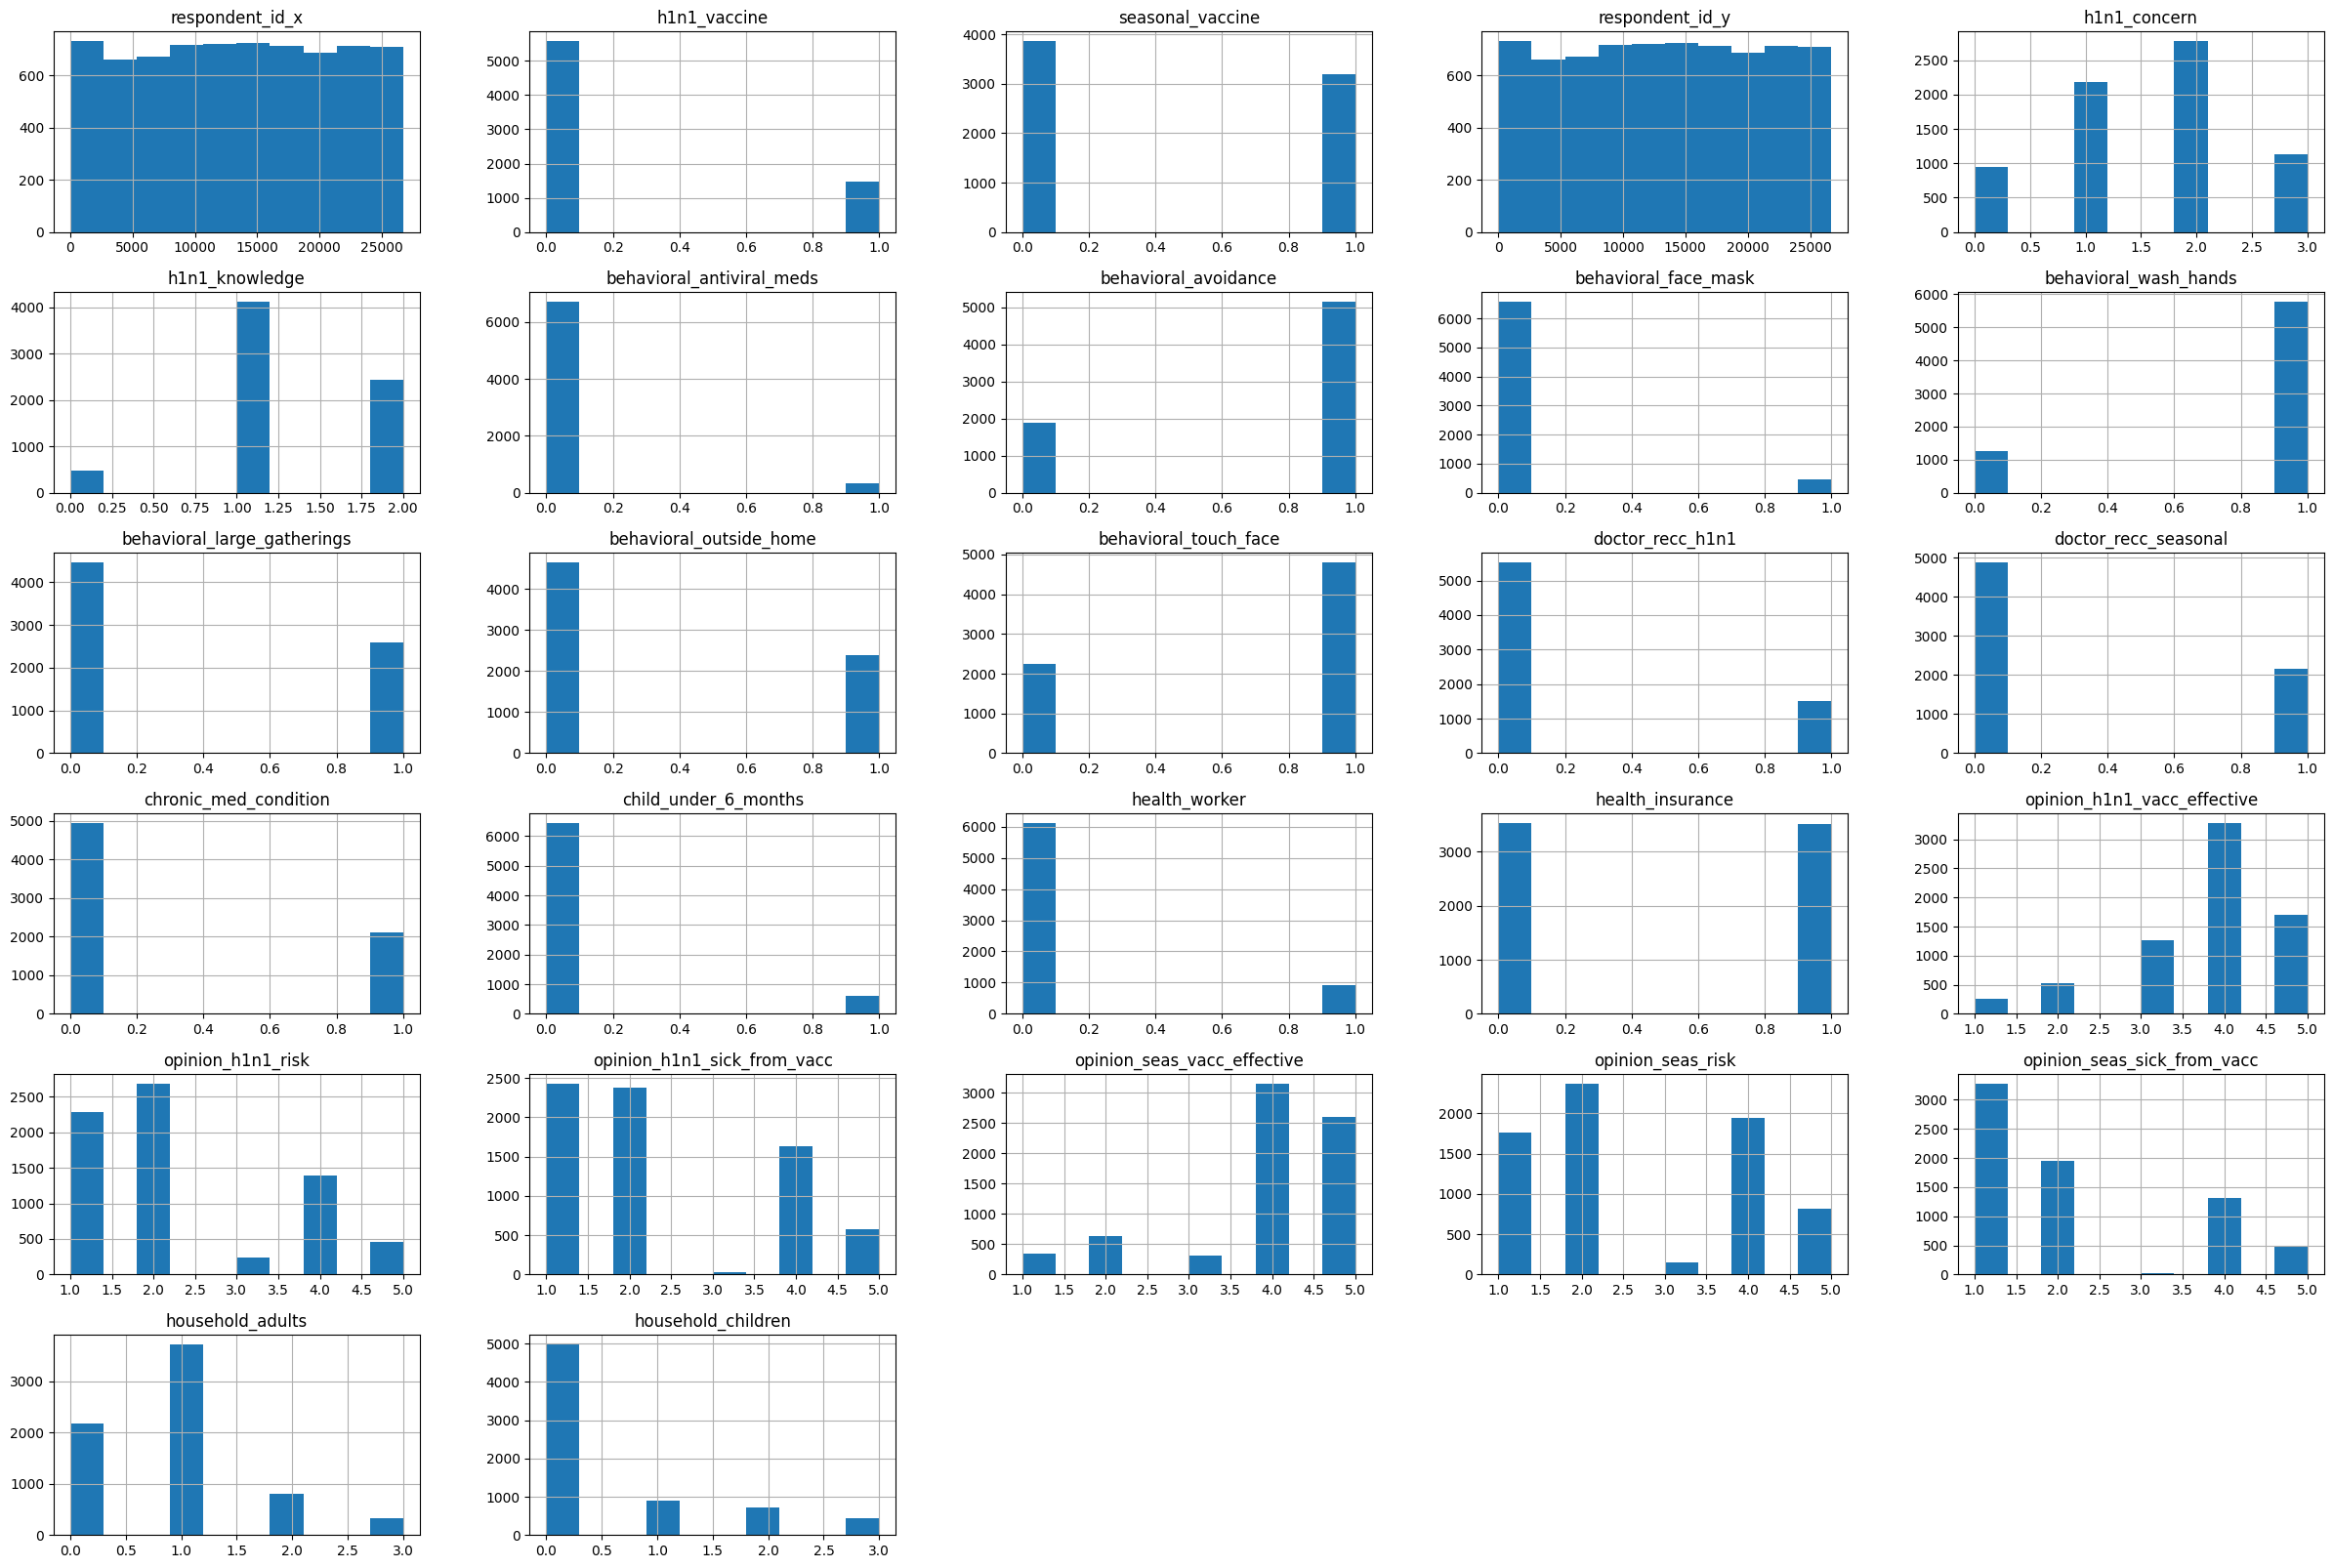

In [31]:
educ.hist(figsize=(30,20))
plt.show();

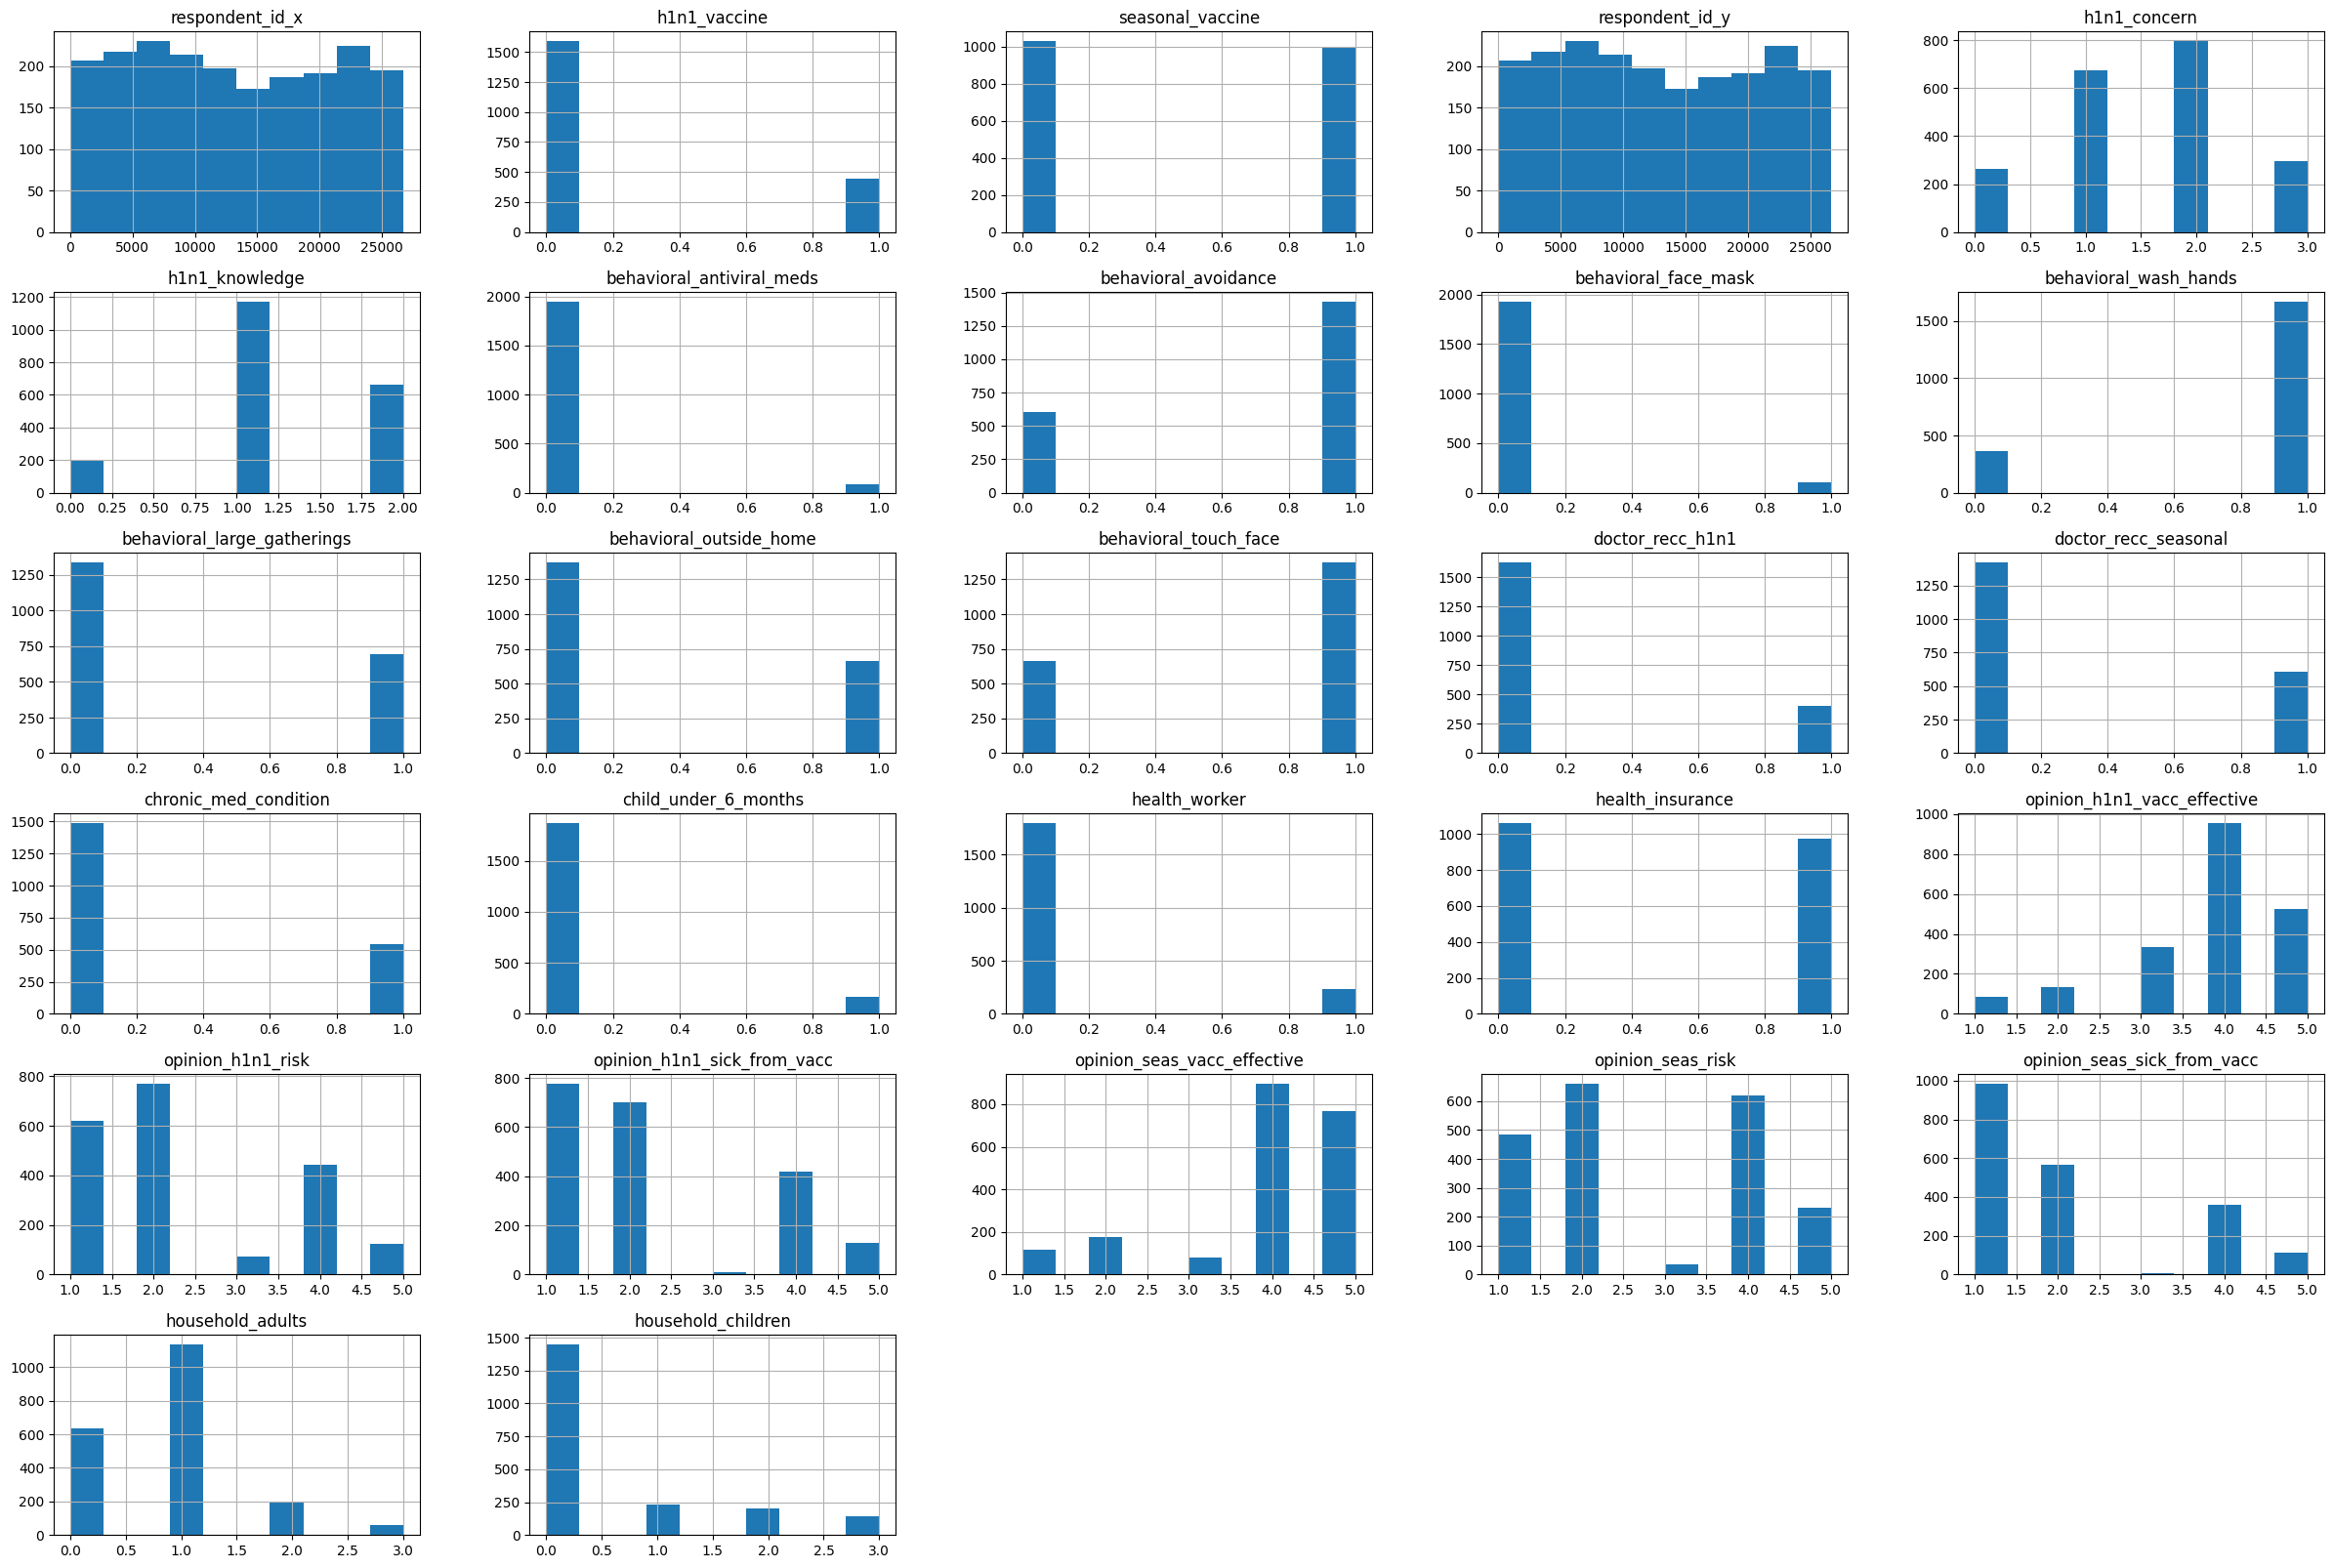

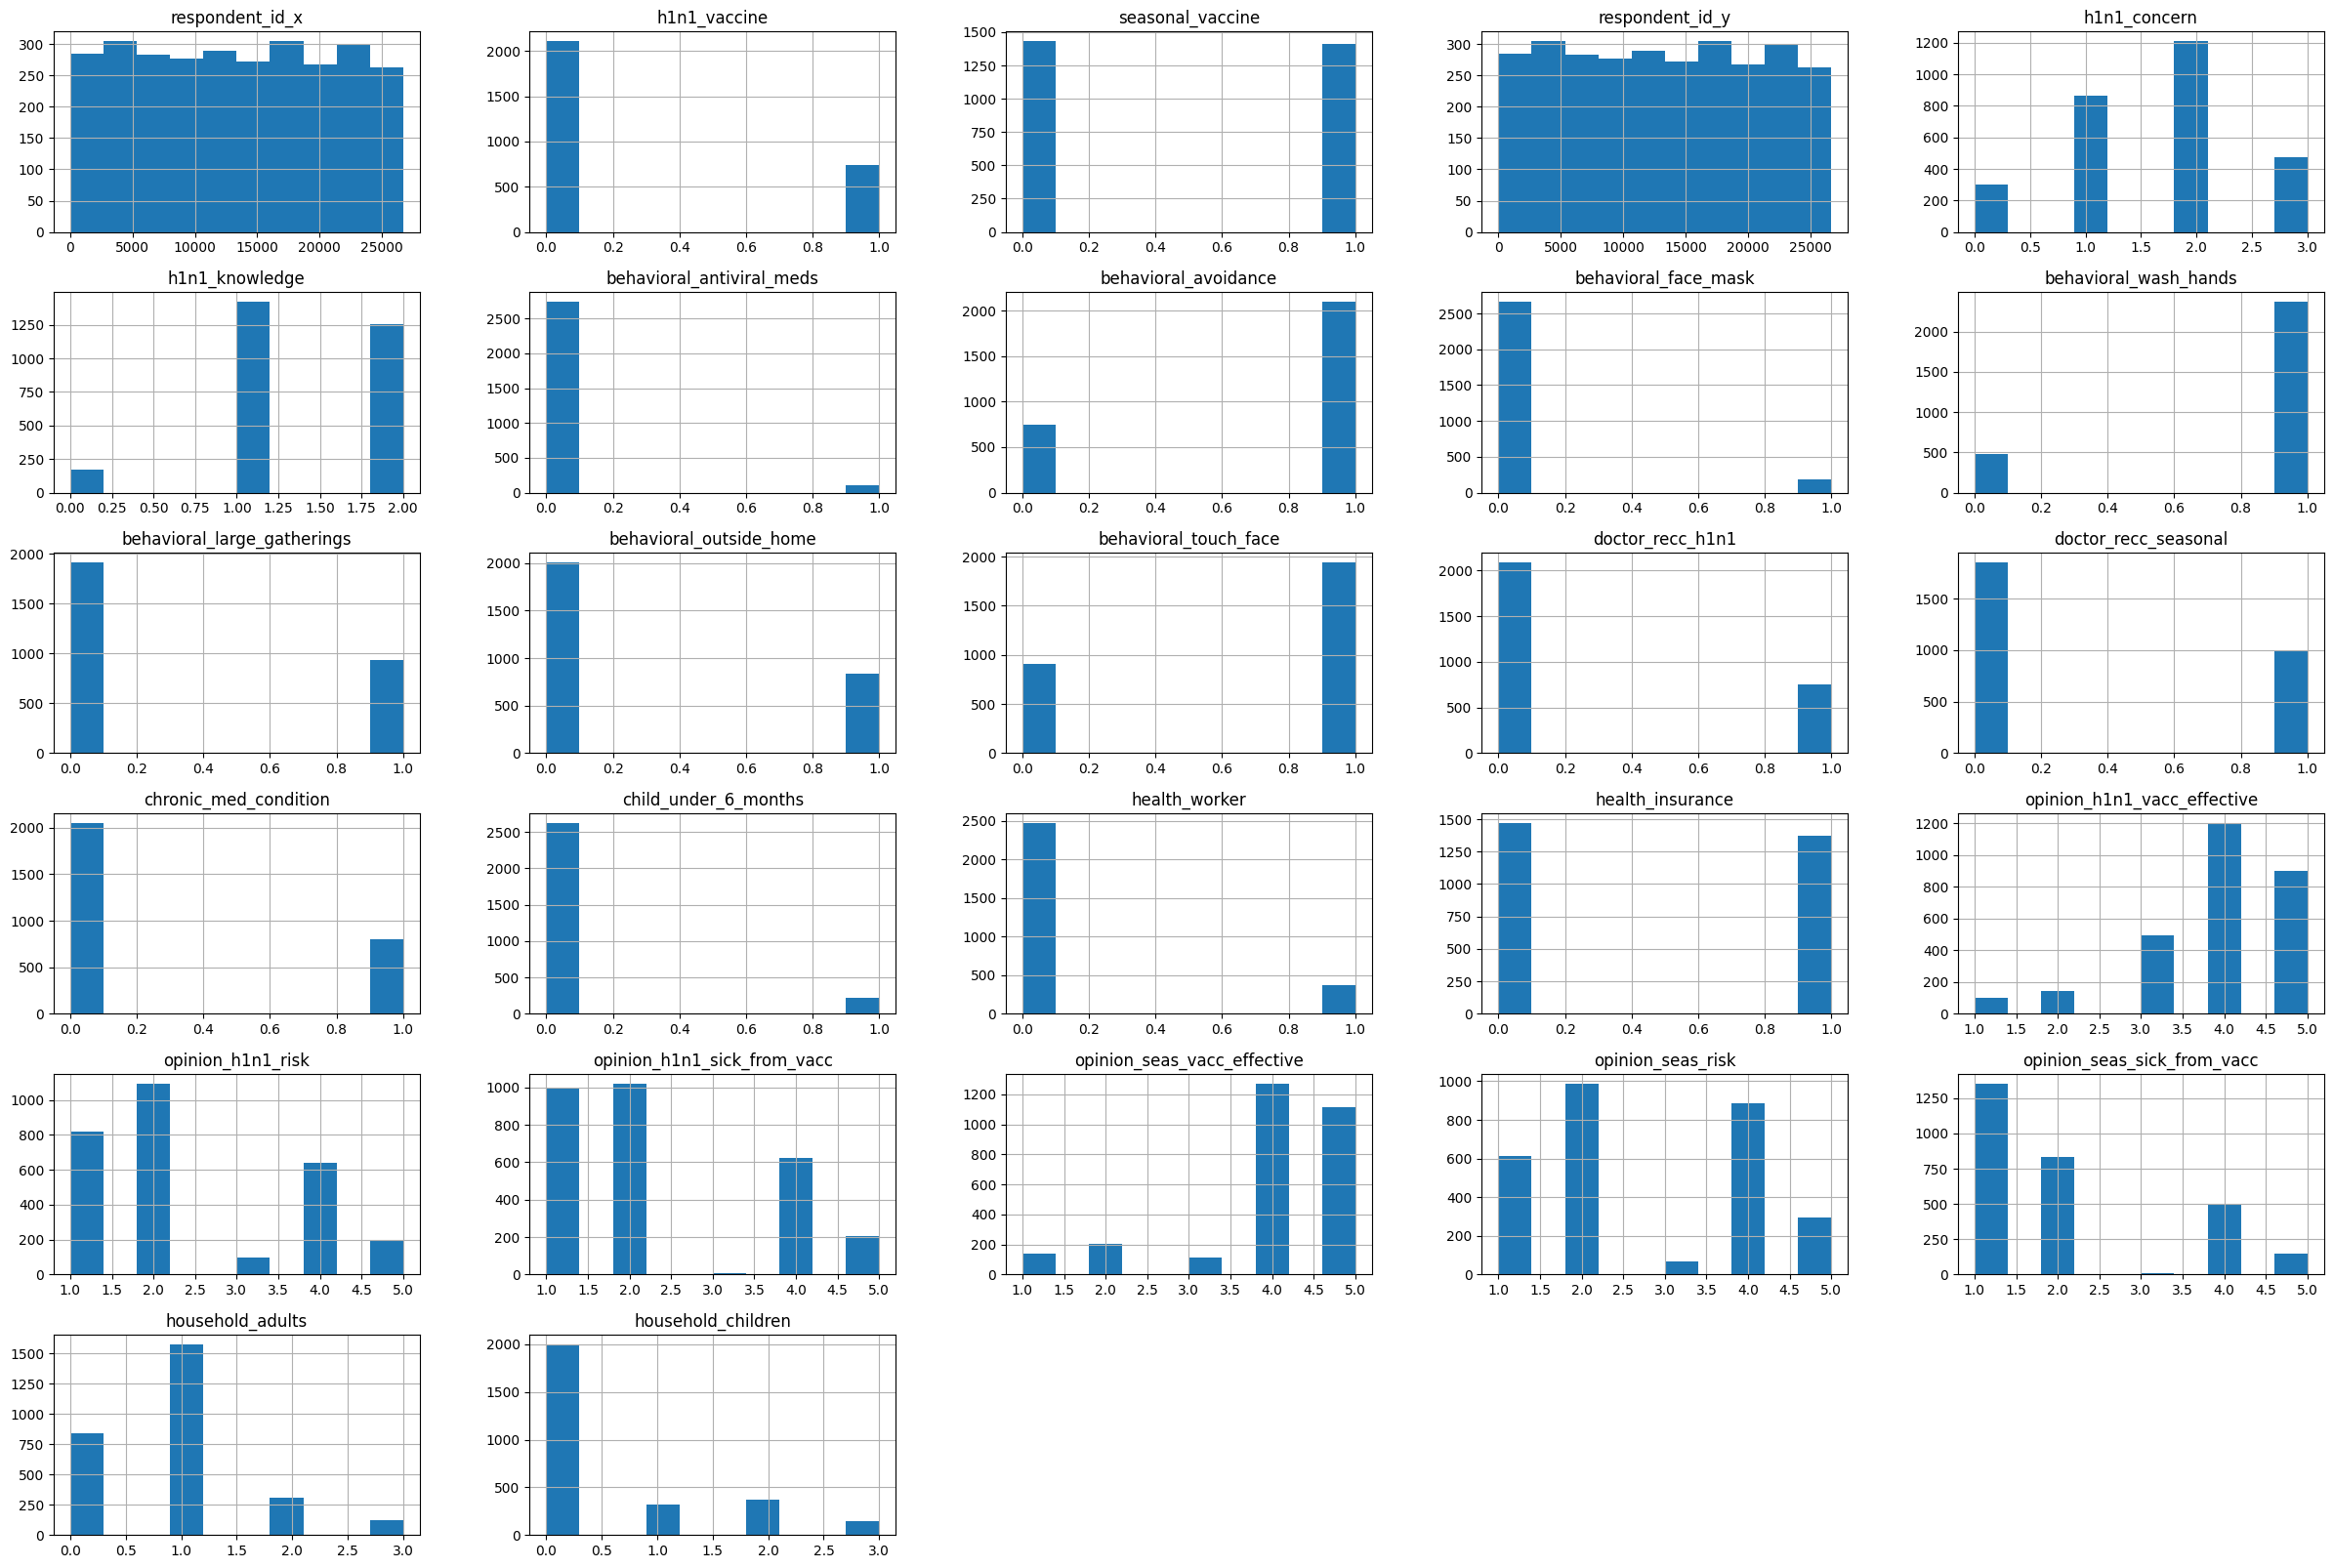

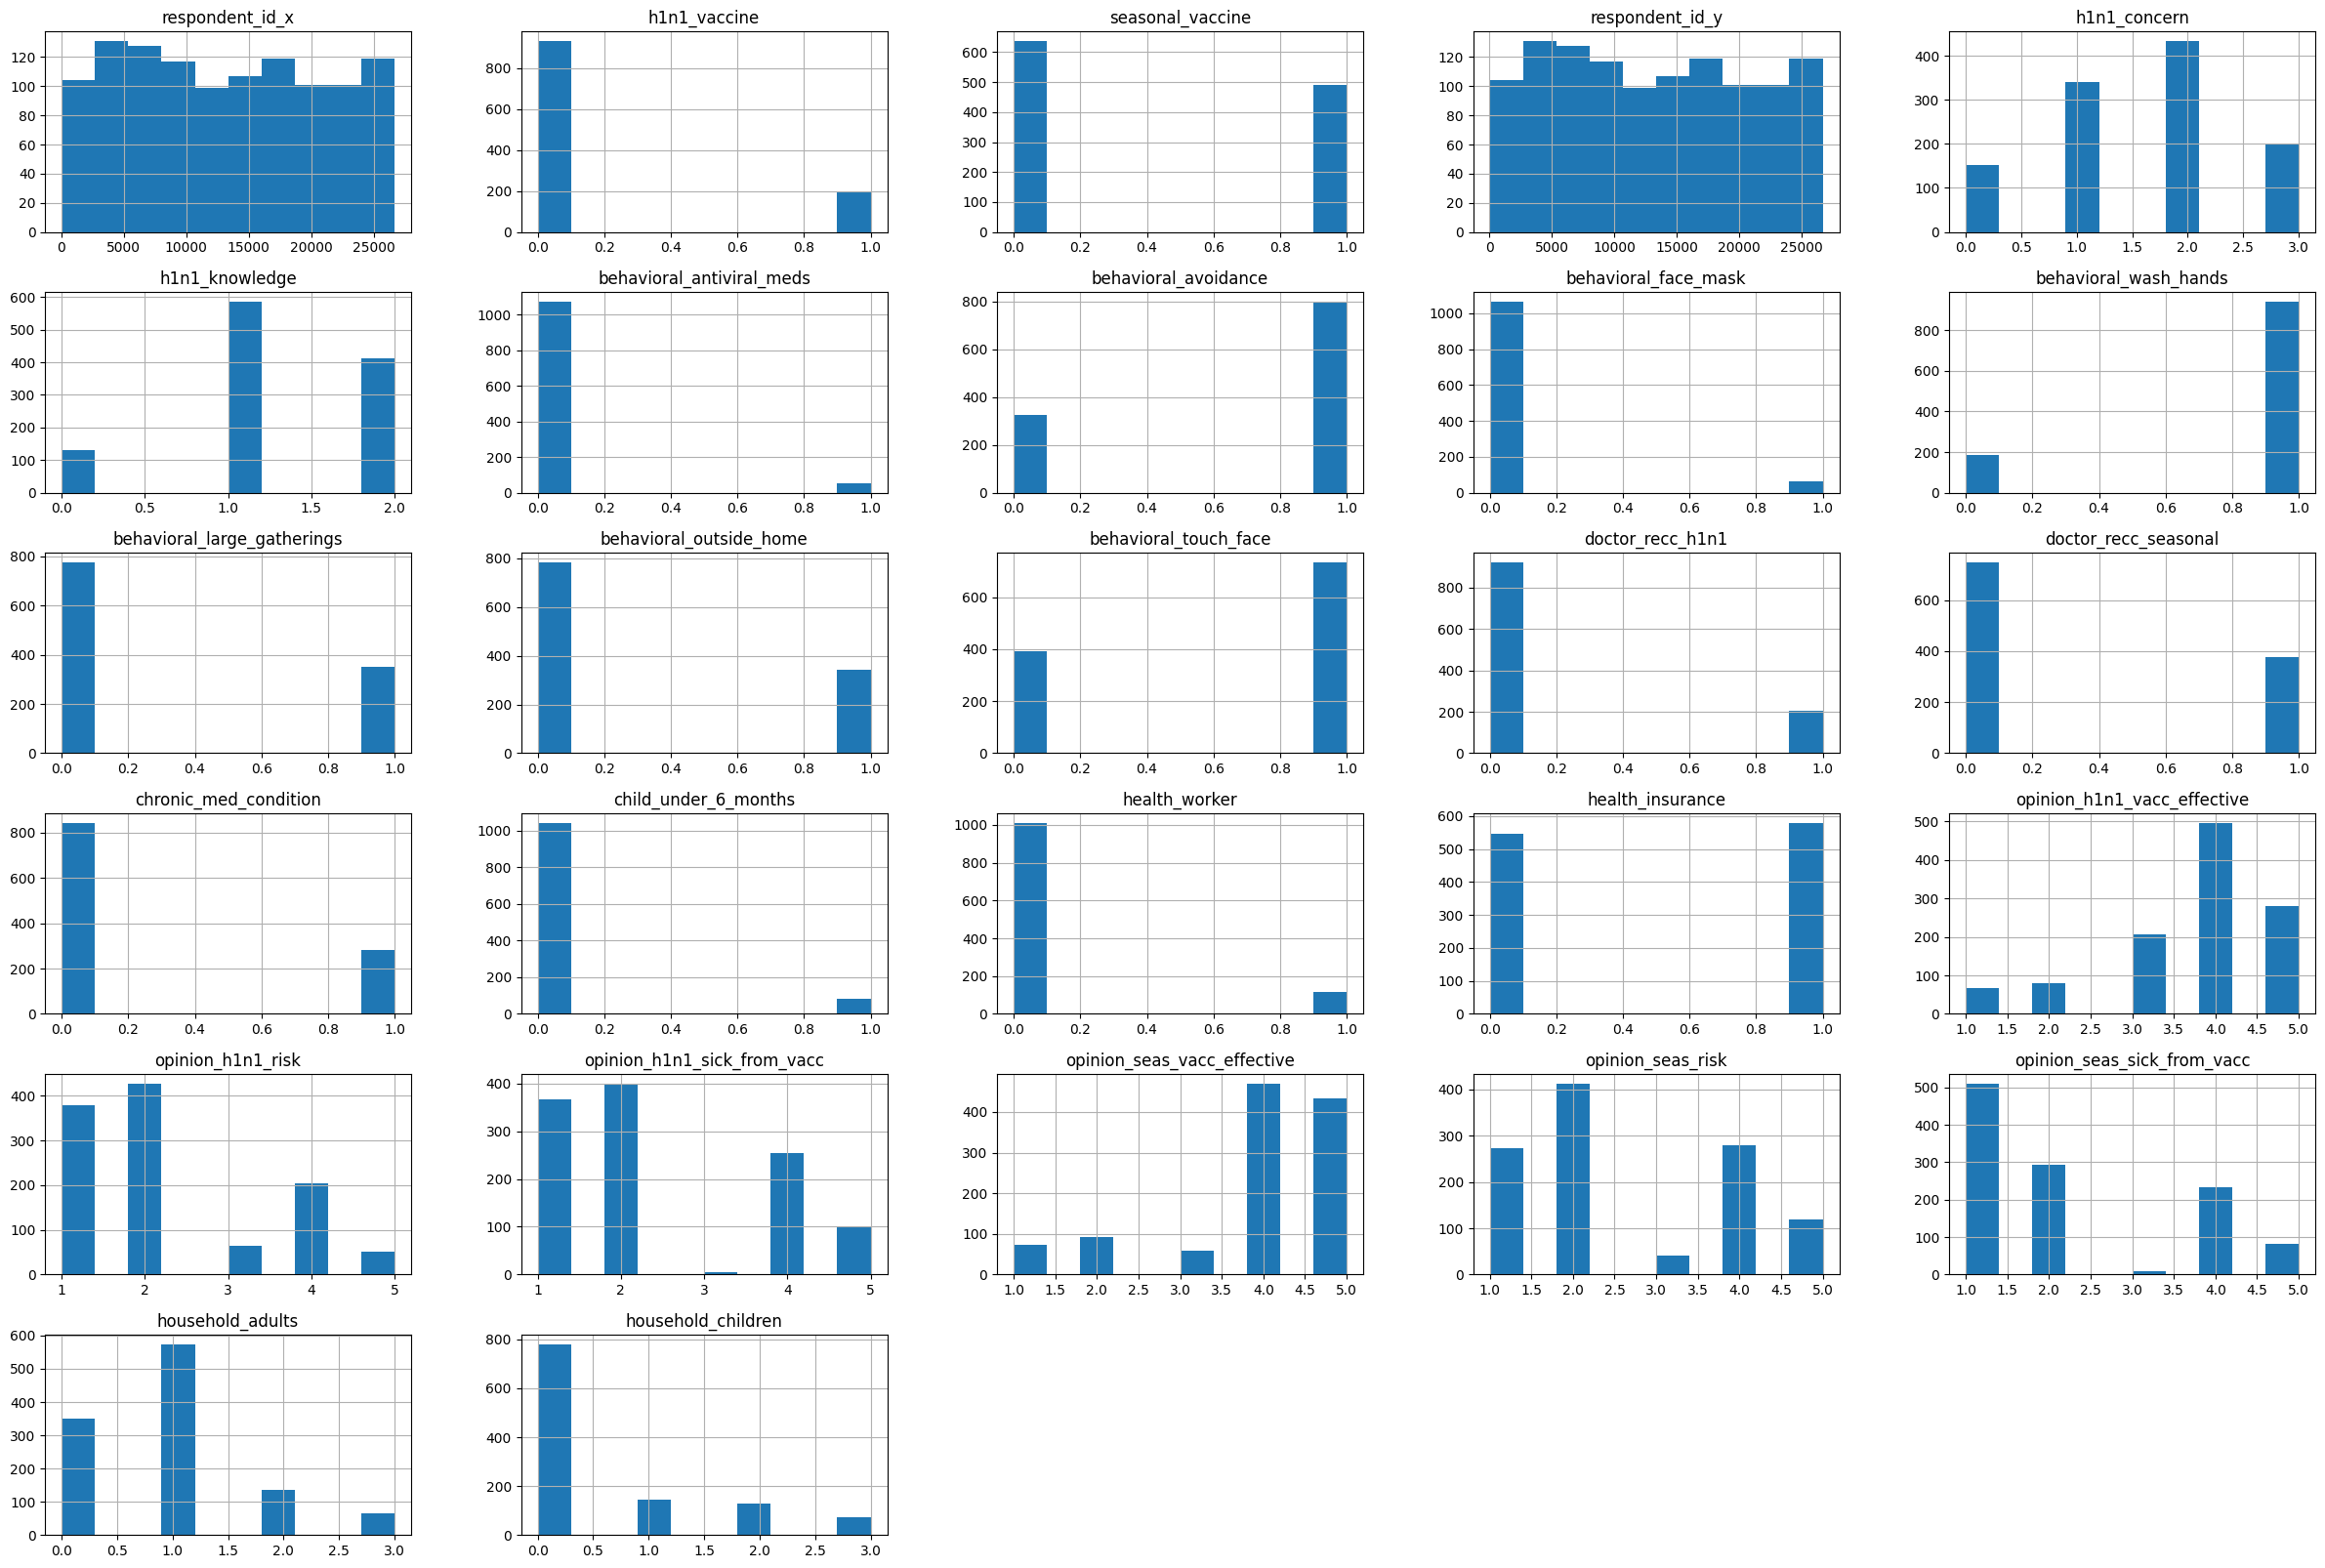

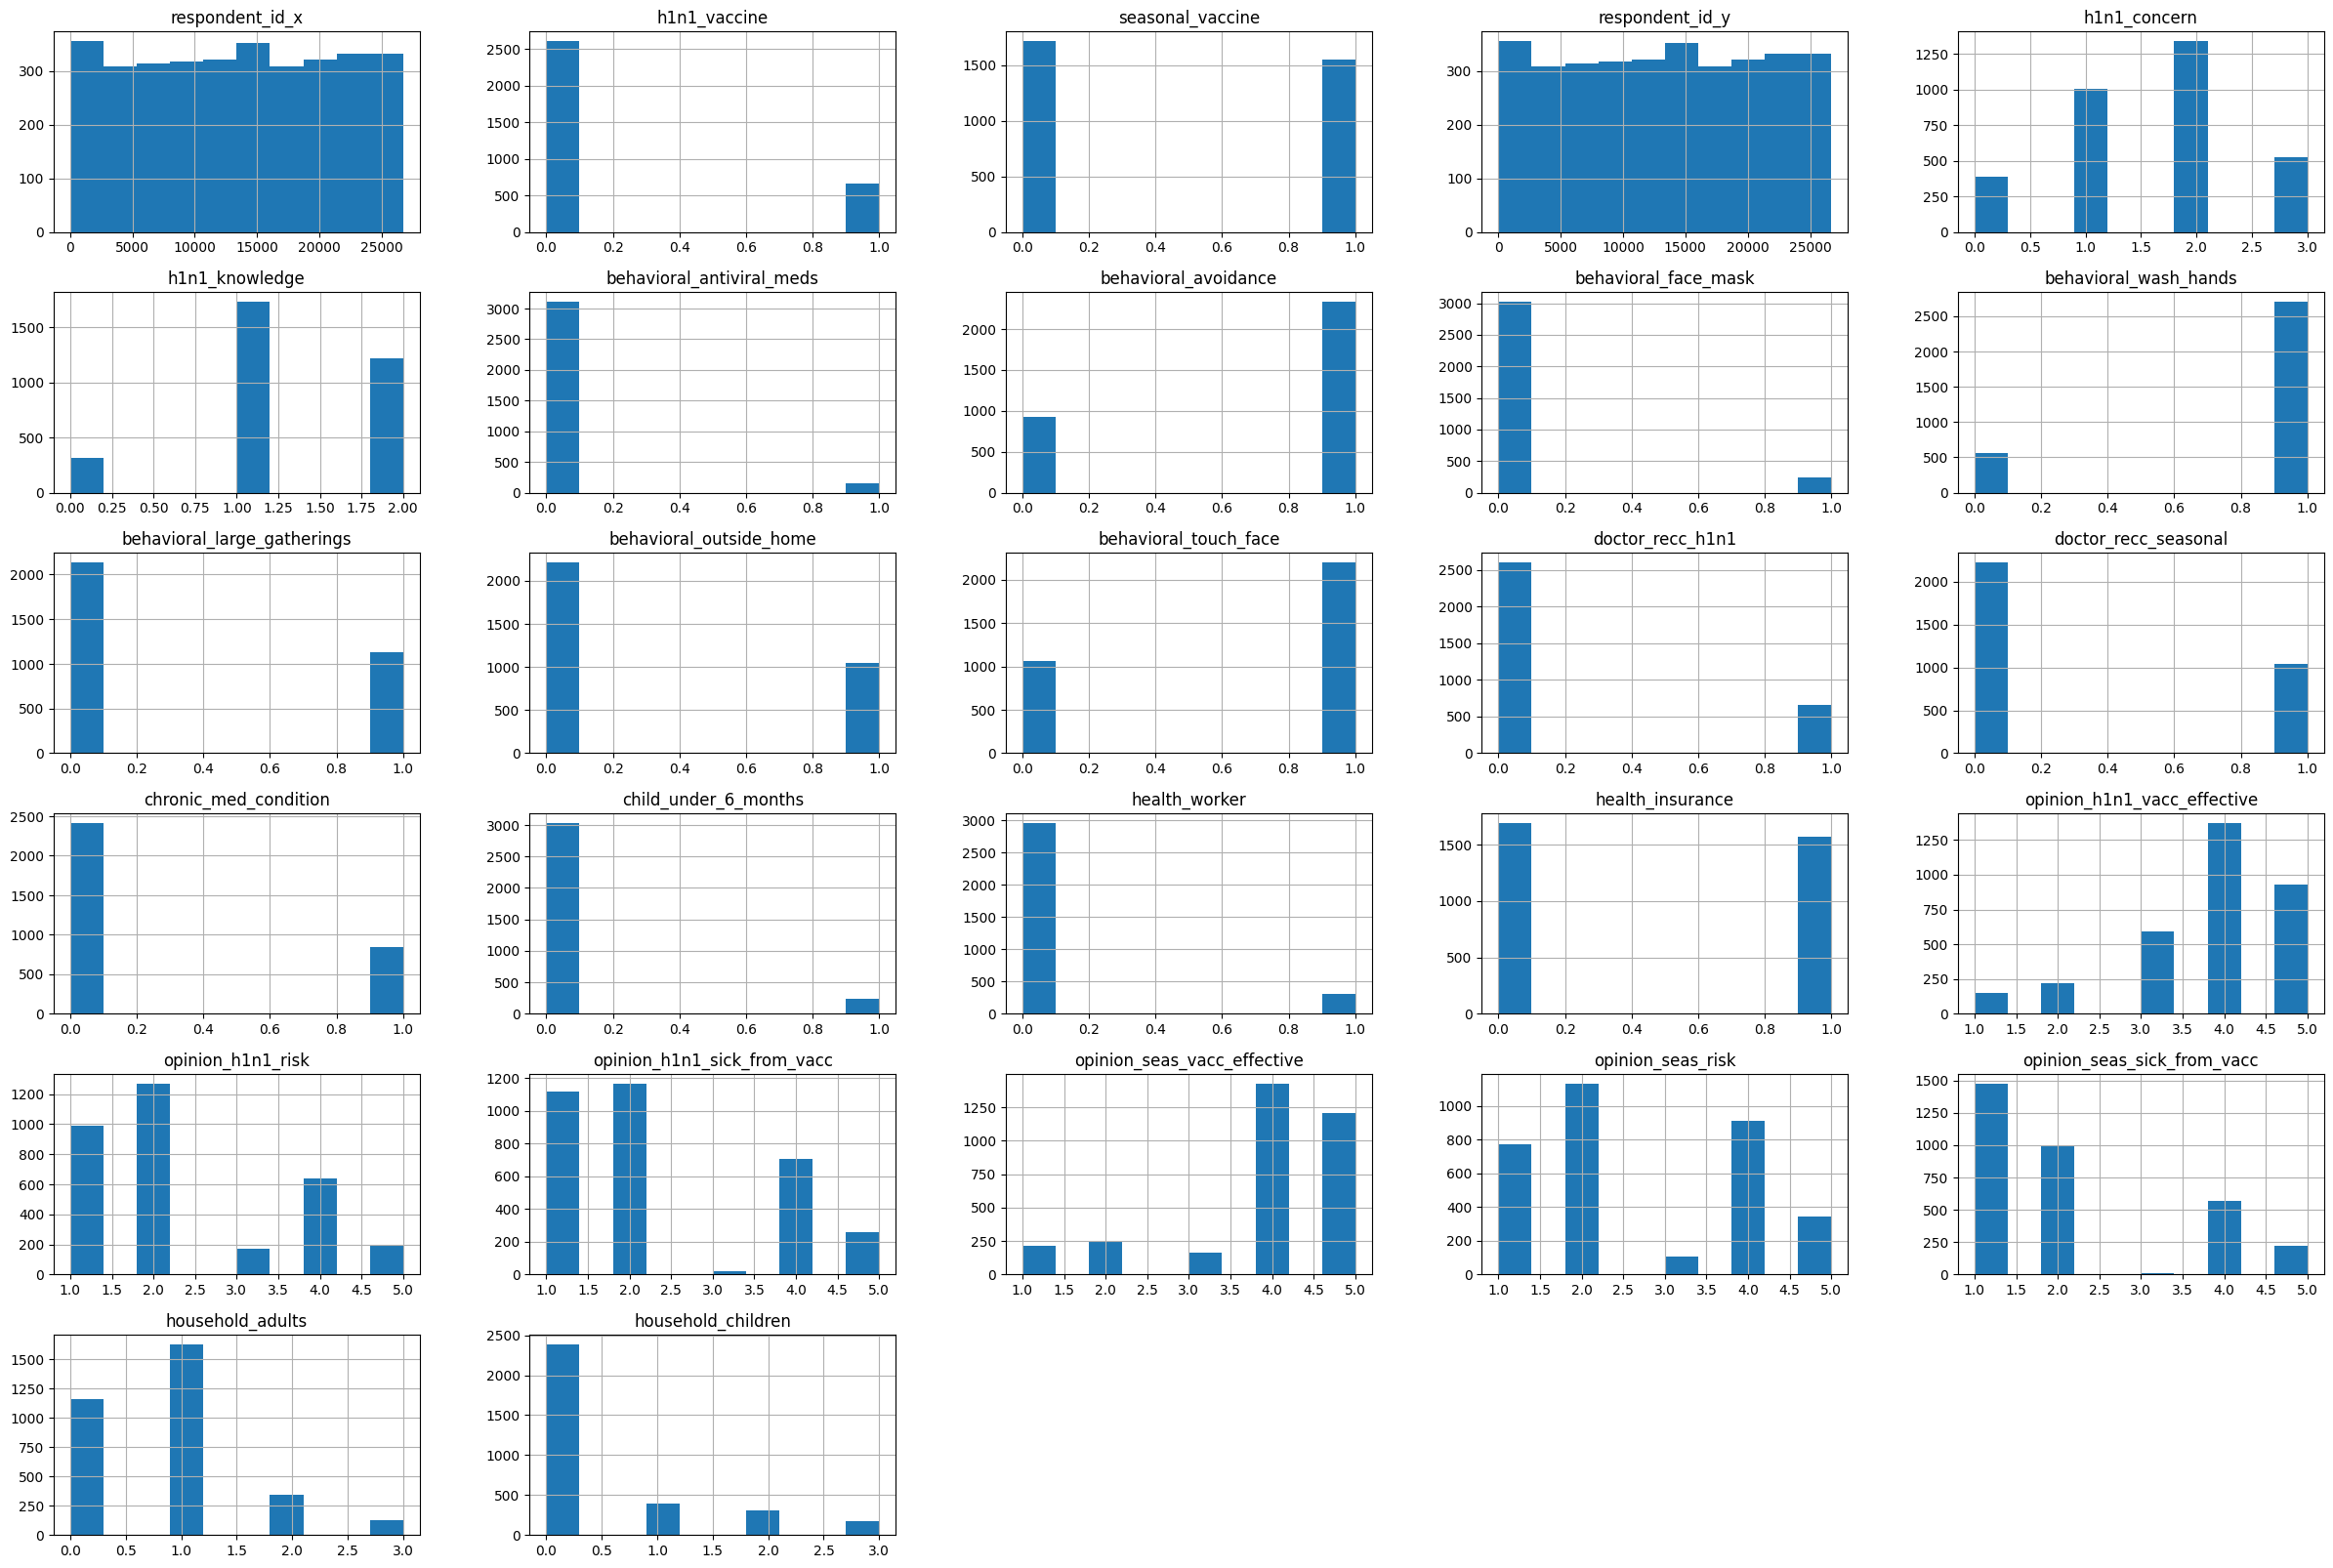

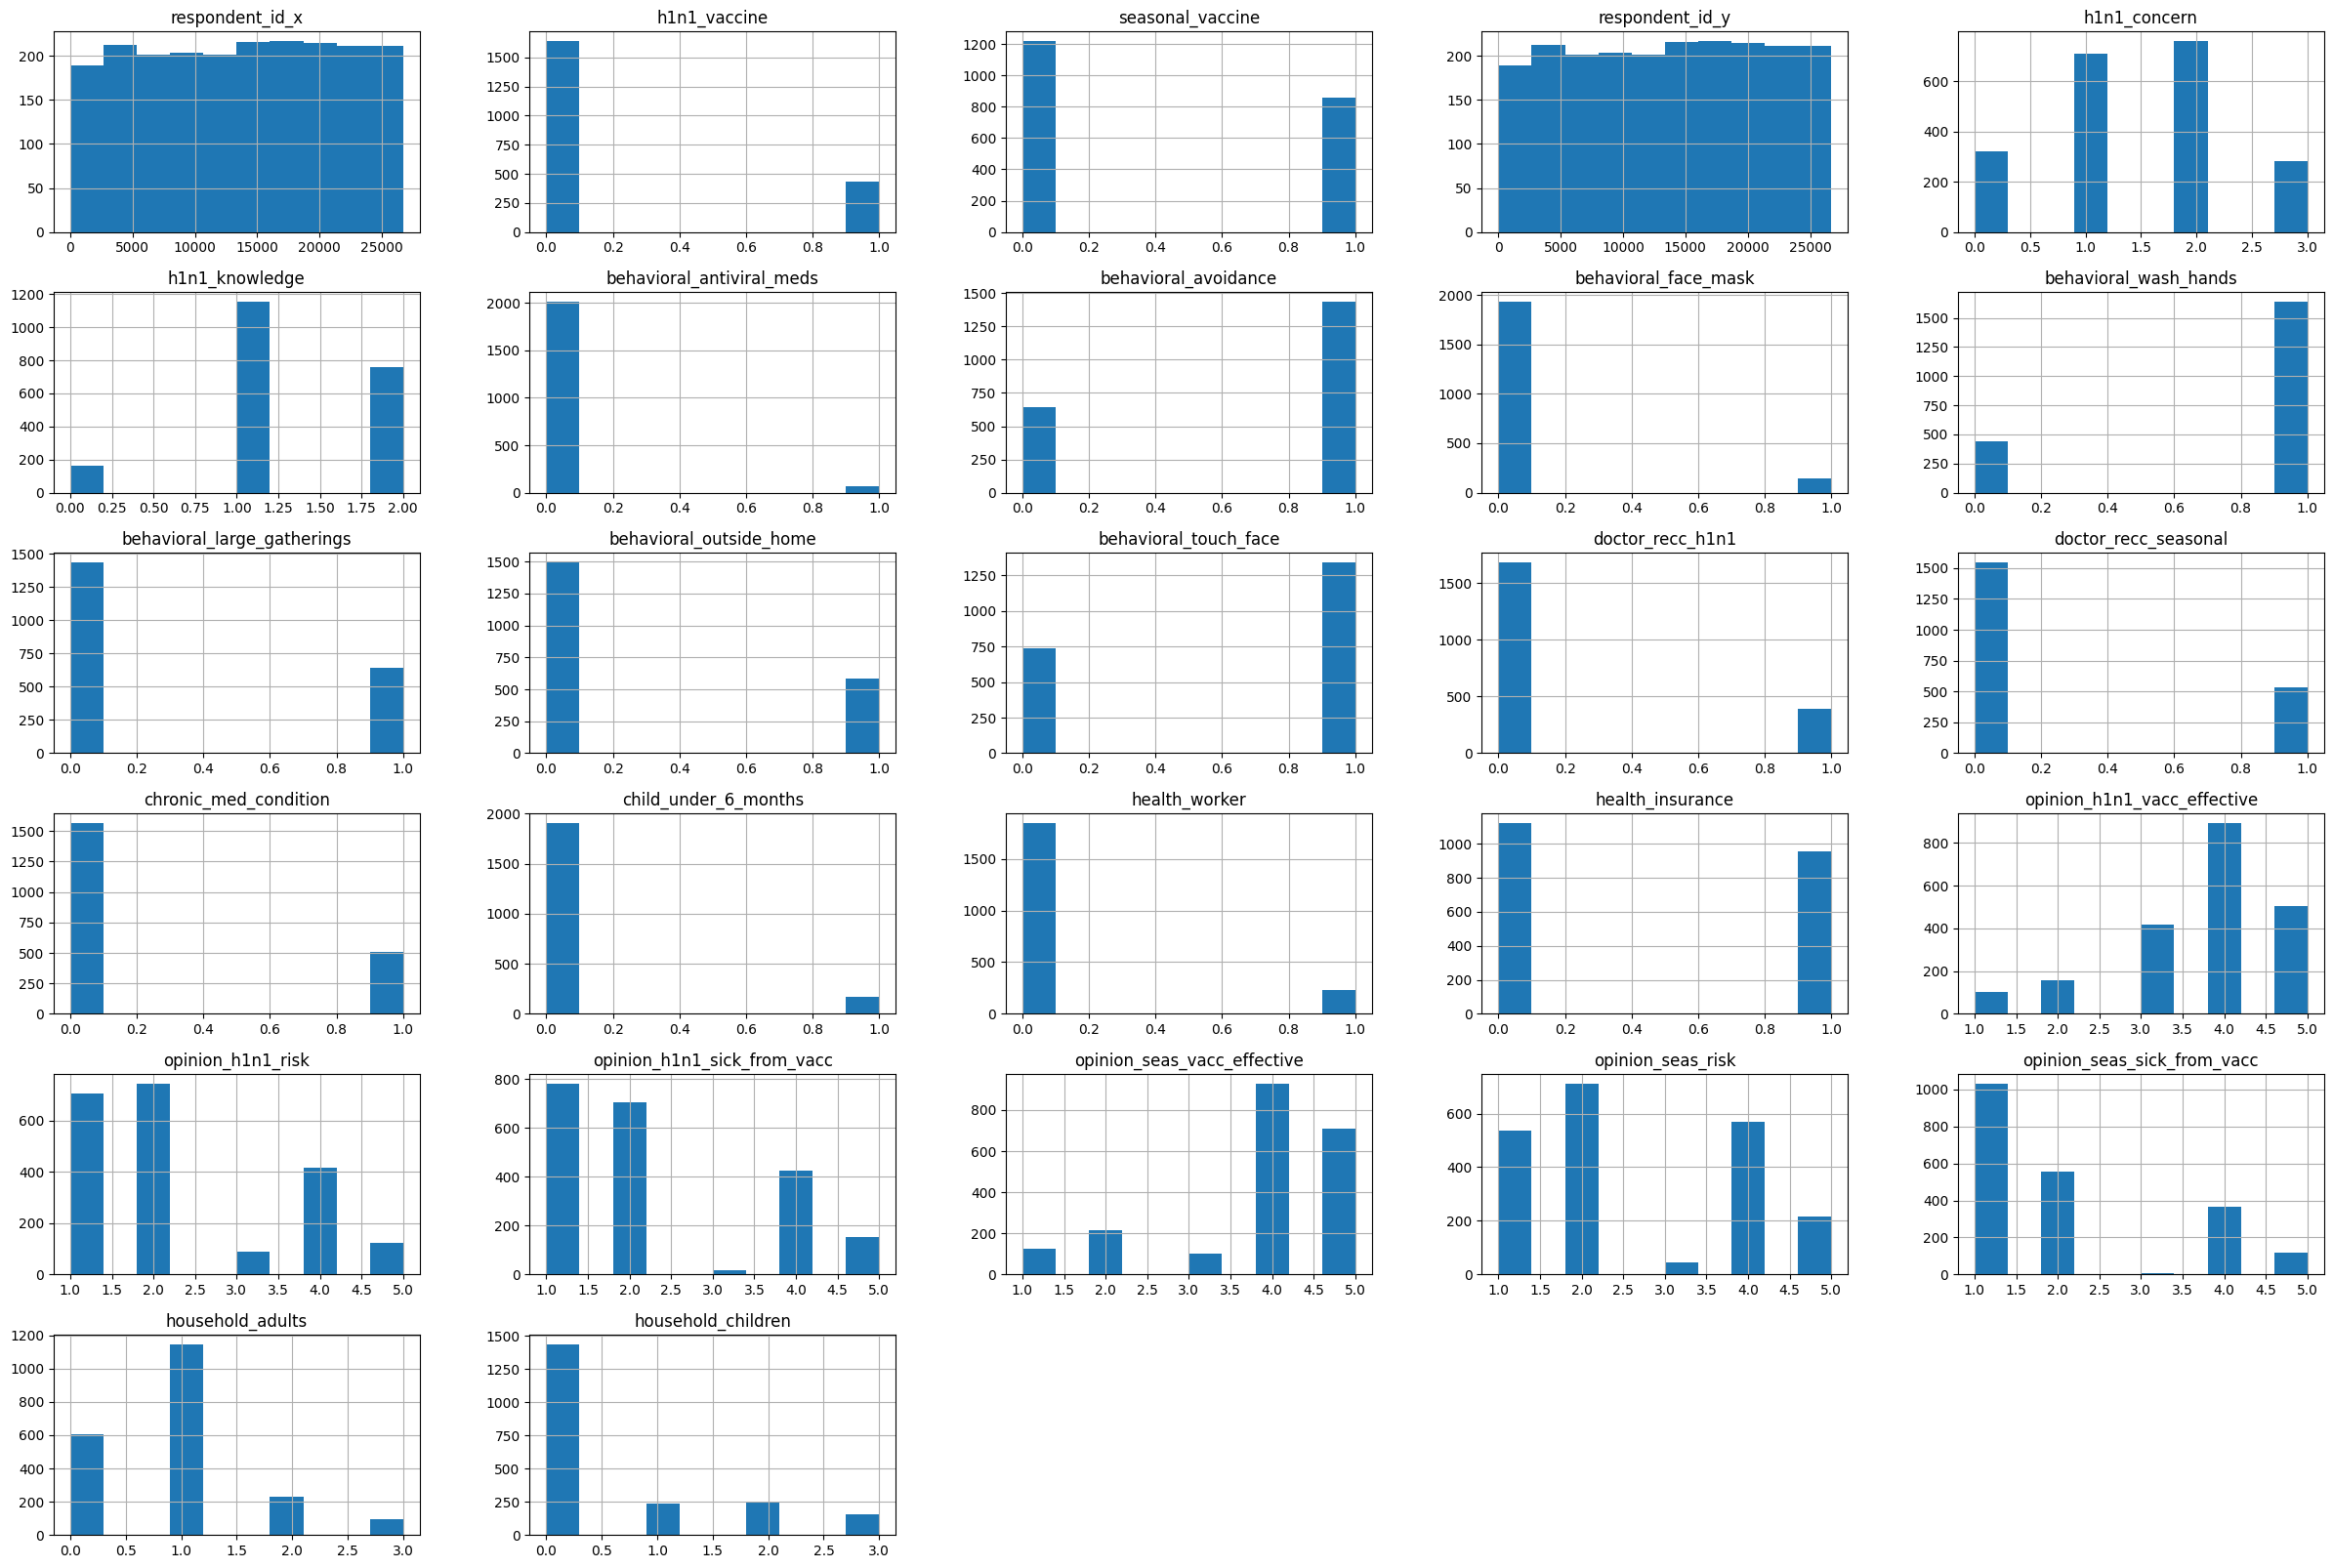

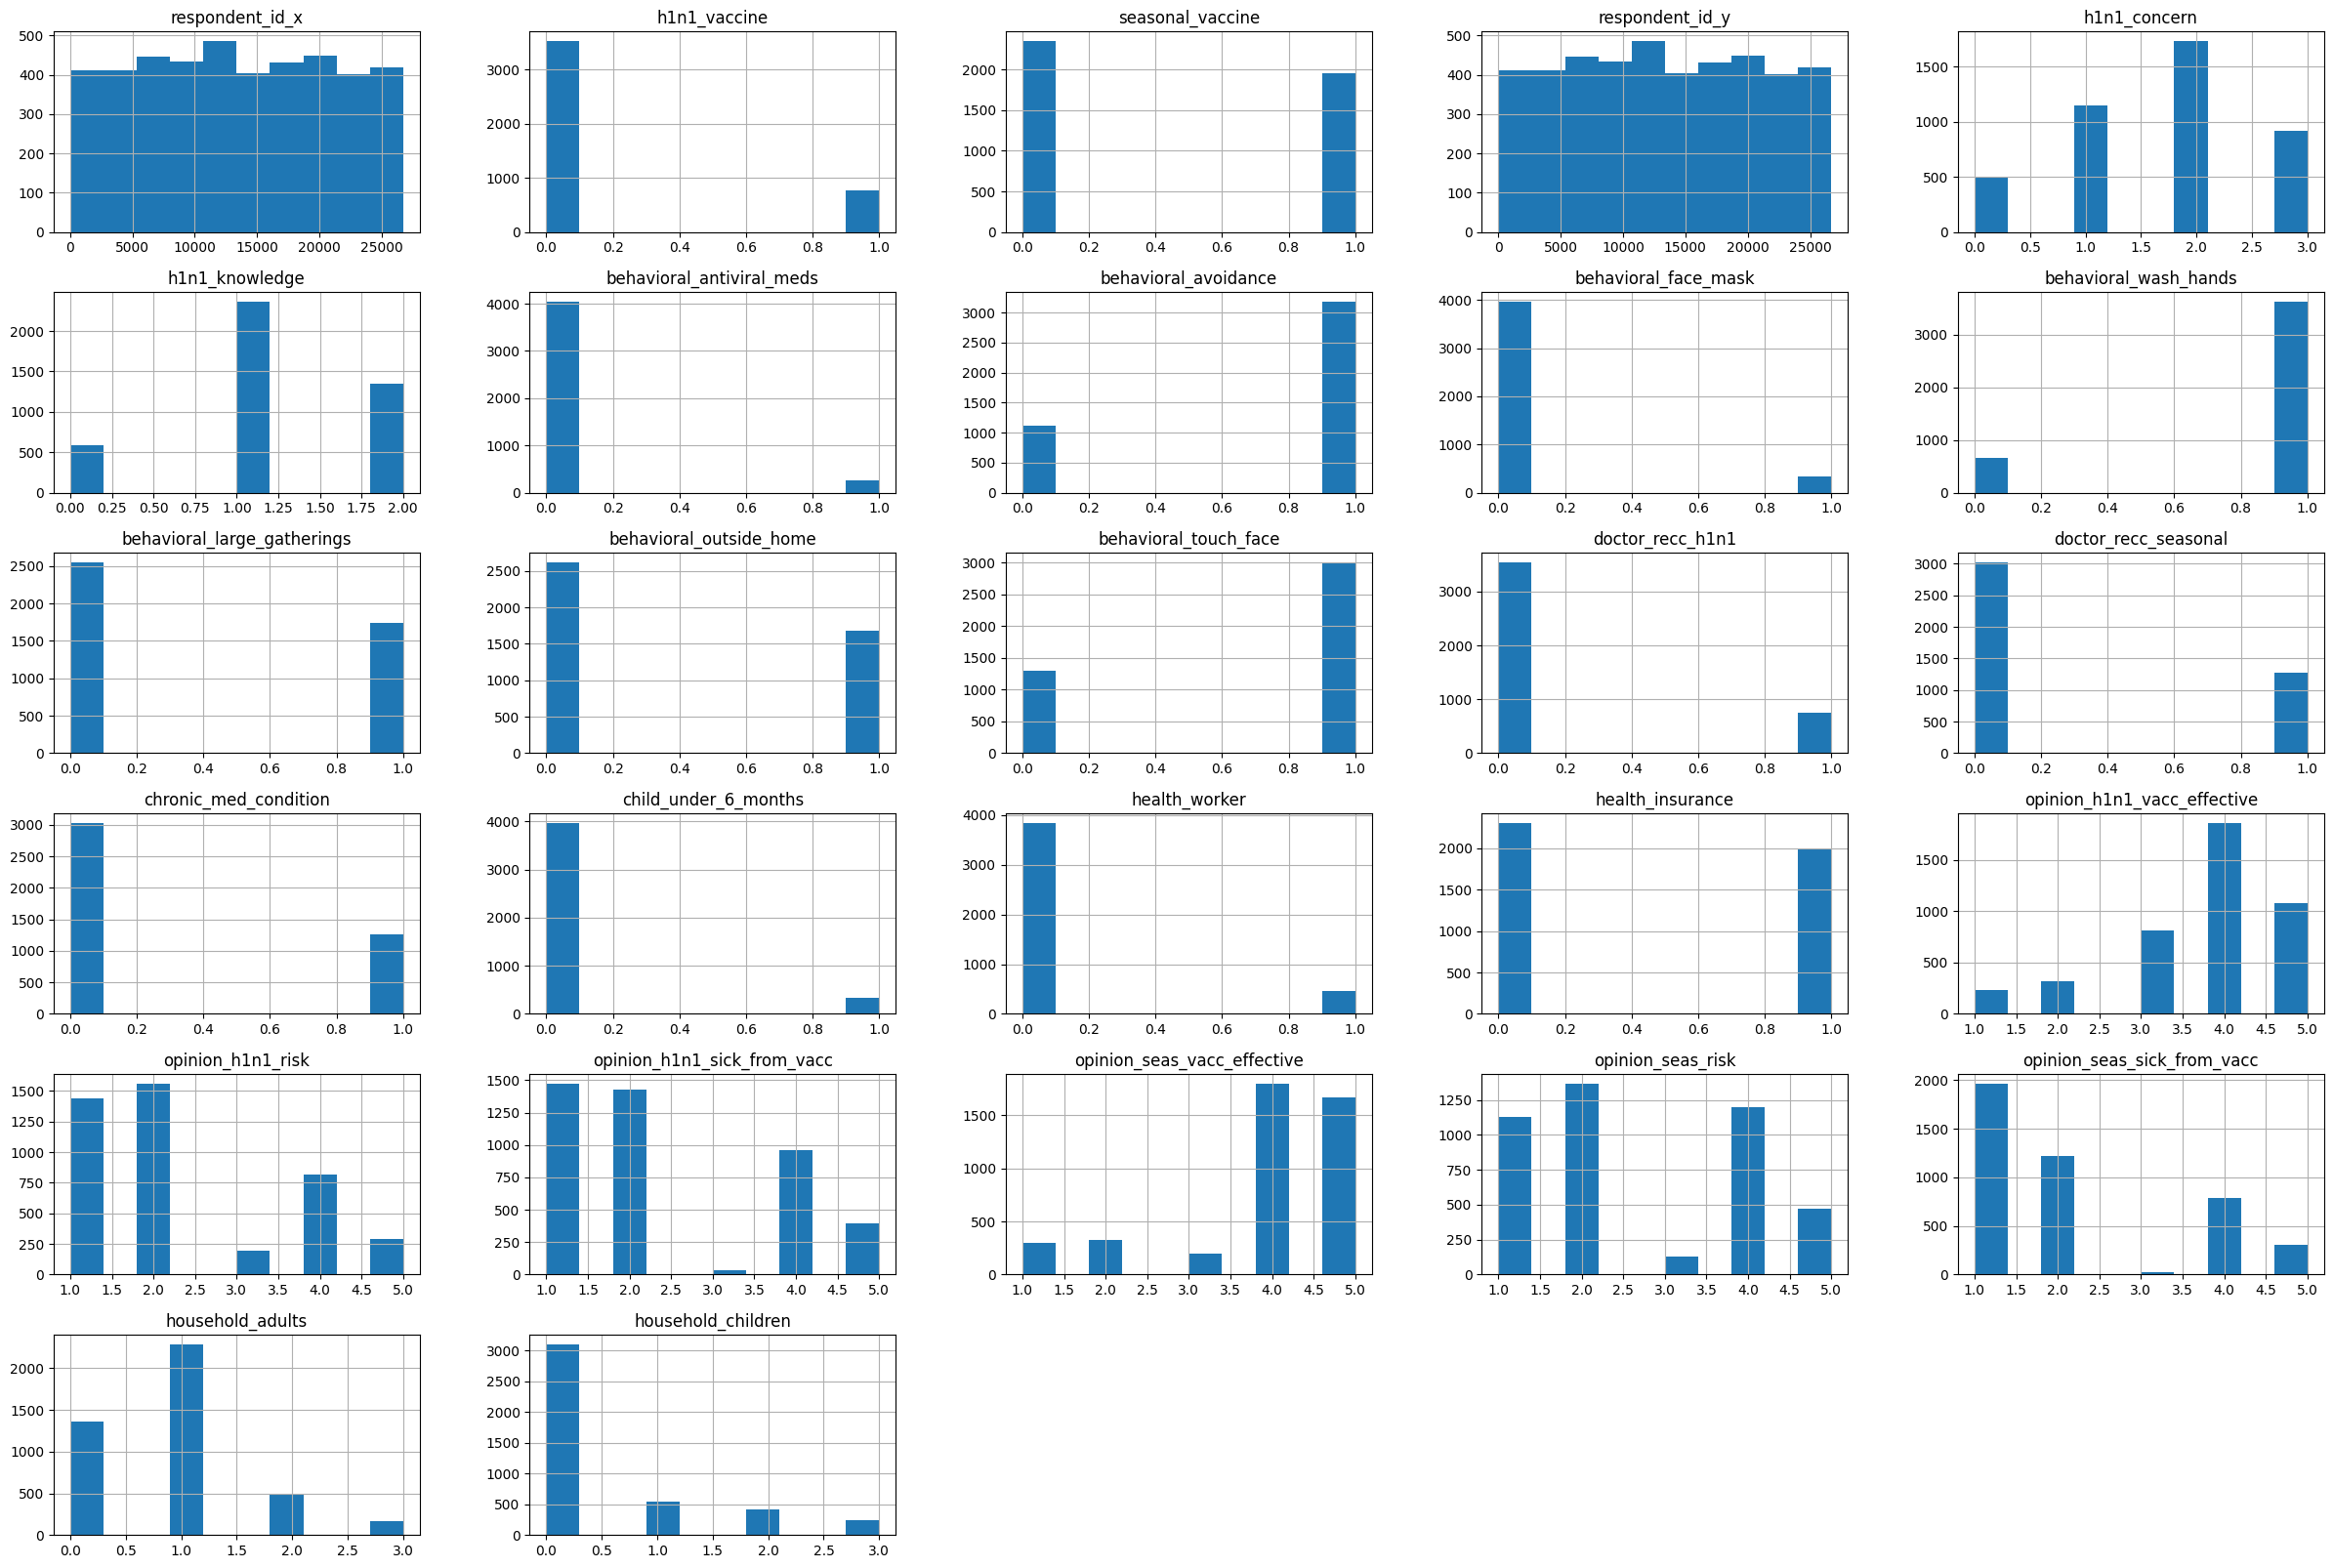

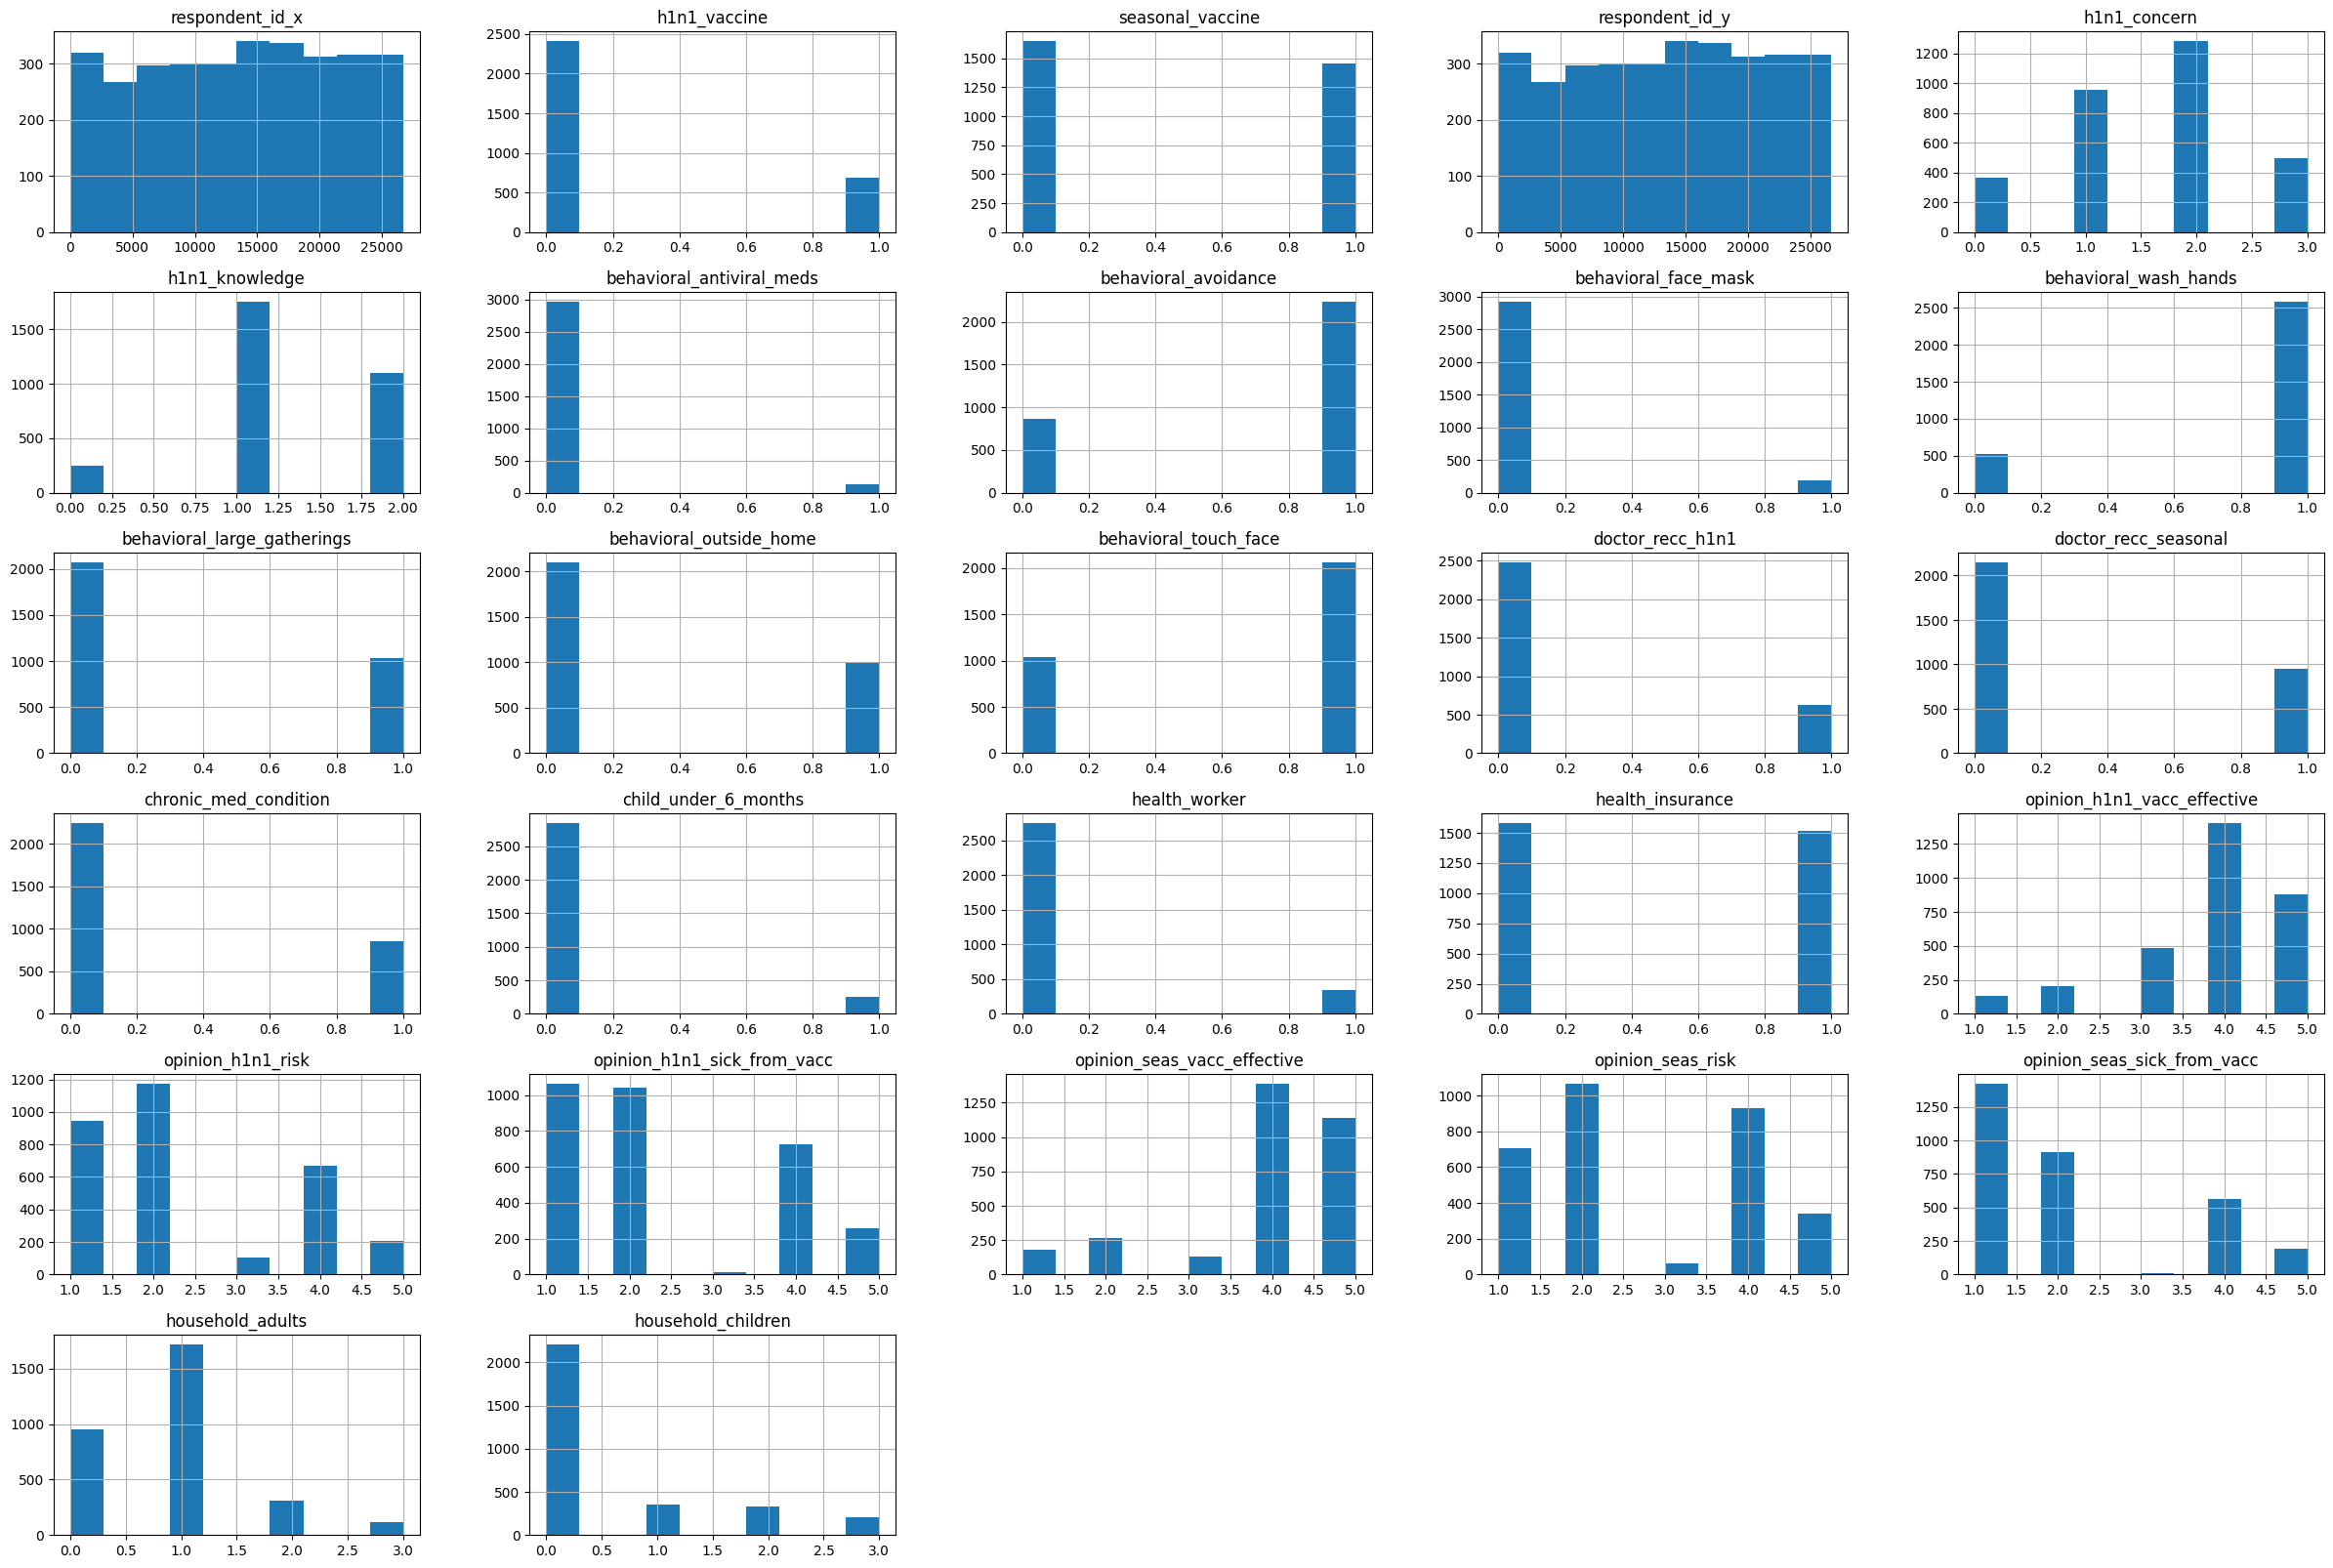

In [32]:
loc_.hist(figsize=(30,20))
plt.show();

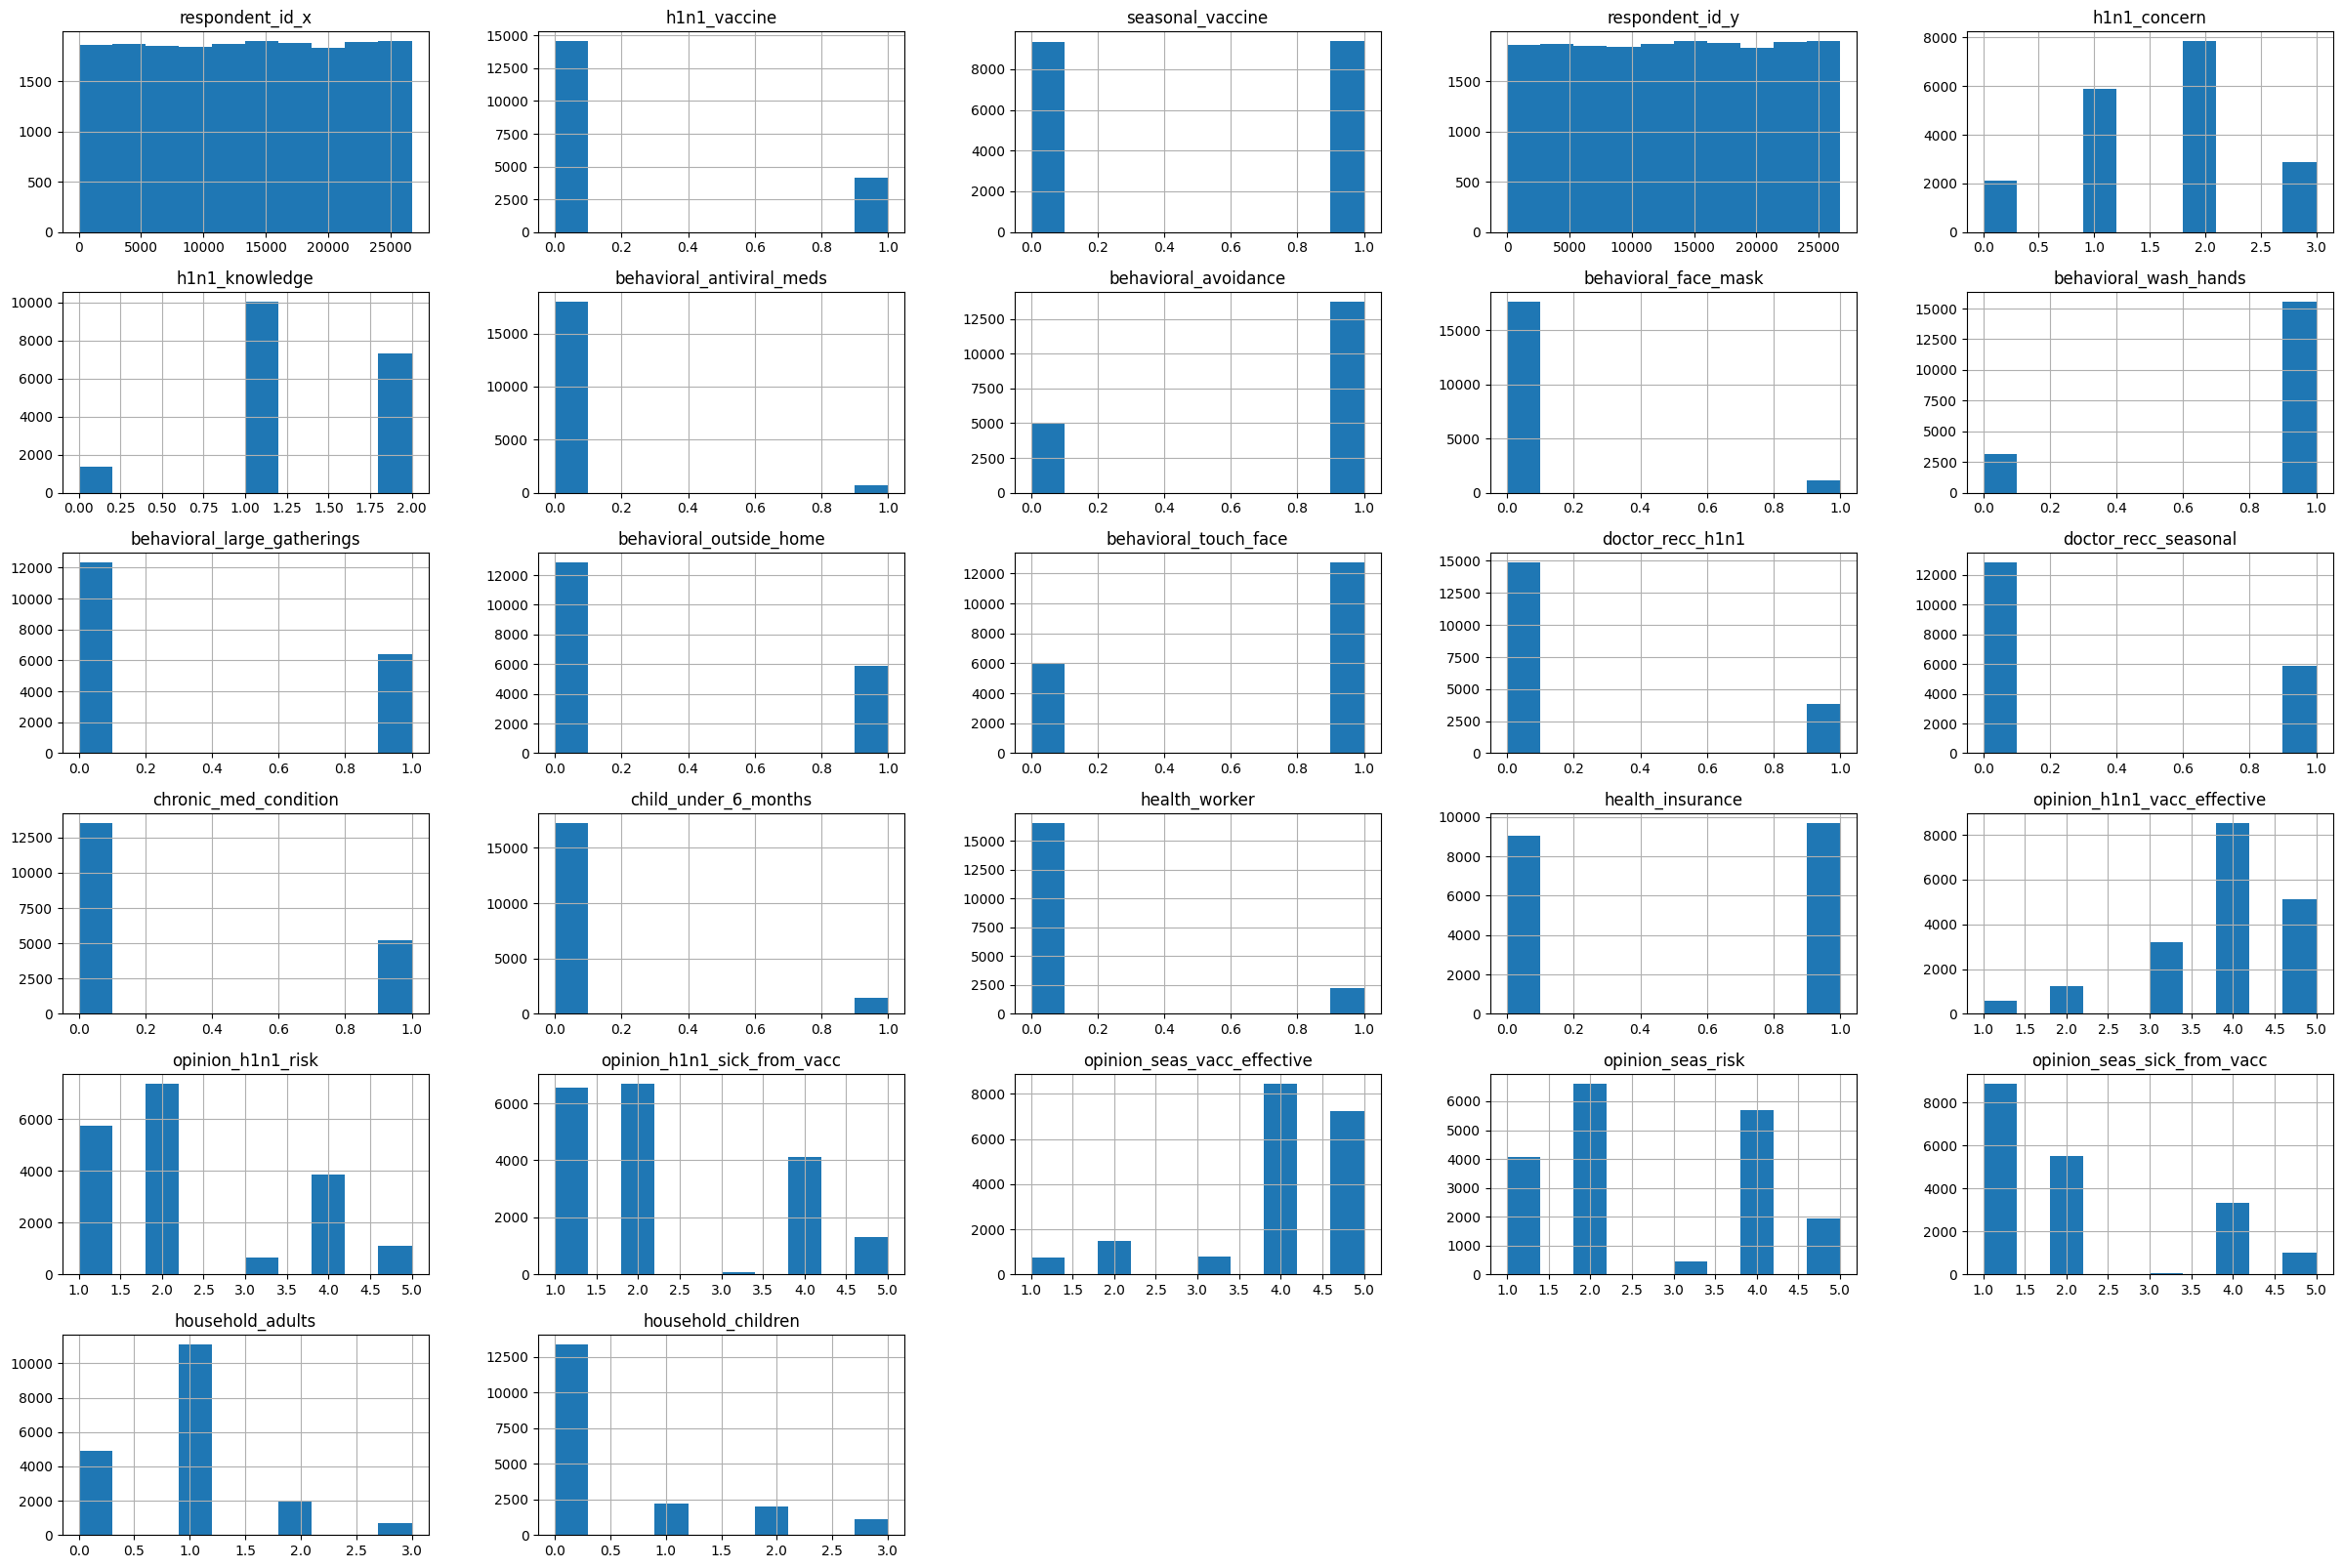

In [33]:
home.hist(figsize=(30,20))
plt.show();

<AxesSubplot: title={'center': 'Count of females and males'}>

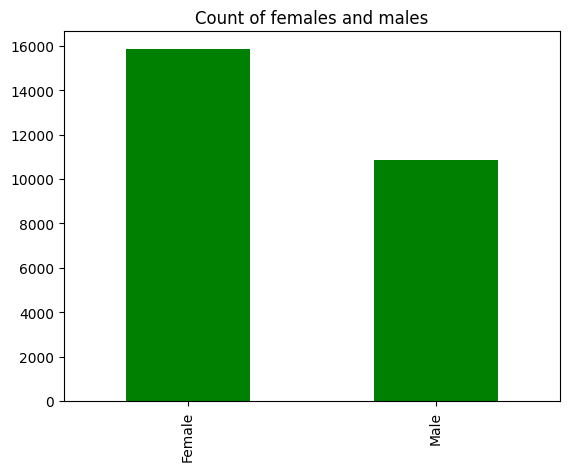

In [34]:
sex_plot = df['sex'].value_counts().plot(kind='bar', color = "green", title = 'Count of females and males')
sex_plot

<AxesSubplot: title={'center': 'Gender and the H1n1 Vaccine'}, xlabel='sex,h1n1_vaccine'>

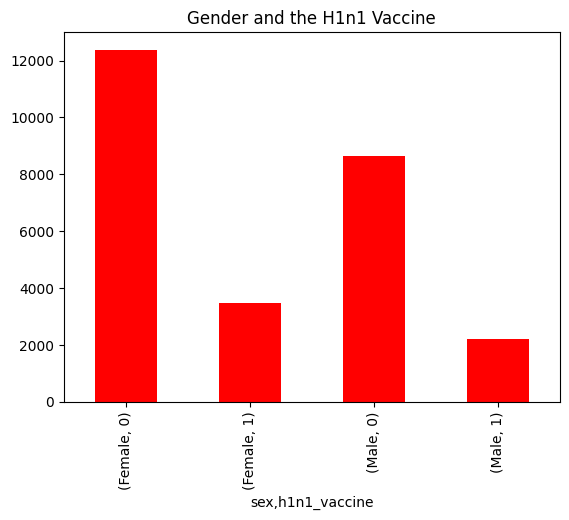

In [35]:
sex_vaccine = sex['h1n1_vaccine'].value_counts().plot(kind='bar', color = "red", title = 'Gender and the H1n1 Vaccine')
sex_vaccine

In [36]:
sex['seasonal_vaccine'].value_counts().plot(kind='bar', color = "red", title = 'Gender and the seasonal flu vaccine')

<AxesSubplot: title={'center': 'Gender and the seasonal flu vaccine'}, xlabel='sex,seasonal_vaccine'>

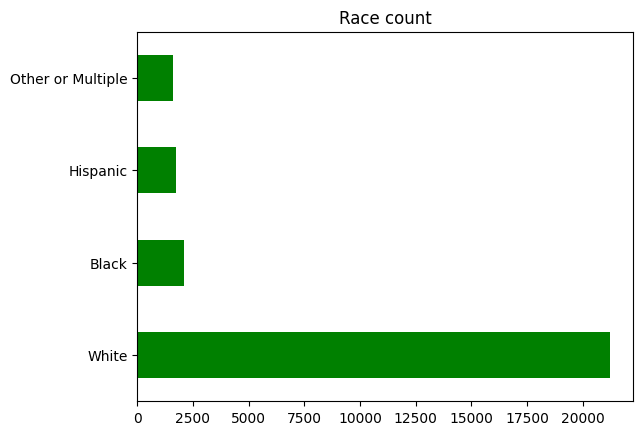

In [37]:
race_plot = df['race'].value_counts().plot(kind='barh', color = 'green', title = 'Race count')

<AxesSubplot: title={'center': 'Race and the H1N1 vaccine'}, ylabel='race,h1n1_vaccine'>

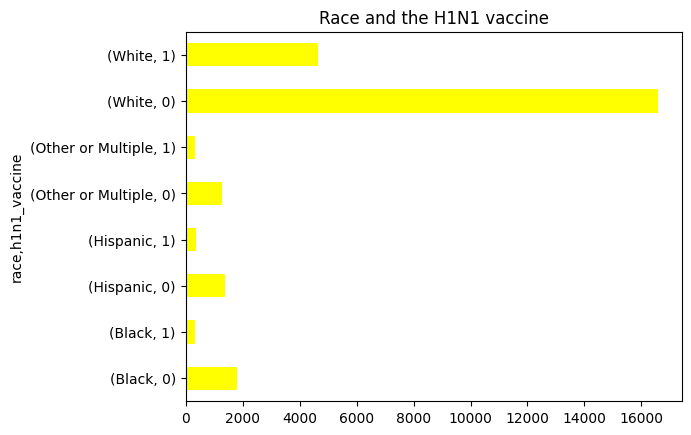

In [38]:
race['h1n1_vaccine'].value_counts().plot(kind='barh', color = "yellow", title = 'Race and the H1N1 vaccine')

<AxesSubplot: title={'center': 'Race and the seasonal flu vaccine'}, ylabel='race,seasonal_vaccine'>

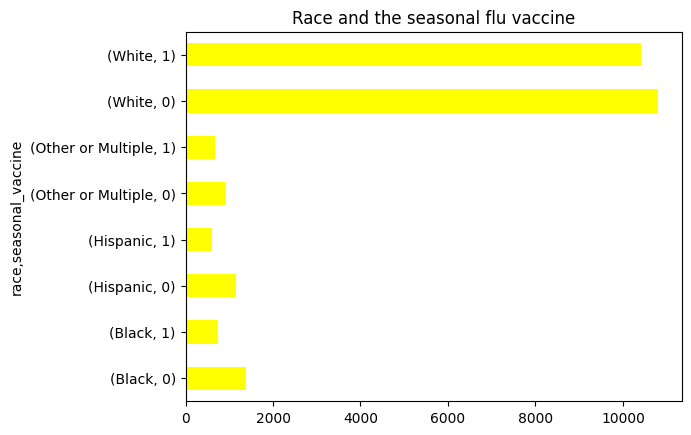

In [39]:
race['seasonal_vaccine'].value_counts().plot(kind='barh', color = "yellow", title = 'Race and the seasonal flu vaccine')

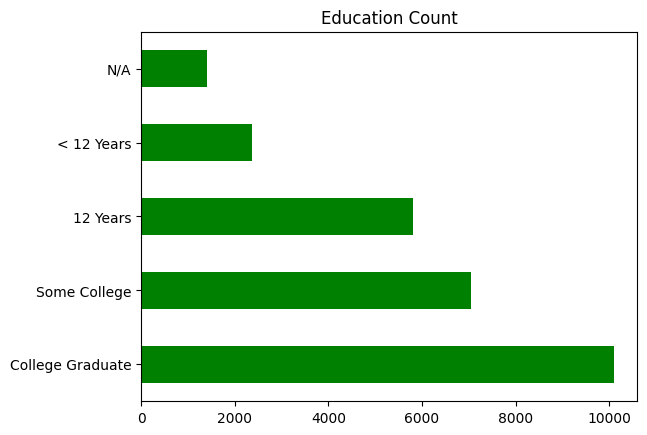

In [40]:
educ_plot = df['education'].value_counts().plot(kind='barh', color = 'green', title = 'Education Count')

<AxesSubplot: title={'center': 'Education and the H1N1 vaccine'}, ylabel='education,h1n1_vaccine'>

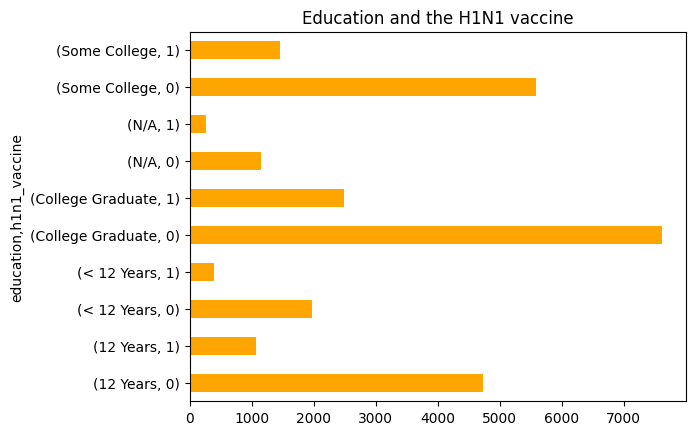

In [41]:
educ['h1n1_vaccine'].value_counts().plot(kind='barh', color = "orange", title='Education and the H1N1 vaccine')

<AxesSubplot: title={'center': 'Education and the seasonal flu vaccine'}, ylabel='education,seasonal_vaccine'>

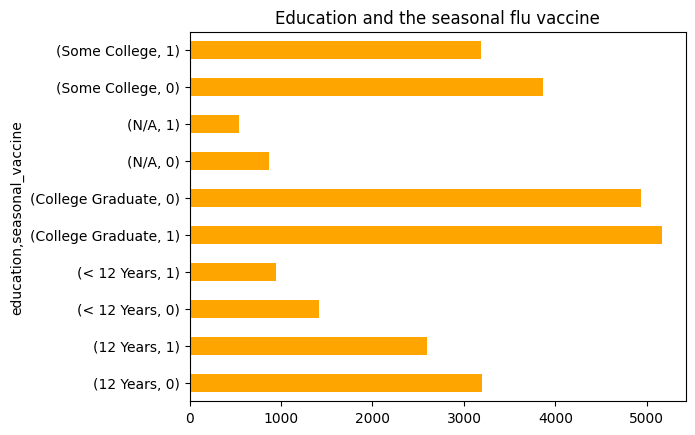

In [42]:
educ['seasonal_vaccine'].value_counts().plot(kind='barh', color = "orange", title = "Education and the seasonal flu vaccine")

In [43]:
loc_plot = df['hhs_geo_region'].value_counts().plot(kind='barh', color = 'green', title = 'Geo Region count')

In [44]:
loc_['h1n1_vaccine'].value_counts().plot(kind='barh', color = "black", title = "Geo Region and the H1n1 vaccine")

<AxesSubplot: title={'center': 'Geo Region and the H1n1 vaccine'}, ylabel='hhs_geo_region,h1n1_vaccine'>

<AxesSubplot: title={'center': 'Geo region and the seasonal flu vaccine'}, ylabel='hhs_geo_region,seasonal_vaccine'>

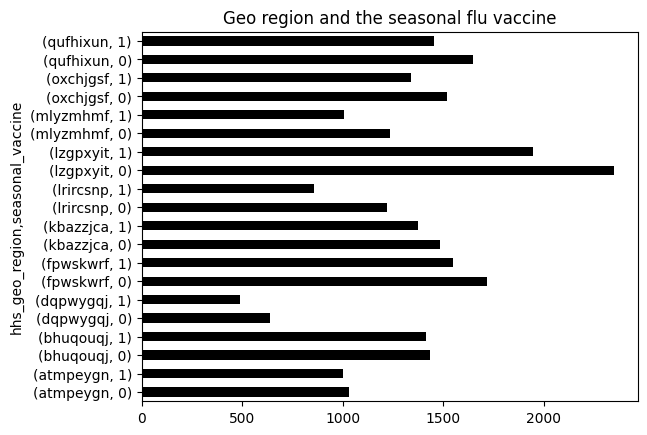

In [45]:
loc_['seasonal_vaccine'].value_counts().plot(kind='barh', color = "black", title = "Geo region and the seasonal flu vaccine")

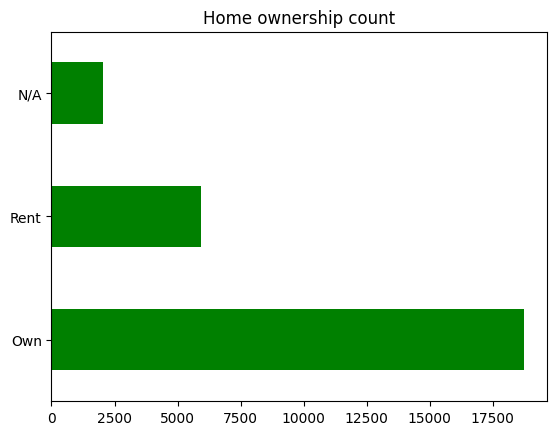

In [46]:
home_plot = df['rent_or_own'].value_counts().plot(kind='barh', color = 'green', title = 'Home ownership count')

<AxesSubplot: title={'center': 'Home ownership and the H1n1 vaccine'}, ylabel='rent_or_own,h1n1_vaccine'>

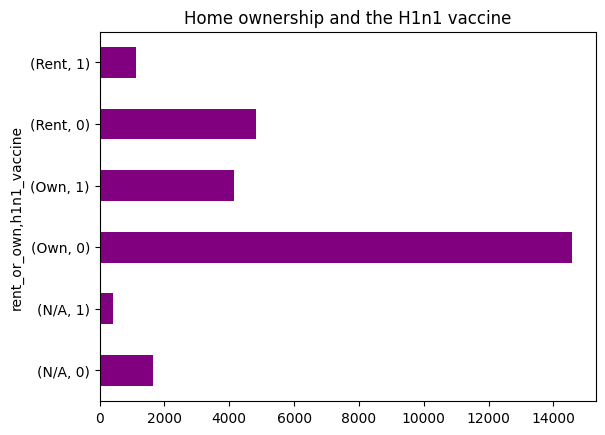

In [47]:
home['h1n1_vaccine'].value_counts().plot(kind='barh', color = "purple", title = "Home ownership and the H1n1 vaccine")

<AxesSubplot: title={'center': 'Home ownership and the seasonal flu vaccine'}, ylabel='rent_or_own,seasonal_vaccine'>

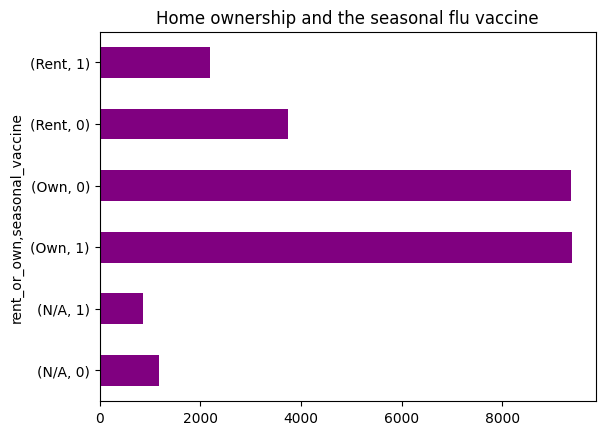

In [48]:
home['seasonal_vaccine'].value_counts().plot(kind='barh', color = "purple", title = "Home ownership and the seasonal flu vaccine")

In [49]:
#grouping by h1n1 vaccine
h1n1_vaccine = df.groupby('h1n1_vaccine')

#grouping by seasonal vaccine

seasonal_vaccine = df.groupby('seasonal_vaccine')

<AxesSubplot: title={'center': 'Opinion on the effectiveness of the H1N1 vaccine'}, ylabel='h1n1_vaccine,opinion_h1n1_vacc_effective'>

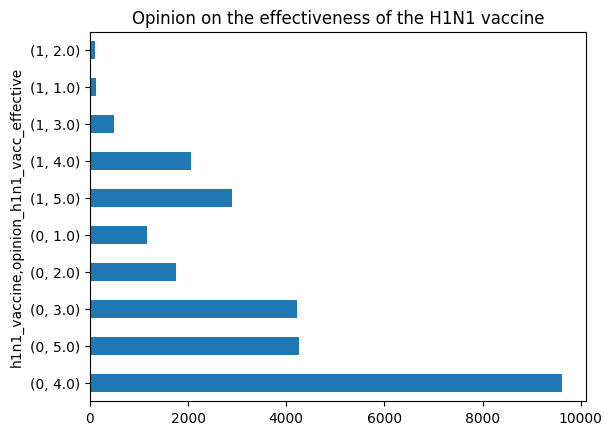

In [50]:
h1n1_vaccine['opinion_h1n1_vacc_effective'].value_counts().plot(kind='barh', title = 'Opinion on the effectiveness of the H1N1 vaccine')

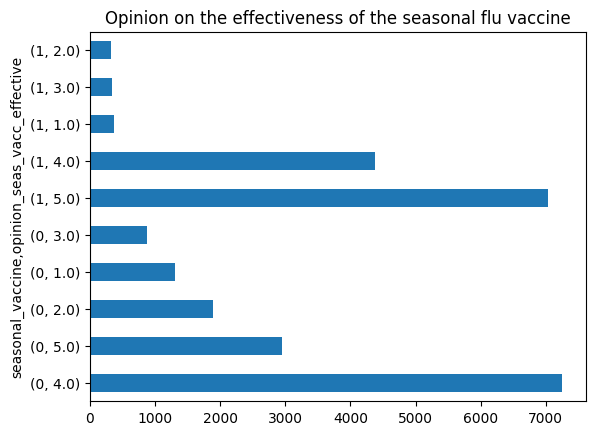

In [51]:
seasonal_vaccine['opinion_seas_vacc_effective'].value_counts().plot(kind='barh', title = 'Opinion on the effectiveness of the seasonal flu vaccine')
title = 'Opinion of season vaccine '

<AxesSubplot: title={'center': 'Count of Chronic illments and H1N1 vaccine'}, ylabel='h1n1_vaccine,chronic_med_condition'>

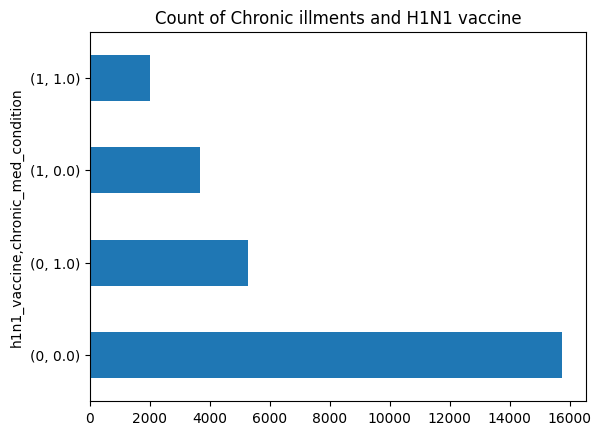

In [52]:
h1n1_vaccine['chronic_med_condition'].value_counts().plot(kind='barh', title = 'Count of Chronic illments and H1N1 vaccine')

<AxesSubplot: title={'center': 'Count of Chronic illments and seasonal flu vaccine'}, ylabel='seasonal_vaccine,chronic_med_condition'>

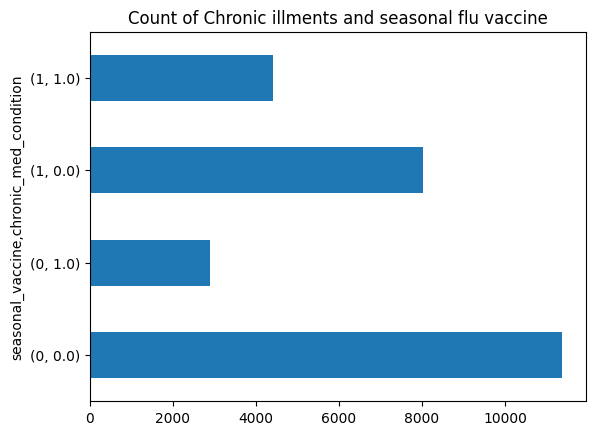

In [53]:
seasonal_vaccine['chronic_med_condition'].value_counts().plot(kind='barh',  title = 'Count of Chronic illments and seasonal flu vaccine')

<AxesSubplot: title={'center': 'Children under 6 months and H1N1 vaccine'}, xlabel='h1n1_vaccine,child_under_6_months'>

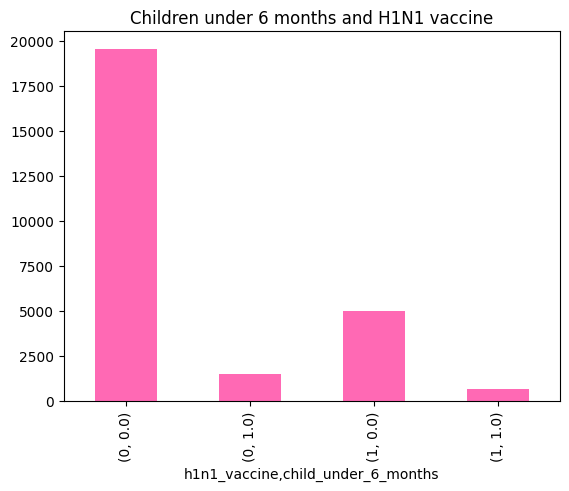

In [54]:
h1n1_vaccine['child_under_6_months'].value_counts().plot(kind='bar', title = 'Children under 6 months and H1N1 vaccine', color = 'hotpink')

<AxesSubplot: title={'center': 'Children under 6 months and seasonal vaccine'}, xlabel='seasonal_vaccine,child_under_6_months'>

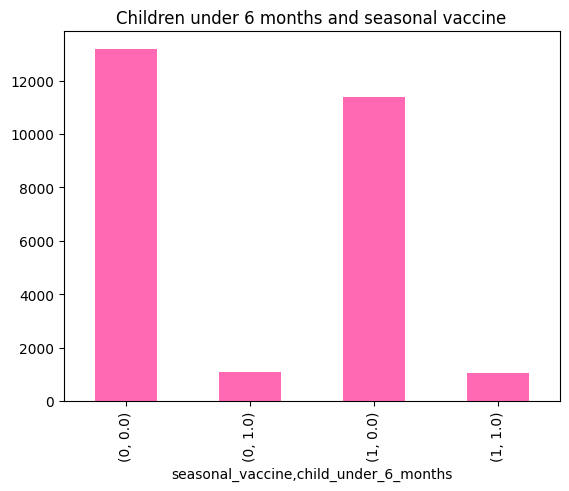

In [55]:
seasonal_vaccine['child_under_6_months'].value_counts().plot(kind='bar', color = 'hotpink', title = 'Children under 6 months and seasonal vaccine')

<AxesSubplot: title={'center': 'Age groups and H1N1 vaccine'}, ylabel='h1n1_vaccine,age_group'>

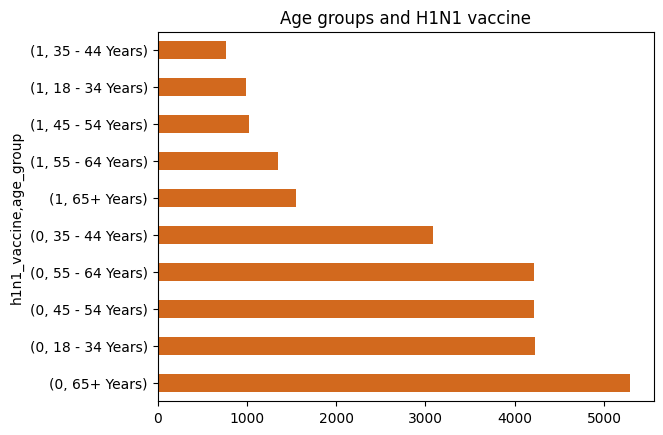

In [56]:
h1n1_vaccine['age_group'].value_counts().plot(kind='barh', color = 'chocolate', title = 'Age groups and H1N1 vaccine')

<AxesSubplot: title={'center': 'Age groups and seasonal flu vaccine'}, ylabel='seasonal_vaccine,age_group'>

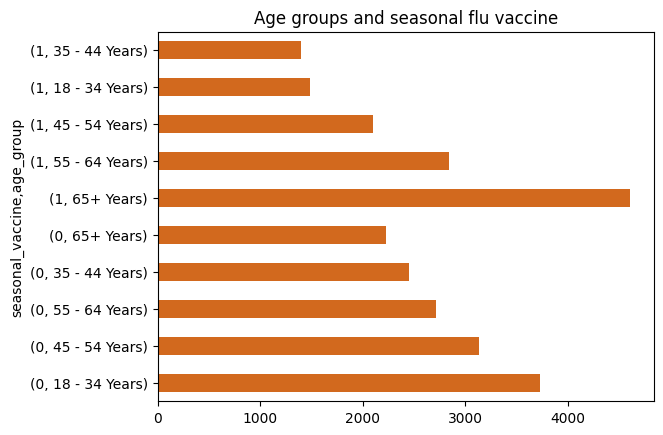

In [57]:
seasonal_vaccine['age_group'].value_counts().plot(kind='barh', color = 'chocolate', title = 'Age groups and seasonal flu vaccine')

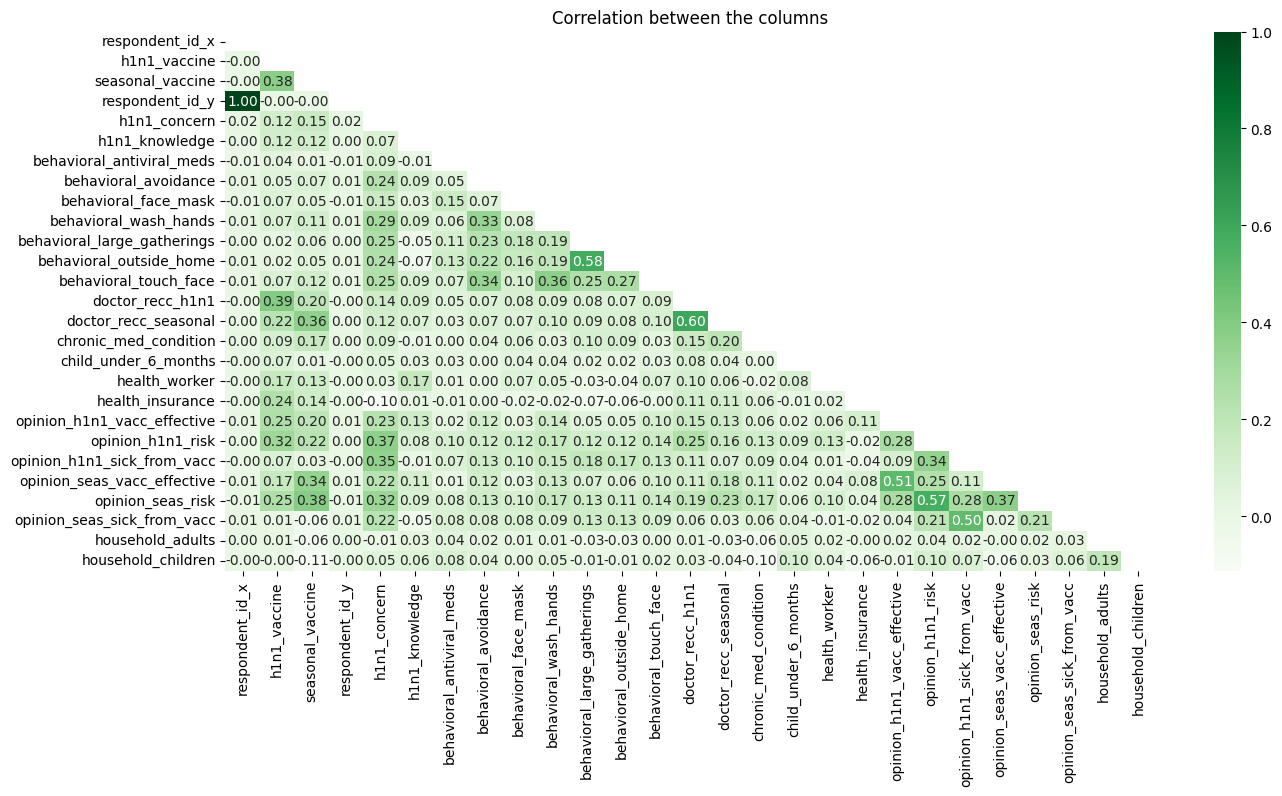

In [58]:
#correlation heatmap
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot=True,cmap="Greens",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

# Modelling

### Splitting of the data

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(training_features, training_labels, random_state=42, test_size=0.3)

In [60]:
#checking the data types of the training features dataset
training_features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [61]:
numeric_cols = training_features.columns[training_features.dtypes != "object"].values
print(numeric_cols)

['respondent_id' 'h1n1_concern' 'h1n1_knowledge'
 'behavioral_antiviral_meds' 'behavioral_avoidance' 'behavioral_face_mask'
 'behavioral_wash_hands' 'behavioral_large_gatherings'
 'behavioral_outside_home' 'behavioral_touch_face' 'doctor_recc_h1n1'
 'doctor_recc_seasonal' 'chronic_med_condition' 'child_under_6_months'
 'health_worker' 'health_insurance' 'opinion_h1n1_vacc_effective'
 'opinion_h1n1_risk' 'opinion_h1n1_sick_from_vacc'
 'opinion_seas_vacc_effective' 'opinion_seas_risk'
 'opinion_seas_sick_from_vacc' 'household_adults' 'household_children']


In [62]:
non_numeric = training_features.columns[training_features.dtypes == 'object'].values
print(non_numeric)

['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa'
 'employment_industry' 'employment_occupation']


In [186]:
#scaling the numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_col = scaler.fit_transform(X_train[numeric_cols])
pd.DataFrame(numeric_col)

0         1         2         3         4         5         6   \
0     -1.041146  0.420941  1.192119 -0.226338 -1.596010 -0.273835  0.466914   
1     -1.377771  0.420941 -0.417057 -0.226338  0.626562 -0.273835  0.466914   
2     -0.875035  1.518593 -0.417057 -0.226338  0.626562 -0.273835  0.466914   
3      1.193521 -0.676711  1.192119 -0.226338 -1.596010 -0.273835 -2.141721   
4     -1.425028 -1.774364  1.192119 -0.226338  0.626562 -0.273835  0.466914   
...         ...       ...       ...       ...       ...       ...       ...   
18689  1.065604  0.420941 -0.417057 -0.226338 -1.596010 -0.273835  0.466914   
18690 -1.029882 -0.676711 -0.417057 -0.226338 -1.596010 -0.273835  0.466914   
18691 -1.616386  0.420941 -0.417057 -0.226338  0.626562 -0.273835 -2.141721   
18692  0.317262  0.420941 -0.417057 -0.226338  0.626562 -0.273835  0.466914   
18693  1.334774  1.518593 -0.417057 -0.226338 -1.596010 -0.273835  0.466914   

             7         8         9   ...        14        15        16  \
0     -0.743757 -0.713471 -1.426271  ... -0.352009 -0.948474  0.183283   
1      1.344526 -0.713471  0.701129  ... -0.352009 -0.948474  0.183283   
2     -0.743757 -0.713471  0.701129  ...  2.840837  1.054325  0.183283   
3     -0.743757 -0.713471 -1.426271  ...  2.840837  1.054325  1.127684   
4      1.344526  1.401598  0.701129  ... -0.352009  1.054325  1.127684   
...         ...       ...       ...  ...       ...       ...       ...   
18689 -0.743757 -0.713471  0.701129  ... -0.352009  1.054325  0.183283   
18690 -0.743757 -0.713471  0.701129  ... -0.352009 -0.948474  0.183283   
18691 -0.743757 -0.713471  0.701129  ... -0.352009 -0.948474  0.183283   
18692 -0.743757 -0.713471  0.701129  ...  2.840837  1.054325 -2.649921   
18693 -0.743757  1.401598  0.701129  ... -0.352009  1.054325  0.183283   

             17        18        19        20        21        22        23  
0     -1.033346 -0.254705  0.894464 -0.498624 -0.073125  0.163581 -0.573022  
1     -0.257049  1.209230 -1.734504  1.656253 -0.824221  0.163581 -0.573022  
2     -0.257049  1.209230  0.894464  0.937960  2.180165  1.496035 -0.573022  
3     -0.257049  1.209230  0.894464 -0.498624  1.429068  0.163581  1.584277  
4      1.295544  1.209230  0.894464  0.937960 -0.824221 -1.168874 -0.573022  
...         ...       ...       ...       ...       ...       ...       ...  
18689 -0.257049 -0.254705  0.018141 -0.498624 -0.824221 -1.168874 -0.573022  
18690 -0.257049 -0.986672  0.018141 -0.498624  1.429068 -1.168874 -0.573022  
18691 -0.257049 -0.254705  0.018141 -0.498624 -0.073125  0.163581 -0.573022  
18692 -1.033346  1.209230 -2.610827 -1.216916  1.429068  0.163581 -0.573022  
18693 -0.257049  1.209230  0.894464 -0.498624 -0.073125 -1.168874 -0.573022  

[18694 rows x 24 columns]

In [187]:
#Encoding the non numeric data types
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
non_numeric_col = ordinal.fit_transform(X_train[non_numeric])
pd.DataFrame(non_numeric_col)

0    1    2    3    4    5    6    7    8    9     10    11
0      4.0  2.0  3.0  1.0  1.0  0.0  1.0  2.0  0.0  1.0   0.0   0.0
1      0.0  0.0  1.0  1.0  2.0  2.0  2.0  0.0  8.0  1.0   5.0  11.0
2      2.0  2.0  3.0  0.0  1.0  2.0  2.0  0.0  3.0  0.0   5.0   1.0
3      0.0  2.0  3.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  13.0   3.0
4      4.0  2.0  3.0  1.0  0.0  2.0  1.0  2.0  4.0  0.0   0.0   0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...
18689  3.0  4.0  3.0  1.0  1.0  2.0  1.0  2.0  9.0  1.0   0.0   0.0
18690  3.0  4.0  3.0  1.0  0.0  2.0  1.0  3.0  7.0  1.0   0.0   0.0
18691  3.0  0.0  3.0  0.0  0.0  0.0  1.0  0.0  9.0  2.0   2.0  21.0
18692  1.0  2.0  0.0  0.0  1.0  0.0  1.0  0.0  4.0  1.0   5.0   3.0
18693  0.0  0.0  0.0  1.0  0.0  2.0  2.0  0.0  3.0  0.0  13.0  18.0

[18694 rows x 12 columns]

In [65]:
X_train[non_numeric] = non_numeric_col
X_train[numeric_cols] = numeric_col

X_train.head()

respondent_id  h1n1_concern  h1n1_knowledge  \
respondent_id                                                
5303               -1.041146      0.420941        1.192119   
2703               -1.377771      0.420941       -0.417057   
6586               -0.875035      1.518593       -0.417057   
22563               1.193521     -0.676711        1.192119   
2338               -1.425028     -1.774364        1.192119   

               behavioral_antiviral_meds  behavioral_avoidance  \
respondent_id                                                    
5303                           -0.226338             -1.596010   
2703                           -0.226338              0.626562   
6586                           -0.226338              0.626562   
22563                          -0.226338             -1.596010   
2338                           -0.226338              0.626562   

               behavioral_face_mask  behavioral_wash_hands  \
respondent_id                                                
5303                      -0.273835               0.466914   
2703                      -0.273835               0.466914   
6586                      -0.273835               0.466914   
22563                     -0.273835              -2.141721   
2338                      -0.273835               0.466914   

               behavioral_large_gatherings  behavioral_outside_home  \
respondent_id                                                         
5303                             -0.743757                -0.713471   
2703                              1.344526                -0.713471   
6586                             -0.743757                -0.713471   
22563                            -0.743757                -0.713471   
2338                              1.344526                 1.401598   

               behavioral_touch_face  ...  income_poverty  marital_status  \
respondent_id                         ...                                   
5303                       -1.426271  ...             1.0             0.0   
2703                        0.701129  ...             2.0             2.0   
6586                        0.701129  ...             1.0             2.0   
22563                      -1.426271  ...             1.0             0.0   
2338                        0.701129  ...             0.0             2.0   

               rent_or_own  employment_status  hhs_geo_region  census_msa  \
respondent_id                                                               
5303                   1.0                2.0             0.0         1.0   
2703                   2.0                0.0             8.0         1.0   
6586                   2.0                0.0             3.0         0.0   
22563                  1.0                0.0             0.0         1.0   
2338                   1.0                2.0             4.0         0.0   

               household_adults  household_children  employment_industry  \
respondent_id                                                              
5303                   0.163581           -0.573022                  0.0   
2703                   0.163581           -0.573022                  5.0   
6586                   1.496035           -0.573022                  5.0   
22563                  0.163581            1.584277                 13.0   
2338                  -1.168874           -0.573022                  0.0   

               employment_occupation  
respondent_id                         
5303                             0.0  
2703                            11.0  
6586                             1.0  
22563                            3.0  
2338                             0.0  

[5 rows x 36 columns]

In [66]:
numeric_col_test = scaler.fit_transform(X_test[numeric_cols])
numeric_col_test

array([[ 0.3125444 ,  0.43001437, -0.40368652, ..., -0.82534906,
        -1.15189427, -0.57091242],
       [-0.51659653,  1.51733061, -2.00504301, ..., -0.82534906,
         0.15623056,  0.51494593],
       [ 0.40933179, -0.65730187, -0.40368652, ..., -0.82534906,
        -1.15189427,  0.51494593],
       ...,
       [ 1.62718545, -1.7446181 , -2.00504301, ..., -0.82534906,
         1.46435539, -0.57091242],
       [-0.97682511,  1.51733061, -0.40368652, ..., -0.82534906,
         0.15623056, -0.57091242],
       [ 1.15445137,  1.51733061,  1.19766996, ..., -0.82534906,
         0.15623056, -0.57091242]])

In [67]:
non_numeric_col_test = ordinal.fit_transform(X_test[non_numeric])
non_numeric_col_test

array([[ 0.,  3.,  3., ...,  1.,  0.,  0.],
       [ 1.,  3.,  3., ...,  1.,  0.,  0.],
       [ 2.,  2.,  3., ...,  0.,  9., 11.],
       ...,
       [ 0.,  1.,  3., ...,  1.,  0.,  0.],
       [ 3.,  2.,  0., ...,  1.,  0.,  0.],
       [ 3.,  4.,  1., ...,  1.,  0.,  0.]])

In [68]:
X_test[non_numeric] = non_numeric_col_test
X_test[numeric_cols] = numeric_col_test

X_test.head()

respondent_id  h1n1_concern  h1n1_knowledge  \
respondent_id                                                
15772               0.312544      0.430014       -0.403687   
9407               -0.516597      1.517331       -2.005043   
16515               0.409332     -0.657302       -0.403687   
23353               1.300088      0.430014        1.197670   
10008              -0.438307     -0.657302        1.197670   

               behavioral_antiviral_meds  behavioral_avoidance  \
respondent_id                                                    
15772                          -0.226188              0.616928   
9407                           -0.226188              0.616928   
16515                          -0.226188              0.616928   
23353                          -0.226188              0.616928   
10008                          -0.226188              0.616928   

               behavioral_face_mask  behavioral_wash_hands  \
respondent_id                                                
15772                      3.731191               0.449322   
9407                       3.731191               0.449322   
16515                     -0.268011               0.449322   
23353                     -0.268011               0.449322   
10008                     -0.268011               0.449322   

               behavioral_large_gatherings  behavioral_outside_home  \
respondent_id                                                         
15772                             1.331775                 1.412627   
9407                              1.331775                 1.412627   
16515                             1.331775                 1.412627   
23353                            -0.750878                -0.707901   
10008                             1.331775                -0.707901   

               behavioral_touch_face  ...  income_poverty  marital_status  \
respondent_id                         ...                                   
15772                       0.682228  ...             3.0             1.0   
9407                       -1.465785  ...             3.0             1.0   
16515                       0.682228  ...             3.0             2.0   
23353                      -1.465785  ...             1.0             0.0   
10008                       0.682228  ...             1.0             0.0   

               rent_or_own  employment_status  hhs_geo_region  census_msa  \
respondent_id                                                               
15772                  0.0                1.0             0.0         1.0   
9407                   0.0                1.0             3.0         1.0   
16515                  1.0                0.0             0.0         0.0   
23353                  1.0                0.0             1.0         2.0   
10008                  1.0                0.0             5.0         1.0   

               household_adults  household_children  employment_industry  \
respondent_id                                                              
15772                 -1.151894           -0.570912                  0.0   
9407                   0.156231            0.514946                  0.0   
16515                 -1.151894            0.514946                  9.0   
23353                  0.156231            1.600804                  3.0   
10008                  0.156231           -0.570912                 19.0   

               employment_occupation  
respondent_id                         
15772                            0.0  
9407                             0.0  
16515                           11.0  
23353                           22.0  
10008                           22.0  

[5 rows x 36 columns]

## 1. Logistical Regression
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'> Documentation</a>

In [69]:
y_train_h1n1 = y_train.drop(columns=['respondent_id', 'seasonal_vaccine'])


In [70]:
y_test_h1n1 = y_test.drop(columns=['respondent_id', 'seasonal_vaccine'])

In [71]:
#importing the modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42, C=1e12)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train_h1n1, scoring='neg_log_loss', error_score='raise')

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.3648642320739851

In [72]:
#Calculating the accuracy of the model
baseline_model.fit(X_train, y_train_h1n1)
y_pred = baseline_model.predict(X_test)

log_acc = accuracy_score(y_pred, y_test_h1n1)
log_acc

0.8473730188443779

In [73]:
#calculating the precision

# Display the precision score

log_pre = precision_score(y_test_h1n1, y_pred)
log_pre

0.7093333333333334

In [74]:
# Display the recall score

log_rec = recall_score(y_test_h1n1, y_pred)
log_rec

0.47107438016528924

In [75]:
#modeling with the seasonal vaccine data
y_train_seas = y_train.drop(columns=['respondent_id', 'h1n1_vaccine'])
y_test_seas = y_test.drop(columns=['respondent_id', 'h1n1_vaccine'])

In [76]:
# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv2 = cross_val_score(baseline_model, X_train, y_train_seas, scoring='neg_log_loss', error_score='raise')

baseline_log_loss2 = -(baseline_neg_log_loss_cv2.mean())
baseline_log_loss2

0.488739054935707

In [77]:
#Calculating the accuracy of the model
baseline_model.fit(X_train, y_train_seas)
y_pred2 = baseline_model.predict(X_test)

log_acc2 = accuracy_score(y_pred2, y_test_seas)
log_acc2

0.7791089479595658

In [78]:
#calculating the precision

# Display the precision score
log_pre2 = precision_score(y_test_seas, y_pred2)
log_pre2

0.7699517182618574

In [79]:
# Display the recall score

log_rec2 = recall_score(y_test_seas, y_pred2)
log_rec2

0.7384908744211387

In [80]:
log_acc_final = (log_acc + log_acc2)/2
log_acc_final

0.8132409834019718

In [81]:
log_r_2_ = r2_score(y_test_h1n1, y_pred)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
log_mse = np.sqrt(mean_squared_error(y_test_h1n1, y_pred))
print(log_r_2_, log_mse)

0.0844968595116059 0.3906750326750125


In [82]:
log_r_2 = r2_score(y_test_seas, y_pred2)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
log_mse_ = np.sqrt(mean_squared_error(y_test_seas, y_pred2))
print(log_r_2, log_mse_)

0.11019630374437517 0.46999048079767985


## 2. K-Nearest Neighbours, (KNN)
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor'> Documentation</a>

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_h1n1)

knn_cross_val = cross_val_score(knn, X_train, y_train_h1n1, cv=3, scoring='accuracy')
print(knn_cross_val)

[0.7970154  0.80404429 0.79441502]


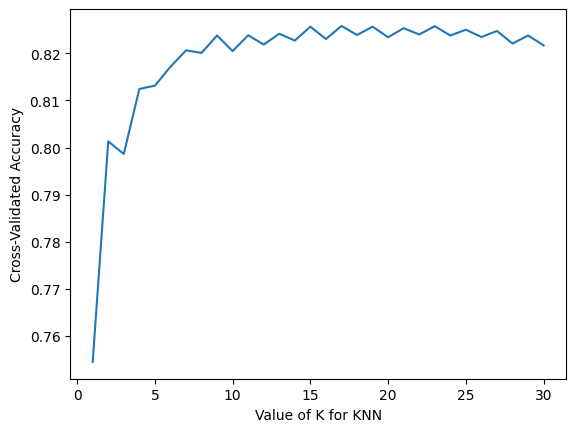

In [84]:
#Use cross val score for scoring(good for regression)
k_range = range(1, 31)
k_scores = []# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train_h1n1, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

The best value for the neighbours is about 9

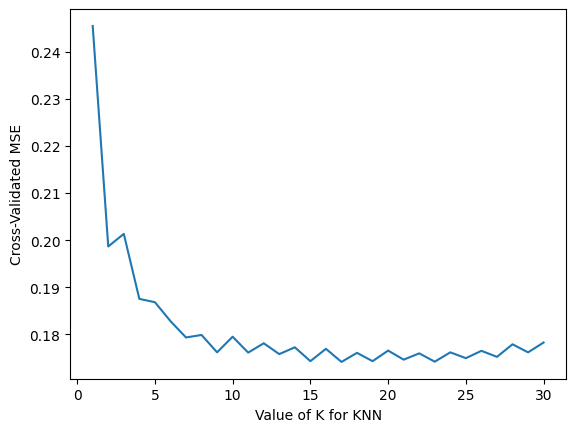

In [85]:
#Use neg_mean_squared_error for scoring(good for regression)
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(knn, X_train, y_train_h1n1, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

Also by using the best fit for k is around **9**

In [86]:
#best model
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=9)
knn1.fit(X_train, y_train_h1n1)

knn_cross_val1 = cross_val_score(knn, X_train, y_train_h1n1, cv=3, scoring='accuracy')
print(knn_cross_val1)

[0.82028241 0.81961162 0.82137699]


In [188]:
#Calculating the accuracy of the mode
knn1.fit(X_train, y_train_h1n1)
y_pred_knn = knn1.predict(X_test)

knn_acc = accuracy_score(y_pred_knn, y_test_h1n1)
knn_acc

0.8217895919131412

In [88]:
#calculating the precision

# Display the precision score
knn_pre = precision_score(y_test_h1n1, y_pred_knn)
knn_pre

0.6583333333333333

In [89]:
# Display the recall score

knn_rec = recall_score(y_test_h1n1, y_pred_knn)
knn_rec

0.32644628099173556

In [90]:
#Calculating the accuracy of the model
knn1.fit(X_train, y_train_seas)
y_pred_knn2 = knn1.predict(X_test)

knn_acc2 = accuracy_score(y_pred_knn2, y_test_seas)
knn_acc2

0.7231998003244727

In [91]:
#calculating the precision

# Display the precision score
knn_pre2 = precision_score(y_test_seas, y_pred_knn2)
knn_pre2

0.7072753209700428

In [92]:
# Display the recall score

knn_rec2 = recall_score(y_test_seas, y_pred_knn2)
knn_rec2

0.6752928357395805

In [189]:
acc_knn = (knn_acc + knn_acc2)/2
acc_knn

0.772494696118807

In [94]:
knn_r_2_ = r2_score(y_test_h1n1, y_pred_knn)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
knn_mse = np.sqrt(mean_squared_error(y_test_h1n1, y_pred_knn))
print(knn_r_2_, knn_mse)

-0.06896033084008724 0.42214974604618544


In [95]:
knn_r_2 = r2_score(y_test_seas, y_pred_knn2)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
knn_mse_ = np.sqrt(mean_squared_error(y_test_seas, y_pred_knn2))
print(knn_r_2, knn_mse_)

-0.1150195470593085 0.5261180472817173


## 3. Decision Tree
<a href = ''>Documentation</a>

In [96]:
# importing the function 
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error

# Instantiate DecisionTreeRegressor 
# Set random_state=45
clf = DecisionTreeClassifier(random_state=45)

# Fit the model to training data
clf.fit(X_train, y_train_h1n1)

# Make predictions on the test data
y_pred_tree = clf.predict(X_test)

r_2 = r2_score(y_test_h1n1, y_pred_tree)
mse_ = np.sqrt(mean_squared_error(y_test_h1n1, y_pred_tree))
print(r_2, mse_)

-0.3743775682229693 0.47867281888597674


#### Hyperparameter tuning

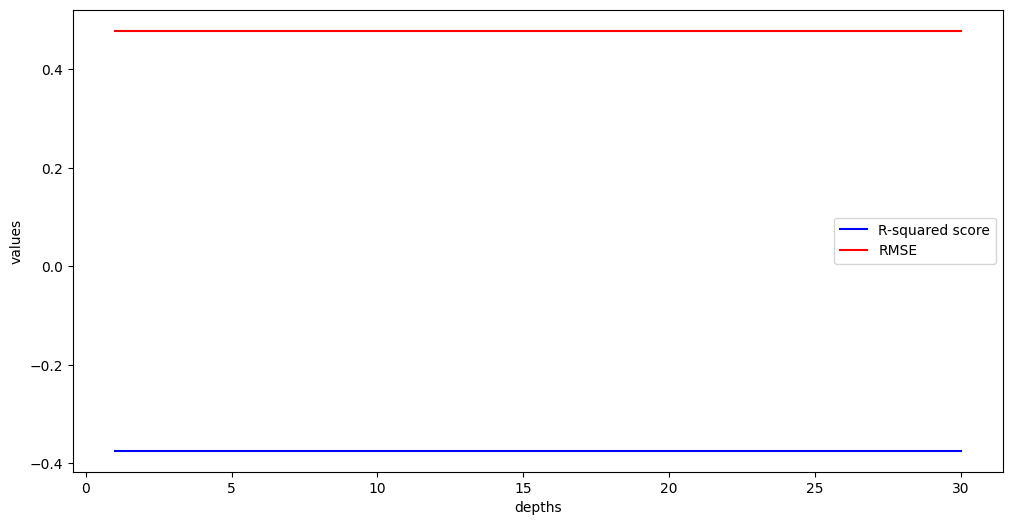

In [97]:
#Find the best tree depth

depths = np.linspace(1, 30, 30)
r2_ = []
mse = []

for depth in depths:
    clf = DecisionTreeClassifier(random_state=45, max_depth=int(depth))
    clf.fit(X_train, y_train_h1n1)
    y_pred = clf.predict(X_test)
    r_2 = r2_score(y_test_h1n1, y_pred_tree)
    mse_ = np.sqrt(mean_squared_error(y_test_h1n1, y_pred_tree))
    r2_.append(r_2)
    mse.append(mse_)
    
plt.figure(figsize=(12,6))
plt.plot(depths, r2_, 'b', label='R-squared score')
plt.plot(depths, mse, 'r', label='RMSE')
plt.ylabel('values')
plt.xlabel('depths')
plt.legend()
plt.show()   

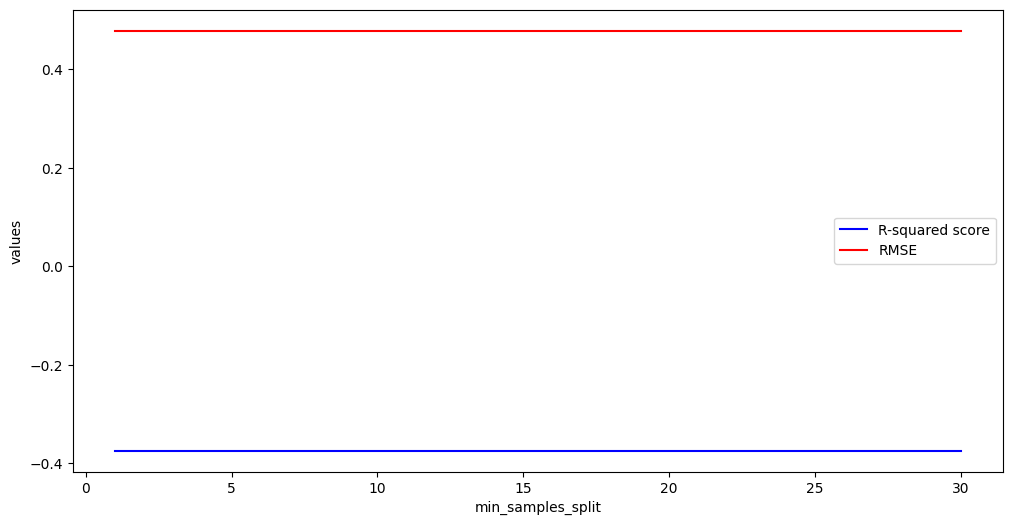

In [98]:
#minimum sample splits
min_samples_split = np.linspace(0.1, 1.0, 30, endpoint=True)
r2_ = []
mse = []

for min in min_samples_split:
    clf = DecisionTreeClassifier(random_state=45, min_samples_split=min)
    clf.fit(X_train, y_train_h1n1)
    y_pred = clf.predict(X_test)
    r_2 = r2_score(y_test_h1n1, y_pred_tree)
    mse_ = np.sqrt(mean_squared_error(y_test_h1n1, y_pred_tree))
    r2_.append(r_2)
    mse.append(mse_)
    
plt.figure(figsize=(12,6))
plt.plot(depths, r2_, 'b', label='R-squared score')
plt.plot(depths, mse, 'r', label='RMSE')
plt.ylabel('values')
plt.xlabel('min_samples_split')
plt.legend()
plt.show()   

In [99]:
y_pred_tree = clf.predict(X_test)

# Calculate the r2 score between 'y_true' and 'y_predict'
r2_ = r2_score(y_test_h1n1, y_pred_tree)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
mse = np.sqrt(mean_squared_error(y_test_h1n1, y_pred_tree))
# Return the score
print(r2_, mse)

-0.19022893980093758 0.4454520796031409


In [100]:
#print('Accuracy: ', accuracy_score(y_test_h1n1, y_pred_tree))
acc_tree1 = accuracy_score(y_test_h1n1, y_pred_tree)
print(acc_tree1)

0.801572444777237


In [101]:
# Calculate the r2 score between 'y_true' and 'y_predict'
r2_ = r2_score(y_test_seas, y_pred_tree)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
mse = np.sqrt(mean_squared_error(y_test_seas, y_pred_tree))
# Return the score
print(r2_, mse)

-0.5860625207268342 0.6274832111952962


In [102]:
#print('Accuracy: ', accuracy_score(y_test_seas, y_pred_tree))
acc_tree2 = accuracy_score(y_test_seas, y_pred_tree)
print(acc_tree2)

0.6062648196680395


In [103]:
tree_acc = (acc_tree1 + acc_tree2)/2
tree_acc

0.7039186322226383

### Using entropy

In [104]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) #or gini -> squared, entropy -> log

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train_h1n1)

#Predict the response for test dataset
y_pred_clf = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
entropy1 = accuracy_score(y_test_h1n1, y_pred_clf)
entropy1

0.8249095220267066

In [105]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train_seas)

#Predict the response for test dataset
y_pred_clf2 = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
entropy2 = accuracy_score(y_test_seas, y_pred_clf2)
entropy2

0.7330587794833395

In [106]:
tree_acc_final = (entropy1 + entropy2)/2
tree_acc_final

0.778984150755023

In [107]:
tree_r_2_ = r2_score(y_test_h1n1, y_pred_clf)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
tree_mse = np.sqrt(mean_squared_error(y_test_h1n1, y_pred_clf))
print(tree_r_2_, tree_mse)

-0.050246039333783354 0.4184381411550498


In [108]:
tree_r_2 = r2_score(y_test_seas, y_pred_clf2)
# Calculate the root mean squared error between 'y_true' and 'y_predict'
tree_mse_ = np.sqrt(mean_squared_error(y_test_seas, y_pred_clf2))
print(tree_r_2, tree_mse_)

-0.07530514479705164 0.5166635467271331


In [109]:
tree_pre = precision_score(y_pred_clf, y_test_h1n1)
tree_pre

0.32762691853600945

In [110]:
tree_rec = recall_score(y_pred_clf, y_test_h1n1)
tree_rec

0.6776556776556777

In [111]:
tree_pre2 = precision_score(y_pred_clf2, y_test_seas)
tree_pre2

0.6120947970580224

In [112]:
tree_rec2 = recall_score(y_pred_clf2, y_test_seas)
tree_rec2

0.7586090479405807

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

forest = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [114]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

forest= RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
forest_random = RandomizedSearchCV(estimator = forest , param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
forest_random.fit(X_train, y_train_h1n1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 14, 18, 23, 27, 32,
                                                         36, 41, 45, 50]},
                   random_state=42, verbose=2)

In [115]:
forest_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [116]:
# Instantiate and fit a RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators = 50, min_samples_split = 5, 
                                 min_samples_leaf = 4, max_features = 'sqrt', max_depth = None, bootstrap = False)
forest1.fit(X_train, y_train_h1n1)
ytrain_pred = forest1.predict(X_test)

# Training accuracy score
print('Train:', forest1.score(X_train, y_train_h1n1))
print()
print('test', forest1.score(X_test, y_test_h1n1))

forest_acc = forest1.score(X_test, y_test_h1n1)
forest_acc

Train: 0.9522841553439606

test 0.8497441657306877


0.8497441657306877

In [117]:
# Instantiate and fit a RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators = 50, min_samples_split = 5, 
                                 min_samples_leaf = 4, max_features = 'sqrt', max_depth = None, bootstrap = False)
forest1.fit(X_train, y_train_seas)

ytrain_pred2 = forest1.predict(X_test)

# Training accuracy score
print('Train:', forest1.score(X_train, y_train_seas))
print()
print('test', forest1.score(X_test, y_test_seas))

forest_acc2 = forest1.score(X_test, y_test_seas)
forest_acc2

Train: 0.9578474376805393

test 0.7844752277548983


0.7844752277548983

In [118]:
final_forest = (forest_acc + forest_acc2)/2
final_forest

0.817109696742793

In [119]:
forest_pre = precision_score(ytrain_pred, y_test_h1n1)
forest_pre

0.4445100354191263

In [120]:
forest_pre2 = precision_score(ytrain_pred2, y_test_h1n1)
forest_pre2

0.7095631641086186

In [121]:
forest_rec = recall_score(ytrain_pred, y_test_seas)
forest_rec

0.8356299212598425

In [122]:
forest_rec2 = recall_score(ytrain_pred2, y_test_seas)
forest_rec2

0.7707520891364903

## Models Output

In [123]:
data = {'Model':["Logistic Regression", "KNN", "Decision Tree", 'Random Forest'],
        'Accuracy H1N1': [log_acc, knn_acc, entropy1, forest_acc],
        'Accuracy Seasonal':[log_acc2, knn_acc2, entropy2, forest_acc2],
        'Final Accuracy':[log_acc_final, acc_knn, tree_acc_final, final_forest],
        'Precision H1N1':[log_pre, knn_pre, tree_pre, forest_pre],
        'precision Seasonal':[log_pre2, knn_pre2, tree_pre2, forest_pre2],
        'Recall H1N1':[log_rec, knn_rec, tree_rec, forest_rec],
        'Recall seasonal':[log_rec2, knn_rec2, tree_rec2, forest_rec2]
       }
output = pd.DataFrame(data)
 
output

Model  Accuracy H1N1  Accuracy Seasonal  Final Accuracy  \
0  Logistic Regression       0.847373           0.779109        0.813241   
1                  KNN       0.613253           0.723200        0.668227   
2        Decision Tree       0.824910           0.733059        0.778984   
3        Random Forest       0.849744           0.784475        0.817110   

   Precision H1N1  precision Seasonal  Recall H1N1  Recall seasonal  
0        0.709333            0.769952     0.471074         0.738491  
1        0.658333            0.707275     0.326446         0.675293  
2        0.327627            0.612095     0.677656         0.758609  
3        0.444510            0.709563     0.835630         0.770752

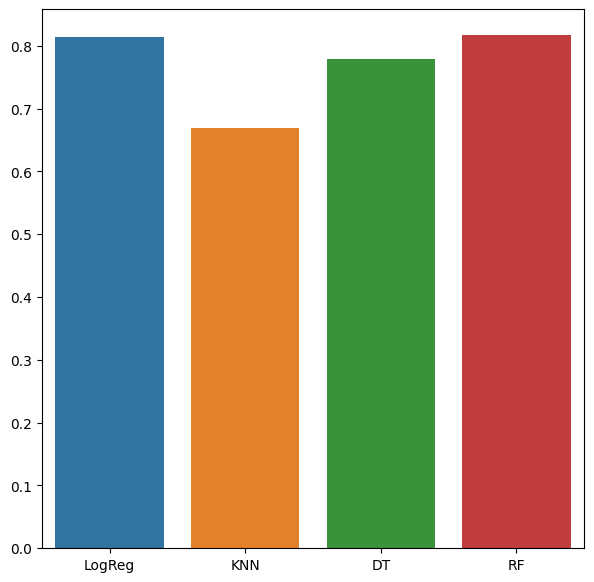

In [124]:
# visualizing the test accuracy results
model_names = ["LogReg","KNN","DT", 'RF']
plt.figure(figsize = (7, 7))
sns.barplot(x = model_names, y = data['Final Accuracy'])
plt.show()

# Evaluation

## Final model

In [198]:
training1 = pd.read_csv('training_set_features.csv')
training2 = pd.read_csv('training_set_labels.csv')
test1 = pd.read_csv('test_set_features.csv')

In [125]:
training_features.shape

(26707, 36)

In [126]:
test_features.shape

(26708, 36)

In [149]:
numeric_test = test_features.columns[training_features.dtypes != "object"].values
print(numeric_test)

['respondent_id' 'h1n1_concern' 'h1n1_knowledge'
 'behavioral_antiviral_meds' 'behavioral_avoidance' 'behavioral_face_mask'
 'behavioral_wash_hands' 'behavioral_large_gatherings'
 'behavioral_outside_home' 'behavioral_touch_face' 'doctor_recc_h1n1'
 'doctor_recc_seasonal' 'chronic_med_condition' 'child_under_6_months'
 'health_worker' 'health_insurance' 'opinion_h1n1_vacc_effective'
 'opinion_h1n1_risk' 'opinion_h1n1_sick_from_vacc'
 'opinion_seas_vacc_effective' 'opinion_seas_risk'
 'opinion_seas_sick_from_vacc' 'household_adults' 'household_children']


In [150]:
non_numeric_test = test_features.columns[training_features.dtypes == 'object'].values
print(non_numeric_test)

['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa'
 'employment_industry' 'employment_occupation']


In [151]:
test_features[numeric_test] = scaler.fit_transform(test_features[numeric_test])

In [152]:
test_features[non_numeric_test] = ordinal.fit_transform(test_features[non_numeric_test])
test_features

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0          -1.731986      0.421691        1.192934                  -0.228202   
1          -1.731856     -0.682153       -0.419704                  -0.228202   
2          -1.731727      0.421691        1.192934                  -0.228202   
3          -1.731597     -0.682153       -0.419704                  -0.228202   
4          -1.731467      1.525536       -0.419704                   4.382091   
...              ...           ...             ...                        ...   
26703       1.731467     -0.682153       -0.419704                  -0.228202   
26704       1.731597      1.525536       -0.419704                  -0.228202   
26705       1.731727     -1.785998       -0.419704                  -0.228202   
26706       1.731856      1.525536       -0.419704                  -0.228202   
26707       1.731986      0.421691       -0.419704                  -0.228202   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                  0.617461             -0.272726               0.460811   
1                 -1.619536             -0.272726              -2.170087   
2                 -1.619536              3.666683               0.460811   
3                 -1.619536             -0.272726              -2.170087   
4                  0.617461             -0.272726               0.460811   
...                     ...                   ...                    ...   
26703              0.617461             -0.272726               0.460811   
26704              0.617461             -0.272726               0.460811   
26705             -1.619536             -0.272726              -2.170087   
26706              0.617461             -0.272726               0.460811   
26707             -1.619536             -0.272726               0.460811   

       behavioral_large_gatherings  behavioral_outside_home  \
0                         1.361067                -0.711659   
1                        -0.734717                -0.711659   
2                         1.361067                 1.405168   
3                        -0.734717                -0.711659   
4                         1.361067                 1.405168   
...                            ...                      ...   
26703                    -0.734717                -0.711659   
26704                     1.361067                 1.405168   
26705                    -0.734717                -0.711659   
26706                    -0.734717                 1.405168   
26707                    -0.734717                -0.711659   

       behavioral_touch_face  ...  income_poverty  marital_status  \
0                   0.685253  ...             1.0             2.0   
1                  -1.459315  ...             2.0             2.0   
2                   0.685253  ...             1.0             0.0   
3                  -1.459315  ...             0.0             0.0   
4                   0.685253  ...             0.0             2.0   
...                      ...  ...             ...             ...   
26703               0.685253  ...             3.0             1.0   
26704               0.685253  ...             2.0             0.0   
26705              -1.459315  ...             2.0             2.0   
26706              -1.459315  ...             0.0             0.0   
26707               0.685253  ...             3.0             2.0   

       rent_or_own  employment_status  hhs_geo_region  census_msa  \
0              2.0                0.0             7.0         0.0   
1              2.0                0.0             1.0         2.0   
2              1.0                0.0             5.0         2.0   
3              1.0                2.0             5.0         0.0   
4              1.0                0.0             6.0         2.0   
...            ...                ...             ...         ...   
26703          0.0                1.0             2.

In [153]:
#Using Random Forest
final_rf = RandomForestClassifier(n_estimators = 50, min_samples_split = 5, 
                                 min_samples_leaf = 4, max_features = 'sqrt', max_depth = None, bootstrap = False)
final_rf.fit(X_train, y_train_h1n1)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

In [204]:
final_pred_h1n1 = final_rf.predict_proba(test_features)
final_pred_h1n1

array([[0.79211905, 0.20788095],
       [0.93961905, 0.06038095],
       [0.33291331, 0.66708669],
       ...,
       [0.68771429, 0.31228571],
       [0.54542641, 0.45457359],
       [0.38360317, 0.61639683]])

In [214]:
h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": final_pred_h1n1[:, 1],
        #"seasonal_vaccine": final_pred_seas[1][:, 1],
    },
    index = df2.respondent_id
)
print("h1n1.shape:", h1n1.shape)
h1n1.head()

h1n1.shape: (26708, 1)


h1n1_vaccine
respondent_id              
26707              0.207881
26708              0.060381
26709              0.667087
26710              0.939238
26711              0.619190

In [209]:
final_rf.fit(X_train, y_train_seas)
final_pred_seas = final_rf.predict_proba(test_features)

In [218]:
seas = pd.DataFrame(
    {
        #"seasonal_vaccine": final_pred_h1n1[:, 1],
        "seasonal_vaccine": final_pred_seas[:, 1],
    },
    index = df2.respondent_id
)
print("seas.shape:", seas.shape)
seas.head()

seas.shape: (26708, 1)


seasonal_vaccine
respondent_id                  
26707                  0.248786
26708                  0.044714
26709                  0.765643
26710                  0.883238
26711                  0.501000

In [219]:
sub = h1n1.join(seas, on='respondent_id')
sub['h1n1_vaccine'] = sub['h1n1_vaccine']
sub['seasonal_vaccine'] = sub['seasonal_vaccine']

In [220]:
sub.to_csv('submission_format.csv')